# 2028607 Machine Learning Foundation

Course Project

Written by Pakorn Sagulkoo 6581030520

17 April 2024

---

* This project performed the glioma dataset from [Kaggle](https://www.kaggle.com/datasets/vinayjose/glioma-grading-clinical-and-mutation-features)

## 1. Backgorund

Glioma is one of the most common brain tumors found in both adults and children around the world. Because there are several subtypes of glioma, grading the tumor is essential for disease prediction and medical management. In traditional approach, histopathological examination plays an important role in glioblastoma classification. This approach needs anatomical pathologists who are medical specialists in tissue diagnosis. In Thailand, however, there is a few of pathologists handle with tumor diagnosis. Hence, machine learning model development could be a part in glioblastoma classification. Moreover, genomics technologies provide the significant information in molecular details. Combining genetic mutations and machine learning algorithms could be one of the powerful tools used for grading this brain tumor.

<center><img src="https://www.mayoclinic.org/-/media/kcms/gbs/patient-consumer/images/2015/03/02/10/52/mcdc7_glioma-8col.jpg" width="300"/> <img src="https://www.mayoclinic.org/-/media/kcms/gbs/patient-consumer/images/2019/01/11/10/47/glioblastoma-8col-3802786-002-0.jpg"width="500"/><center>



## 2. Objectives

This project aims to predict the glioma grading based on patient and genetic mutation information by using machine learning algorithms. Machine learning models which provide high performance will be selected as the suggested model.

## 3. Data Pre-processing

The dataset is on Kaggle and it is also collected in UCI Machine Learning Repository. Then I downloaded it directly from the database with the compressed file and extract it on the colab


### 3.1 Data Collection

In [ ]:
# import neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Download the unzip dataset from
!wget https://archive.ics.uci.edu/static/public/759/glioma+grading+clinical+and+mutation+features+dataset.zip

--2024-04-24 06:29:51--  https://archive.ics.uci.edu/static/public/759/glioma+grading+clinical+and+mutation+features+dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘glioma+grading+clinical+and+mutation+features+dataset.zip’

glioma+grading+clin     [  <=>               ] 301.79K  1.20MB/s    in 0.2s    

2024-04-24 06:29:52 (1.20 MB/s) - ‘glioma+grading+clinical+and+mutation+features+dataset.zip’ saved [309032]



In [ ]:
# Extract the file
!unzip /content/glioma+grading+clinical+and+mutation+features+dataset.zip

Archive:  /content/glioma+grading+clinical+and+mutation+features+dataset.zip
 extracting: TCGA_GBM_LGG_Mutations_all.csv  
 extracting: TCGA_InfoWithGrade.csv  


### 3.2 Data Exploring

In [ ]:
# Import the extract file as a data frame
glioma_df = pd.read_csv('/content/TCGA_GBM_LGG_Mutations_all.csv')
glioma_df

,Grade,Project,Case_ID,Gender,Age_at_diagnosis,Primary_Diagnosis,Race,IDH1,TP53,ATRX,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,LGG,TCGA-LGG,TCGA-DU-8164,Male,51 years 108 days,"Oligodendroglioma, NOS",white,MUTATED,NOT_MUTATED,NOT_MUTATED,...,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
1,LGG,TCGA-LGG,TCGA-QH-A6CY,Male,38 years 261 days,Mixed glioma,white,MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
2,LGG,TCGA-LGG,TCGA-HW-A5KM,Male,35 years 62 days,"Astrocytoma, NOS",white,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
3,LGG,TCGA-LGG,TCGA-E1-A7YE,Female,32 years 283 days,"Astrocytoma, anaplastic",white,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED
4,LGG,TCGA-LGG,TCGA-S9-A6WG,Male,31 years 187 days,"Astrocytoma, anaplastic",white,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,GBM,TCGA-GBM,TCGA-19-5959,Female,77 years 325 days,Glioblastoma,white,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
858,GBM,TCGA-GBM,TCGA-16-0846,Male,85 years 65 days,Glioblastoma,white,NOT_MUTATED,MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
859,GBM,TCGA-GBM,TCGA-28-1746,Female,77 years 178 days,Glioblastoma,white,NOT_MUTATED,MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
860,GBM,TCGA-GBM,TCGA-32-2491,Male,63 years 121 days,Glioblastoma,white,NOT_MUTATED,MUTATED,NOT_MUTATED,...,NOT_MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED


In [ ]:
# Explore all features + label in the dataset
glioma_df.columns

Index(['Grade', 'Project', 'Case_ID', 'Gender', 'Age_at_diagnosis',
       'Primary_Diagnosis', 'Race', 'IDH1', 'TP53', 'ATRX', 'PTEN', 'EGFR',
       'CIC', 'MUC16', 'PIK3CA', 'NF1', 'PIK3R1', 'FUBP1', 'RB1', 'NOTCH1',
       'BCOR', 'CSMD3', 'SMARCA4', 'GRIN2A', 'IDH2', 'FAT4', 'PDGFRA'],
      dtype='object')

In [ ]:
# Explore the data size
glioma_df.shape

(862, 27)

The data is a tabular form with the number of instances is 862, consisting of 20 mutated genes and 3 clinical features.

* Gene features: IDH1, TP53, ATRX, PTEN, EGFR, CIC, MUC16, PIK3CA, NF1, PIK3R1, FUBP1, RB1, NOTCH1, BCOR, CSMD3, SMARCA4, GRIN2A, IDH2, FAT4, and PDGFRA

* Clinical features: Gender, Age of diagnosis, and race


In [ ]:
# Explore the number of label classes
glioma_df.Grade.unique()

array(['LGG', 'GBM'], dtype=object)

In [ ]:
# Explore the number of instances in each class
print(sum(glioma_df.Grade == 'LGG'))
print(sum(glioma_df.Grade == 'GBM'))

499
363


In [ ]:
# check NA value in the entire dataframe
missing_values_count = glioma_df.isnull().sum() #glioma_df.isnull().values.any()
missing_values_count

Grade                0
Project              0
Case_ID              0
Gender               0
Age_at_diagnosis     0
Primary_Diagnosis    0
Race                 0
IDH1                 0
TP53                 0
ATRX                 0
PTEN                 0
EGFR                 0
CIC                  0
MUC16                0
PIK3CA               0
NF1                  0
PIK3R1               0
FUBP1                0
RB1                  0
NOTCH1               0
BCOR                 0
CSMD3                0
SMARCA4              0
GRIN2A               0
IDH2                 0
FAT4                 0
PDGFRA               0
dtype: int64

To consider data labels, glioma is graded into two main subtypes such as LGG (Lower-Grade glioma) and GBM (Glioblastoma Multiforme) based on histological and imaging findings. The number of LGG and GBM labels are 499 and 363, respectively. Additionally, this data frame has no NA value.

In [ ]:
# Identify the data type in each features
glioma_df.dtypes

Grade                object
Project              object
Case_ID              object
Gender               object
Age_at_diagnosis     object
Primary_Diagnosis    object
Race                 object
IDH1                 object
TP53                 object
ATRX                 object
PTEN                 object
EGFR                 object
CIC                  object
MUC16                object
PIK3CA               object
NF1                  object
PIK3R1               object
FUBP1                object
RB1                  object
NOTCH1               object
BCOR                 object
CSMD3                object
SMARCA4              object
GRIN2A               object
IDH2                 object
FAT4                 object
PDGFRA               object
dtype: object

In [ ]:
# Explore the number of categories in each feature
glioma_df.select_dtypes(["object"]).nunique()

Grade                  2
Project                2
Case_ID              862
Gender                 3
Age_at_diagnosis     838
Primary_Diagnosis      7
Race                   6
IDH1                   2
TP53                   2
ATRX                   2
PTEN                   2
EGFR                   2
CIC                    2
MUC16                  2
PIK3CA                 2
NF1                    2
PIK3R1                 2
FUBP1                  2
RB1                    2
NOTCH1                 2
BCOR                   2
CSMD3                  2
SMARCA4                2
GRIN2A                 2
IDH2                   2
FAT4                   2
PDGFRA                 2
dtype: int64

In [ ]:
# Explore Gender feature
glioma_df.Gender.unique()

array(['Male', 'Female', '--'], dtype=object)

In [ ]:
# Count instances with unclassified gender
sum(glioma_df.Gender == '--')

4

In [ ]:
# Explore Race feature
glioma_df.Race.unique()

array(['white', 'asian', 'black or african american', '--',
       'not reported', 'american indian or alaska native'], dtype=object)

In [ ]:
# Count instances with unclassified race
sum(glioma_df.Race == '--')

4

In [ ]:
# Count instances with not reported race
sum(glioma_df.Race == 'not reported')

18

First, we explored that there was no NA from isnull() but when we identify more detail in Gender and Race feature, there are three and six categories in there. Furthermore, the unclassified category appeared in the gender and Race ('--' and 'not reported'). That means it is the NA needed to be cleaned. In this cases, I decided to drop instances with NA values.

In [ ]:
# Convert null value in Gender and Race to NaN
glioma_df.replace(['--', 'not reported'], np.nan, inplace=True)

In [ ]:
# check NaN again in the dataframe
missing_values_count = glioma_df.isnull().sum()
missing_values_count

Grade                 0
Project               0
Case_ID               0
Gender                4
Age_at_diagnosis      5
Primary_Diagnosis     4
Race                 22
IDH1                  0
TP53                  0
ATRX                  0
PTEN                  0
EGFR                  0
CIC                   0
MUC16                 0
PIK3CA                0
NF1                   0
PIK3R1                0
FUBP1                 0
RB1                   0
NOTCH1                0
BCOR                  0
CSMD3                 0
SMARCA4               0
GRIN2A                0
IDH2                  0
FAT4                  0
PDGFRA                0
dtype: int64

### 3.3 Data Cleaning

In [ ]:
# Drop unwanted columns
unwanted_columns = ['Project', 'Case_ID', 'Primary_Diagnosis']
glioma_df_dropped = glioma_df.drop(unwanted_columns, axis=1)
glioma_df_dropped.head()

,Grade,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,LGG,Male,51 years 108 days,white,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
1,LGG,Male,38 years 261 days,white,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
2,LGG,Male,35 years 62 days,white,MUTATED,MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
3,LGG,Female,32 years 283 days,white,MUTATED,MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED
4,LGG,Male,31 years 187 days,white,MUTATED,MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED


#### Drop instances with missing values

In [ ]:
# Drop instances with NA values
glioma_df_dropped = glioma_df_dropped.dropna()
glioma_df_dropped.shape

(839, 24)

#### Handling with the imbalanced data problem


In [ ]:
# Explore the number of instances in each class after drop rows with NA values
print(sum(glioma_df_dropped.Grade == 'LGG'))
print(sum(glioma_df_dropped.Grade == 'GBM'))

487
352


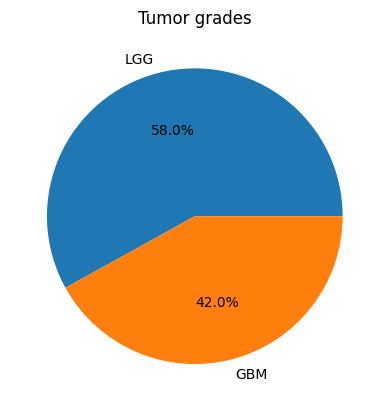

In [ ]:
# Plot a pie chart
counts = [487, 352]
labels = ['LGG', 'GBM']
plt.pie(counts, labels=labels, autopct="%1.1f%%")
plt.title("Tumor grades")
#plt.axis("equal")
plt.show()

From the number of LGG and GBM class, there may be the imbalanced data problem. However, when the minority proportion was calculted according to the code below, it has mild imbalance data (the proportion is greater than 40 percent). Therefore, there is no further methods for imbalanced data correction.

In [ ]:
# Calculate the proportion of minority class
LGG_counts = sum(glioma_df_dropped.Grade == 'LGG')
GBM_counts = sum(glioma_df_dropped.Grade == 'GBM')
minority_proportion = GBM_counts/(LGG_counts+GBM_counts)
print(minority_proportion)

0.4195470798569726


#### Data encoding
We can see that all features (including the label) are object types. Therefore, we have to encode them to numerical data before running the model. Because there are several categories in Race, one-hot encoding is performed. However, most features and label have binary categories, converting to 0 and 1 is performed. Age of diagnosis is also converted to year with float number.

In [ ]:
# One-hot encoding in the race feature
glioma_df_encoded = pd.get_dummies(glioma_df_dropped, columns=['Race', ])
glioma_df_encoded

,Grade,Gender,Age_at_diagnosis,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,...,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA,Race_american indian or alaska native,Race_asian,Race_black or african american,Race_white
0,LGG,Male,51 years 108 days,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,False,False,False,True
1,LGG,Male,38 years 261 days,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,False,False,False,True
2,LGG,Male,35 years 62 days,MUTATED,MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,False,False,False,True
3,LGG,Female,32 years 283 days,MUTATED,MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED,False,False,False,True
4,LGG,Male,31 years 187 days,MUTATED,MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,GBM,Female,77 years 325 days,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,False,False,False,True
858,GBM,Male,85 years 65 days,NOT_MUTATED,MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,False,False,False,True
859,GBM,Female,77 years 178 days,NOT_MUTATED,MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,False,False,False,True
860,GBM,Male,63 years 121 days,NOT_MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,False,False,False,True


In [ ]:
# Convert data type with string to numerical value
glioma_df_encoded = glioma_df_encoded.replace(to_replace=['LGG', 'Male', 'NOT_MUTATED', False], value=0)
glioma_df_encoded = glioma_df_encoded.replace(to_replace=['GBM', 'Female', 'MUTATED', True], value=1)
glioma_df_encoded

,Grade,Gender,Age_at_diagnosis,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,...,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA,Race_american indian or alaska native,Race_asian,Race_black or african american,Race_white
0,0,0,51 years 108 days,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,38 years 261 days,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,35 years 62 days,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,32 years 283 days,1,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
4,0,0,31 years 187 days,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,1,1,77 years 325 days,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
858,1,0,85 years 65 days,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
859,1,1,77 years 178 days,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
860,1,0,63 years 121 days,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
# Convert Age_at_diagnosis feature into float in year
glioma_df_encoded[['years', 'days']] = glioma_df_encoded['Age_at_diagnosis'].str.split(expand=True).loc[:,[0,2]]
glioma_df_encoded[['years', 'days']] = glioma_df_encoded[['years', 'days']].astype(float)
glioma_df_encoded['Age_at_diagnosis'] = glioma_df_encoded.years + (glioma_df_encoded.years/365)
glioma_df_encoded = glioma_df_encoded.drop(['years', 'days'], axis=1)
glioma_df_encoded

,Grade,Gender,Age_at_diagnosis,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,...,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA,Race_american indian or alaska native,Race_asian,Race_black or african american,Race_white
0,0,0,51.139726,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,38.104110,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,35.095890,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,32.087671,1,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
4,0,0,31.084932,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,1,1,77.210959,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
858,1,0,85.232877,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
859,1,1,77.210959,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
860,1,0,63.172603,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


### 3.4 Exploring Statistics
It is interesting to analyse distribution plots of the age at diagnosis in both gender feature and grade classes. From the plots below, we can see that the distribution of the gender feature is the same while the distribution of the grade is quite different.

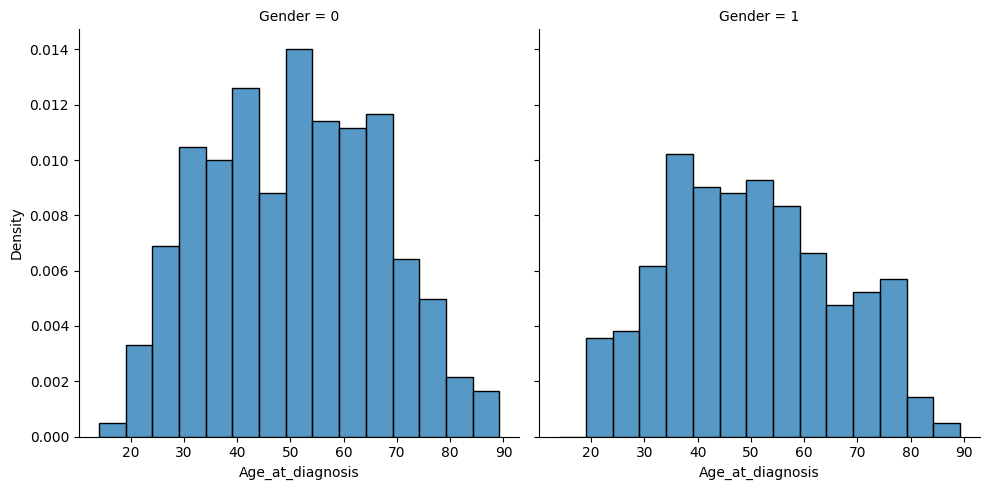

In [ ]:
# The distribution of the age at diagnosis in both genders
sns.displot(glioma_df_encoded, x='Age_at_diagnosis', col='Gender', stat='density')

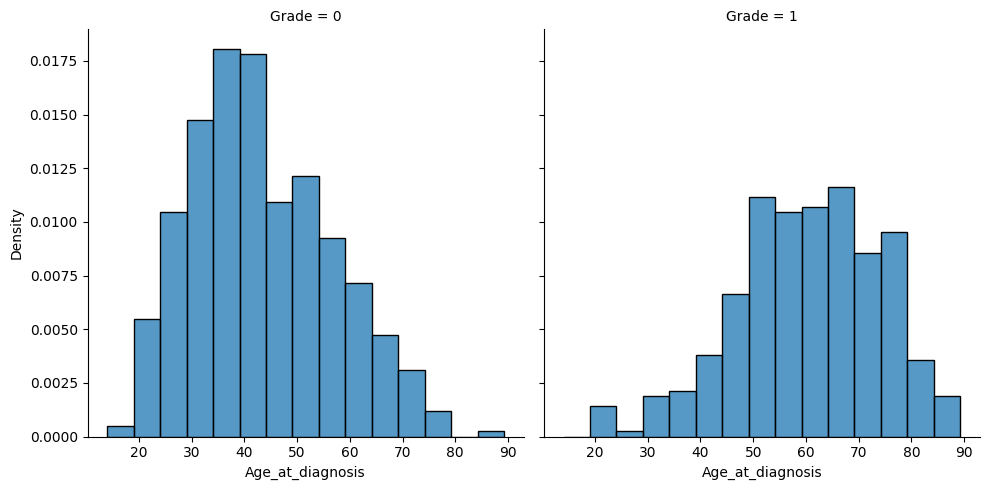

In [ ]:
# The distribution of the age at diagnosis in both grades
sns.displot(glioma_df_encoded, x='Age_at_diagnosis', col='Grade', stat='density')

### 3.5 Data Spliting
We will split the data into train and test dataset. The percentage of train and test dataset are 80 and 20, respectively.

In [ ]:
# Split the data using scikit-learn package
from sklearn.model_selection import train_test_split

# Select target
y = glioma_df_encoded.Grade
X = glioma_df_encoded.drop(['Grade'], axis=1)

# Divide data into training and validation subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

### 3.6 Data Normalization and Scaling

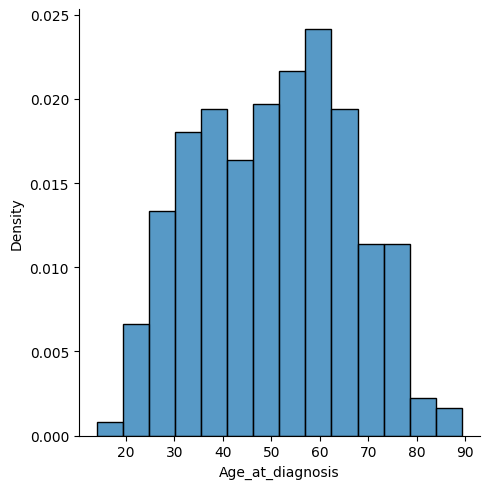

In [ ]:
# The distribution of the age at diagnosis
sns.displot(X_train, x='Age_at_diagnosis', stat="density")

From the distribution plot, we can see that the plot is quite normally distributed. Hence, I decided to only rescale the age at dianosis feature by standardization as the code below.

In [ ]:
# Standardize the age at diagnosis feature
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Age_train_std = sc.fit_transform(np.array(X_train.Age_at_diagnosis).reshape(-1, 1))
Age_test_std = sc.transform(np.array(X_test.Age_at_diagnosis).reshape(-1, 1))

In [ ]:
# Convert the feature with the standardized form
X_train_std, X_test_std = X_train.copy(), X_test.copy()
X_train_std.Age_at_diagnosis = Age_train_std
X_test_std.Age_at_diagnosis = Age_test_std

### 3.7 Dimensionality Reduction
In this section, we will visualize the overall data points by reducing the data dimension to identify the data pattern between two groups of the brain tumor. There are three methods used to decrease the dimension such as PCA, tSNE, and UMAP. From the plots below we can see that all plots can separate the data points between the two brain tumor groups.

#### Principal Component Analysis (PCA)

In [ ]:
# Standardize all features
X_train_all_std = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns)
X_test_all_std = pd.DataFrame(sc.transform(X_test), columns=X_train.columns)

In [ ]:
from sklearn.decomposition import PCA
# Set the n_components=20
pca = PCA(n_components=20)
train_pca = pca.fit_transform(X_train_all_std)
test_pca = pca.transform(X_test_all_std)

# Check the dimensions of data after PCA
print(train_pca.shape)

(671, 20)


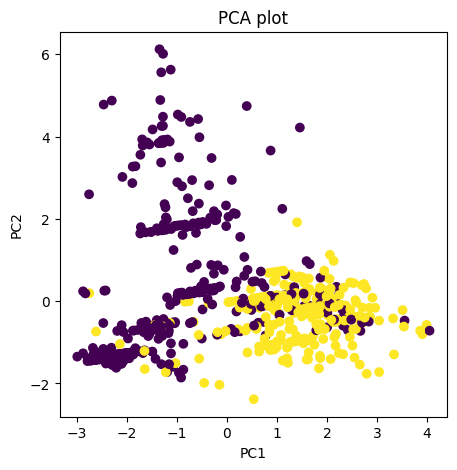

In [ ]:
# Plot the PCA (first two PC) of the train dataset
plt.figure(figsize=(5,5))
plt.scatter(train_pca[:,0], train_pca[:,1], c=y_train)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("PCA plot")
plt.show()

In [ ]:
# Convert the pca result to a dataframe
columns = ['pca_comp_%i' % i for i in range(1,21)]
X_train_pca = pd.DataFrame(train_pca, columns=columns, index=X_train.index)
X_test_pca = pd.DataFrame(test_pca, columns=columns, index=X_test.index)

#### t-distributed Stochastic Neighbor Embedding (t-SNE)

In [ ]:
from sklearn.manifold import TSNE
# Set the n_components=2
tsne = TSNE(n_components=2, perplexity=600)
train_tsne = tsne.fit_transform(X_train_all_std)

# Check the dimensions of data after tSNE
print(train_tsne.shape)

(671, 2)


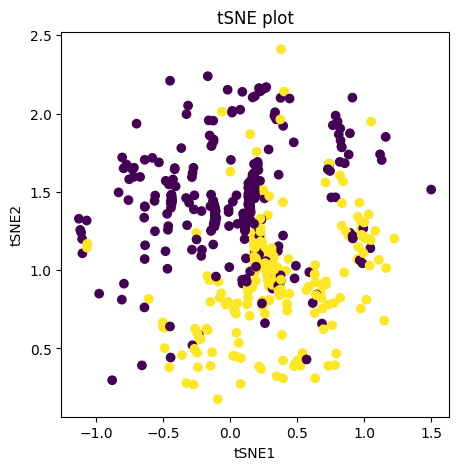

In [ ]:
# Plot the tSNE (first two tSNE) of the train dataset
plt.figure(figsize=(5,5))
plt.scatter(train_tsne[:,0], train_tsne[:,1], c=y_train)
plt.xlabel('tSNE1')
plt.ylabel('tSNE2')
plt.title("tSNE plot")
plt.show()

#### Uniform Manifold Approximation and Projection (UMAP)

In [ ]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 5.0 MB/s eta 0:00:00


In [ ]:
# Run UMAP code
import umap.umap_ as umap
umap = umap.UMAP(n_neighbors=200, min_dist=1)
train_umap = umap.fit_transform(X_train_all_std)
print(train_umap.shape)

(671, 2)


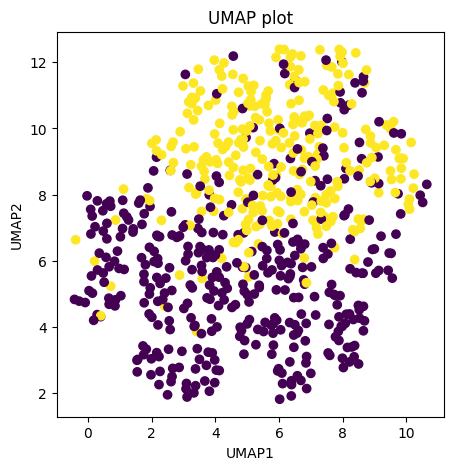

In [ ]:
# Plot the UMAP (first two tSNE) of the train dataset
plt.figure(figsize=(5,5))
plt.scatter(train_umap[:,0], train_umap[:,1], c=y_train)
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.title("UMAP plot")
plt.show()

### 3.8 Feature Engineering
In this project, we will add the 20 PCs from the PCA to the original split datasets

In [ ]:
# Concatenate the pca result to the standardized datasets
X_train_eng = pd.concat([X_train_std, X_train_pca], axis=1)
X_test_eng = pd.concat([X_test_std, X_test_pca], axis=1)

## 4. Model Building and Evaluation
Since the label is a binary class, classical machine classifiers such as decision tree, random forests, naïve Bayes, support vector machine (SVM), k-nearest neighbor, and logistic regression will be performed to evaluate predictive model performance. Moreover, some architectures of neural networks, for example, multilayer perceptron will be carried out to compare with the traditional models.

In [ ]:
# Import the neccessary package
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn import metrics
from scipy.stats import randint, uniform

### 4.1 K-Nearest Neighbors (KNN)

#### General model learning and evaluation

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Hyperparameter tuning using GridSearch
hyperparams = {'n_neighbors': range(1,100),
               'p': [1,2,3]
               }

# Create a knn classifier
knn = KNeighborsClassifier()

# Use grid search to find the best hyperparameters
grid_search = GridSearchCV(knn,
                           param_grid = hyperparams,
                           refit=True,
                           scoring = 'accuracy',
                           cv=5)

# Fit the grid search object to the data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 100), 'p': [1, 2, 3]},
             scoring='accuracy')

In [ ]:
# The average score of the 5-fold cross validation from the best result
print('Average accuracy score (across experiments):')
print(grid_search.best_score_)

Average accuracy score (across experiments):
0.8166832504145937


In [ ]:
# Create a variable for the best model
best_knn = grid_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  grid_search.best_params_)

Best hyperparameters: {'n_neighbors': 14, 'p': 1}


In [ ]:
# Accuracy score from the validation dataset
y_pred = best_knn.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8392857142857143


In [ ]:
# Print classfication evaluation scores
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.869     0.860     0.864       100
           1      0.797     0.809     0.803        68

    accuracy                          0.839       168
   macro avg      0.833     0.834     0.834       168
weighted avg      0.840     0.839     0.839       168



In [ ]:
# ROC Curve and AUC
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print("ROC AUC:", roc_auc)

ROC AUC: 0.8344117647058824


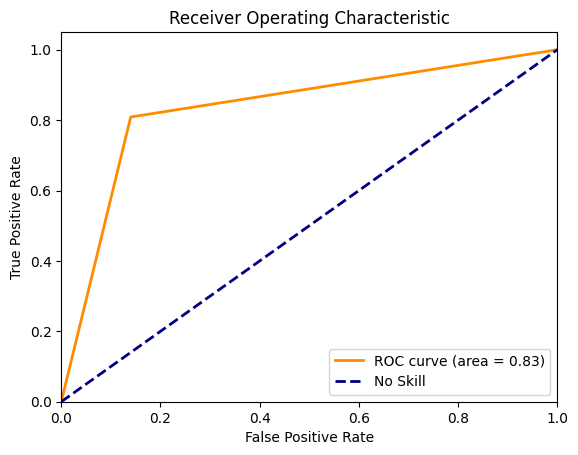

In [ ]:
# Plot ROC curve
plt.figure()

# Plot the ROC curve with a label displaying the ROC AUC score
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label='ROC curve (area = %0.2f)' % roc_auc)

# Plot a dashed diagonal line for reference
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='No Skill')

# Set the x and y-axis limits
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Label the x and y-axes
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Set the title of the plot
plt.title('Receiver Operating Characteristic')

# Add a legend to the plot
plt.legend(loc='lower right')

# Display the ROC curve plot
plt.show()

In [ ]:
# PRC Curve and AUC
from sklearn.metrics import precision_recall_curve, average_precision_score
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
prc_auc = average_precision_score(y_test, y_pred)
print("PRC AUC:", prc_auc)

PRC AUC: 0.7220953598830837


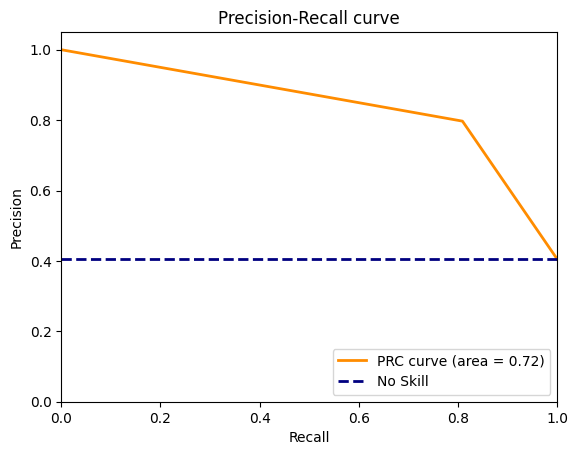

In [ ]:
# Plot PRC curve
plt.figure()

# Plot the PRC curve with a label displaying the PRC AUC score
plt.plot(recall, precision, color='darkorange', lw=2,
         label='PRC curve (area = %0.2f)' % prc_auc)

# Plot a dashed no-skill line for reference
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], color='navy', lw=2, linestyle='--', label='No Skill')

# Set the x and y-axis limits
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Label the x and y-axes
plt.xlabel('Recall')
plt.ylabel('Precision')

# Set the title of the plot
plt.title('Precision-Recall curve')

# Add a legend to the plot
plt.legend(loc='lower right')

# Display the ROC curve plot
plt.show()

#### Nested cross-validation

In [ ]:
# Evaluation from the nested cross validation (No data scaling)
from sklearn.model_selection import cross_val_score, KFold

# Declare the inner and outer cross-validation strategies
inner_cv = KFold(n_splits=5, shuffle=True, random_state=0)
outer_cv = KFold(n_splits=3, shuffle=True, random_state=0)

# Nested cross-validation
outer_acc, outer_params = [], []
round = 0

for train_index, test_index in outer_cv.split(X,y):
    round += 1

    # Split train and test datasets according to the outer_cv
    Xn_train = X.iloc[train_index,:]
    Xn_test = X.iloc[test_index,:]
    yn_train = y.iloc[train_index]
    yn_test = y.iloc[test_index]

    # Create a knn classifier
    knn = KNeighborsClassifier()

    # Hyperparameter tuning
    hyperparams = {'n_neighbors': range(1,100),
                   'p': [1,2,3]
                  }

    # Use grid search to find the best hyperparameters
    grid_search = GridSearchCV(knn,
                               param_grid = hyperparams,
                               refit=True,
                               scoring = 'accuracy',
                               cv=inner_cv,
                               n_jobs=2
                              )

    # Fit the grid search object to the data
    grid_search.fit(Xn_train, yn_train)

    # Model prediction based on the best hyperparams
    best_knn = grid_search.best_estimator_
    yn_pred = best_knn.predict(Xn_test)

    # Accuracy score from the validation dataset
    acc = metrics.accuracy_score(yn_test, yn_pred)

    # Store the result
    outer_acc.append(acc)
    outer_params.append(grid_search.best_params_)

    # Report progress
    print(f'Round {round}: test_score= {acc:.3f}, validation_score= {grid_search.best_score_:.3f}')

# Summarize the estimated performance of the model
print(
    '\nThe mean score using nested cross-validation is: '
    f'{np.mean(outer_acc):.3f} ± {np.std(outer_acc):.3f}'
)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Round 1: test_score= 0.832, validation_score= 0.821
Round 2: test_score= 0.775, validation_score= 0.807
Round 3: test_score= 0.806, validation_score= 0.805

The mean score using nested cross-validation is: 0.805 ± 0.023


#### Effect of data standardization on the model performance

In [ ]:
# Hyperparameter tuning using GridSearch
hyperparams = {'n_neighbors': range(1,100),
               'p': [1,2,3]
               }

# Create a knn classifier
knn = KNeighborsClassifier()

# Use grid search to find the best hyperparameters
grid_search = GridSearchCV(knn,
                           param_grid = hyperparams,
                           refit=True,
                           scoring = 'accuracy',
                           cv=5)

# Fit the grid search object to the data
grid_search.fit(X_train_std, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 100), 'p': [1, 2, 3]},
             scoring='accuracy')

In [ ]:
# The average score of the 5-fold cross validation from the best result
print('Average accuracy score (across experiments):')
print(grid_search.best_score_)

Average accuracy score (across experiments):
0.8644223327805417


In [ ]:
# Create a variable for the best model
best_knn = grid_search.best_estimator_
# Accuracy score from the validation dataset
y_pred = best_knn.predict(X_test_std)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8869047619047619


In [ ]:
# Evaluation from the nested cross validation (standardize only Age_at_diagnosis feature)

# Declare the inner and outer cross-validation strategies
inner_cv = KFold(n_splits=5, shuffle=True, random_state=0)
outer_cv = KFold(n_splits=3, shuffle=True, random_state=0)

# Nested cross-validation
outer_acc, outer_params = [], []
round = 0

for train_index, test_index in outer_cv.split(X,y):
    round += 1

    # Split train and test datasets according to the outer_cv
    Xn_train = X.iloc[train_index,:]
    Xn_test = X.iloc[test_index,:]
    yn_train = y.iloc[train_index]
    yn_test = y.iloc[test_index]

    # Data standardization (Age_at_diagnosis feature)
    sc = StandardScaler()
    Age_train_stdn = sc.fit_transform(np.array(Xn_train.Age_at_diagnosis).reshape(-1, 1))
    Age_test_stdn = sc.transform(np.array(Xn_test.Age_at_diagnosis).reshape(-1, 1))
    Xn_train_std, Xn_test_std = Xn_train.copy(), Xn_test.copy()
    Xn_train_std.Age_at_diagnosis = Age_train_stdn
    Xn_test_std.Age_at_diagnosis = Age_test_stdn

    # Create a knn classifier
    knn = KNeighborsClassifier()

    # Hyperparameter tuning
    hyperparams = {'n_neighbors': range(1,100),
                   'p': [1,2,3]
                  }

    # Use grid search to find the best hyperparameters
    grid_search = GridSearchCV(knn,
                               param_grid = hyperparams,
                               refit=True,
                               scoring = 'accuracy',
                               cv=inner_cv,
                               n_jobs=2
                              )

    # Fit the grid search object to the data
    grid_search.fit(Xn_train_std, yn_train)

    # Model prediction based on the best hyperparams
    best_knn = grid_search.best_estimator_
    yn_pred = best_knn.predict(Xn_test_std)

    # Accuracy score from the validation dataset
    acc = metrics.accuracy_score(yn_test, yn_pred)

    # Store the result
    outer_acc.append(acc)
    outer_params.append(grid_search.best_params_)

    # Report progress
    print(f'Round {round}: test_score= {acc:.3f}, validation_score= {grid_search.best_score_:.3f}')

# Summarize the estimated performance of the model
print(
    '\nThe mean score using nested cross-validation is: '
    f'{np.mean(outer_acc):.3f} ± {np.std(outer_acc):.3f}'
)

Round 1: test_score= 0.857, validation_score= 0.868
Round 2: test_score= 0.832, validation_score= 0.861
Round 3: test_score= 0.867, validation_score= 0.868

The mean score using nested cross-validation is: 0.852 ± 0.015


In [ ]:
# Evaluation from the nested cross validation (standardize all features)

# Declare the inner and outer cross-validation strategies
inner_cv = KFold(n_splits=5, shuffle=True, random_state=0)
outer_cv = KFold(n_splits=3, shuffle=True, random_state=0)

# Nested cross-validation
outer_acc, outer_params = [], []
round = 0

for train_index, test_index in outer_cv.split(X,y):
    round += 1

    # Split train and test datasets according to the outer_cv
    Xn_train = X.iloc[train_index,:]
    Xn_test = X.iloc[test_index,:]
    yn_train = y.iloc[train_index]
    yn_test = y.iloc[test_index]

    # Data standardization (all features)
    Xn_train = pd.DataFrame(sc.fit_transform(Xn_train), columns=Xn_train.columns)
    Xn_test = pd.DataFrame(sc.transform(Xn_test), columns=Xn_train.columns)

    # Create a knn classifier
    knn = KNeighborsClassifier()

    # Hyperparameter tuning
    hyperparams = {'n_neighbors': range(1,100),
                   'p': [1,2,3]
                  }

    # Use grid search to find the best hyperparameters
    grid_search = GridSearchCV(knn,
                               param_grid = hyperparams,
                               refit=True,
                               scoring = 'accuracy',
                               cv=inner_cv,
                               n_jobs=2
                              )

    # Fit the grid search object to the data
    grid_search.fit(Xn_train, yn_train)

    # Model prediction based on the best hyperparams
    best_knn = grid_search.best_estimator_
    yn_pred = best_knn.predict(Xn_test)

    # Accuracy score from the validation dataset
    acc = metrics.accuracy_score(yn_test, yn_pred)

    # Store the result
    outer_acc.append(acc)
    outer_params.append(grid_search.best_params_)

    # Report progress
    print(f'Round {round}: test_score= {acc:.3f}, validation_score= {grid_search.best_score_:.3f}')

# Summarize the estimated performance of the model
print(
    '\nThe mean score using nested cross-validation is: '
    f'{np.mean(outer_acc):.3f} ± {np.std(outer_acc):.3f}'
)

Round 1: test_score= 0.854, validation_score= 0.871
Round 2: test_score= 0.875, validation_score= 0.868
Round 3: test_score= 0.871, validation_score= 0.864

The mean score using nested cross-validation is: 0.867 ± 0.009


#### Effect of PCA on the performance

In [ ]:
# Evaluation from the nested cross validation (PCA)

# Declare the inner and outer cross-validation strategies
inner_cv = KFold(n_splits=5, shuffle=True, random_state=0)
outer_cv = KFold(n_splits=3, shuffle=True, random_state=0)

# Nested cross-validation
outer_acc, outer_params = [], []
round = 0

for train_index, test_index in outer_cv.split(X,y):
    round += 1

    # Split train and test datasets according to the outer_cv
    Xn_train = X.iloc[train_index,:]
    Xn_test = X.iloc[test_index,:]
    yn_train = y.iloc[train_index]
    yn_test = y.iloc[test_index]

    # Data standardization (all features)
    Xn_train = pd.DataFrame(sc.fit_transform(Xn_train), columns=Xn_train.columns)
    Xn_test = pd.DataFrame(sc.transform(Xn_test), columns=Xn_train.columns)

    # PCA
    pca = PCA(n_components=20)
    train_pcan = pca.fit_transform(Xn_train)
    test_pcan = pca.transform(Xn_test)
    columns = ['pca_comp_%i' % i for i in range(1,21)]
    Xn_train_pca = pd.DataFrame(train_pcan, columns=columns, index=Xn_train.index)
    Xn_test_pca = pd.DataFrame(test_pcan, columns=columns, index=Xn_test.index)

    # Create a knn classifier
    knn = KNeighborsClassifier()

    # Hyperparameter tuning
    hyperparams = {'n_neighbors': range(1,100),
                   'p': [1,2,3]
                  }

    # Use grid search to find the best hyperparameters
    grid_search = GridSearchCV(knn,
                               param_grid = hyperparams,
                               refit=True,
                               scoring = 'accuracy',
                               cv=inner_cv,
                               n_jobs=2
                              )

    # Fit the grid search object to the data
    grid_search.fit(Xn_train_pca, yn_train)

    # Model prediction based on the best hyperparams
    best_knn = grid_search.best_estimator_
    yn_pred = best_knn.predict(Xn_test_pca)

    # Accuracy score from the validation dataset
    acc = metrics.accuracy_score(yn_test, yn_pred)

    # Store the result
    outer_acc.append(acc)
    outer_params.append(grid_search.best_params_)

    # Report progress
    print(f'Round {round}: test_score= {acc:.3f}, validation_score= {grid_search.best_score_:.3f}')

# Summarize the estimated performance of the model
print(
    '\nThe mean score using nested cross-validation is: '
    f'{np.mean(outer_acc):.3f} ± {np.std(outer_acc):.3f}'
)

Round 1: test_score= 0.836, validation_score= 0.862
Round 2: test_score= 0.843, validation_score= 0.864
Round 3: test_score= 0.849, validation_score= 0.852

The mean score using nested cross-validation is: 0.843 ± 0.006


#### Effect of the feature engineering on the performance

In [ ]:
# Evaluation from the nested cross validation (featuer engineering)

# Declare the inner and outer cross-validation strategies
inner_cv = KFold(n_splits=5, shuffle=True, random_state=0)
outer_cv = KFold(n_splits=3, shuffle=True, random_state=0)

# Nested cross-validation
outer_acc, outer_params = [], []
round = 0

for train_index, test_index in outer_cv.split(X,y):
    round += 1

    # Split train and test datasets according to the outer_cv
    Xn_train = X.iloc[train_index,:]
    Xn_test = X.iloc[test_index,:]
    yn_train = y.iloc[train_index]
    yn_test = y.iloc[test_index]

    # Data standardization (all features)
    Xn_train = pd.DataFrame(sc.fit_transform(Xn_train), columns=Xn_train.columns)
    Xn_test = pd.DataFrame(sc.transform(Xn_test), columns=Xn_train.columns)

    # PCA
    pca = PCA(n_components=20)
    train_pcan = pca.fit_transform(Xn_train)
    test_pcan = pca.transform(Xn_test)
    columns = ['pca_comp_%i' % i for i in range(1,21)]
    Xn_train_pca = pd.DataFrame(train_pcan, columns=columns, index=Xn_train.index)
    Xn_test_pca = pd.DataFrame(test_pcan, columns=columns, index=Xn_test.index)

    # Feature engineering
    Xn_train_eng = pd.concat([Xn_train, Xn_train_pca], axis=1)
    Xn_test_eng = pd.concat([Xn_test, Xn_test_pca], axis=1)

    # Create a knn classifier
    knn = KNeighborsClassifier()

    # Hyperparameter tuning
    hyperparams = {'n_neighbors': range(1,100),
                   'p': [1,2,3]
                  }

    # Use grid search to find the best hyperparameters
    grid_search = GridSearchCV(knn,
                               param_grid = hyperparams,
                               refit=True,
                               scoring = 'accuracy',
                               cv=inner_cv,
                               n_jobs=2
                              )

    # Fit the grid search object to the data
    grid_search.fit(Xn_train_eng, yn_train)

    # Model prediction based on the best hyperparams
    best_knn = grid_search.best_estimator_
    yn_pred = best_knn.predict(Xn_test_eng)

    # Accuracy score from the validation dataset
    acc = metrics.accuracy_score(yn_test, yn_pred)

    # Store the result
    outer_acc.append(acc)
    outer_params.append(grid_search.best_params_)

    # Report progress
    print(f'Round {round}: test_score= {acc:.3f}, validation_score= {grid_search.best_score_:.3f}')

# Summarize the estimated performance of the model
print(
    '\nThe mean score using nested cross-validation is: '
    f'{np.mean(outer_acc):.3f} ± {np.std(outer_acc):.3f}'
)

Round 1: test_score= 0.850, validation_score= 0.866
Round 2: test_score= 0.857, validation_score= 0.868
Round 3: test_score= 0.864, validation_score= 0.857

The mean score using nested cross-validation is: 0.857 ± 0.006


### 4.2 Naive Bayes Classifier

#### General model learning and evaluation

In [ ]:
from sklearn.naive_bayes import GaussianNB
# Hyperparameter tuning using GridSearch
hyperparams = {'var_smoothing': np.arange(0,50,0.0001)
              }

# Create a Gaussian Naive Bayes classifier
GNBclf = GaussianNB()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(GNBclf,
                                 param_distributions = hyperparams,
                                 n_iter=200,
                                 cv=5,
                                 random_state=0
                                 )

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=GaussianNB(), n_iter=200,
                   param_distributions={'var_smoothing': array([0.00000e+00, 1.00000e-04, 2.00000e-04, ..., 4.99997e+01,
       4.99998e+01, 4.99999e+01])},
                   random_state=0)

In [ ]:
# The average score of the 5-fold cross validation from the best result
print('Average accuracy score (across experiments):')
print(rand_search.best_score_)

Average accuracy score (across experiments):
0.7212714206744056


In [ ]:
# Create a variable for the best model
best_GNBclf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'var_smoothing': 0.7877000000000001}


In [ ]:
# Accuracy score from the validation dataset
y_pred = best_GNBclf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7857142857142857


In [ ]:
# Print classfication evaluation scores
print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.786     0.880     0.830       100
           1      0.786     0.647     0.710        68

    accuracy                          0.786       168
   macro avg      0.786     0.764     0.770       168
weighted avg      0.786     0.786     0.781       168



In [ ]:
# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print("ROC AUC:", roc_auc)

ROC AUC: 0.7635294117647059


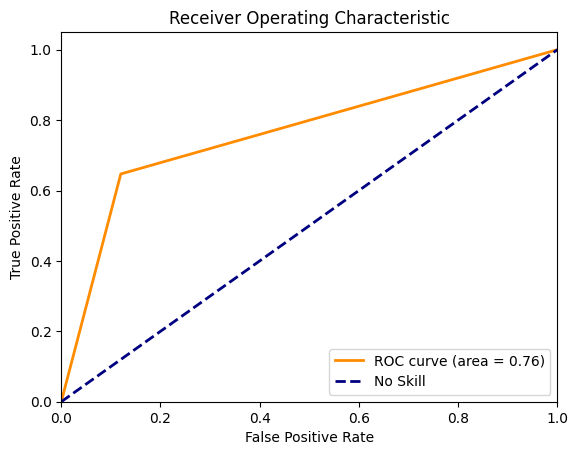

In [ ]:
# Plot ROC curve
plt.figure()

# Plot the ROC curve with a label displaying the ROC AUC score
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label='ROC curve (area = %0.2f)' % roc_auc)

# Plot a dashed diagonal line for reference
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='No Skill')

# Set the x and y-axis limits
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Label the x and y-axes
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Set the title of the plot
plt.title('Receiver Operating Characteristic')

# Add a legend to the plot
plt.legend(loc='lower right')

# Display the ROC curve plot
plt.show()

In [ ]:
# PRC Curve and AUC
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
prc_auc = average_precision_score(y_test, y_pred)
print("PRC AUC:", prc_auc)

PRC AUC: 0.6512605042016806


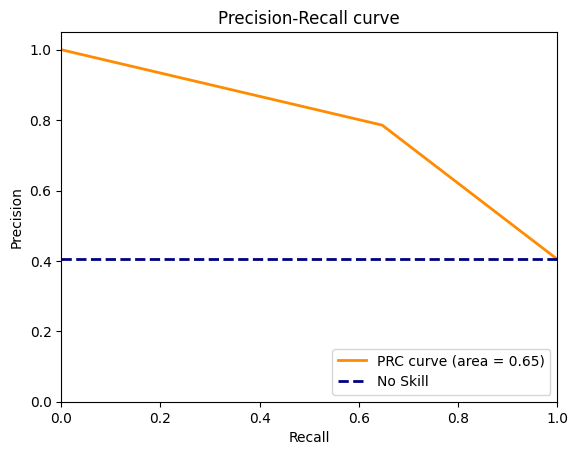

In [ ]:
# Plot PRC curve
plt.figure()

# Plot the PRC curve with a label displaying the PRC AUC score
plt.plot(recall, precision, color='darkorange', lw=2,
         label='PRC curve (area = %0.2f)' % prc_auc)

# Plot a dashed no-skill line for reference
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], color='navy', lw=2, linestyle='--', label='No Skill')

# Set the x and y-axis limits
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Label the x and y-axes
plt.xlabel('Recall')
plt.ylabel('Precision')

# Set the title of the plot
plt.title('Precision-Recall curve')

# Add a legend to the plot
plt.legend(loc='lower right')

# Display the ROC curve plot
plt.show()

#### Nested cross-validation

In [ ]:
# Evaluation from the nested cross validation (No data scaling)

# Declare the inner and outer cross-validation strategies
inner_cv = KFold(n_splits=5, shuffle=True, random_state=0)
outer_cv = KFold(n_splits=3, shuffle=True, random_state=0)

# Nested cross-validation
outer_acc, outer_params = [], []
round = 0

for train_index, test_index in outer_cv.split(X,y):
    round += 1

    # Split train and test datasets according to the outer_cv
    Xn_train = X.iloc[train_index,:]
    Xn_test = X.iloc[test_index,:]
    yn_train = y.iloc[train_index]
    yn_test = y.iloc[test_index]

    # Create a Gaussian Naive Bayes classifier
    GNBclf = GaussianNB()

    # Hyperparameter tuning
    hyperparams = {'var_smoothing': np.arange(0,50,0.0001)
                  }

    # Use random search to find the best hyperparameters
    rand_search = RandomizedSearchCV(GNBclf,
                                     param_distributions = hyperparams,
                                     n_iter=200,
                                     cv=inner_cv,
                                     random_state=0
                                    )

    # Fit the random search object to the data
    rand_search.fit(Xn_train, yn_train)

    # Model prediction based on the best hyperparams
    best_GNBclf = rand_search.best_estimator_
    yn_pred = best_GNBclf.predict(Xn_test)

    # Accuracy score from the validation dataset
    acc = metrics.accuracy_score(yn_test, yn_pred)

    # Store the result
    outer_acc.append(acc)
    outer_params.append(rand_search.best_params_)

    # Report progress
    print(f'Round {round}: test_score= {acc:.3f}, validation_score= {rand_search.best_score_:.3f}')

# Summarize the estimated performance of the model
print(
    '\nThe mean score using nested cross-validation is: '
    f'{np.mean(outer_acc):.3f} ± {np.std(outer_acc):.3f}'
)

Round 1: test_score= 0.757, validation_score= 0.712
Round 2: test_score= 0.671, validation_score= 0.751
Round 3: test_score= 0.735, validation_score= 0.727

The mean score using nested cross-validation is: 0.721 ± 0.036


#### Effect of data standardization on the model performance

In [ ]:
# Evaluation from the nested cross validation (standardize only Age_at_diagnosis feature)

# Declare the inner and outer cross-validation strategies
inner_cv = KFold(n_splits=5, shuffle=True, random_state=0)
outer_cv = KFold(n_splits=3, shuffle=True, random_state=0)

# Nested cross-validation
outer_acc, outer_params = [], []
round = 0

for train_index, test_index in outer_cv.split(X,y):
    round += 1

    # Split train and test datasets according to the outer_cv
    Xn_train = X.iloc[train_index,:]
    Xn_test = X.iloc[test_index,:]
    yn_train = y.iloc[train_index]
    yn_test = y.iloc[test_index]

    # Data standardization (Age_at_diagnosis feature)
    sc = StandardScaler()
    Age_train_stdn = sc.fit_transform(np.array(Xn_train.Age_at_diagnosis).reshape(-1, 1))
    Age_test_stdn = sc.transform(np.array(Xn_test.Age_at_diagnosis).reshape(-1, 1))
    Xn_train_std, Xn_test_std = Xn_train.copy(), Xn_test.copy()
    Xn_train_std.Age_at_diagnosis = Age_train_stdn
    Xn_test_std.Age_at_diagnosis = Age_test_stdn

    # Create a Gaussian Naive Bayes classifier
    GNBclf = GaussianNB()

    # Hyperparameter tuning
    hyperparams = {'var_smoothing': np.arange(0,50,0.0001)
                  }

    # Use random search to find the best hyperparameters
    rand_search = RandomizedSearchCV(GNBclf,
                                     param_distributions = hyperparams,
                                     n_iter=200,
                                     cv=inner_cv,
                                     random_state=0
                                    )

    # Fit the random search object to the data
    rand_search.fit(Xn_train_std, yn_train)

    # Model prediction based on the best hyperparams
    best_GNBclf = rand_search.best_estimator_
    yn_pred = best_GNBclf.predict(Xn_test_std)

    # Accuracy score from the validation dataset
    acc = metrics.accuracy_score(yn_test, yn_pred)

    # Store the result
    outer_acc.append(acc)
    outer_params.append(rand_search.best_params_)

    # Report progress
    print(f'Round {round}: test_score= {acc:.3f}, validation_score= {rand_search.best_score_:.3f}')

# Summarize the estimated performance of the model
print(
    '\nThe mean score using nested cross-validation is: '
    f'{np.mean(outer_acc):.3f} ± {np.std(outer_acc):.3f}'
)

Round 1: test_score= 0.843, validation_score= 0.848
Round 2: test_score= 0.818, validation_score= 0.839
Round 3: test_score= 0.849, validation_score= 0.832

The mean score using nested cross-validation is: 0.837 ± 0.014


In [ ]:
# Evaluation from the nested cross validation (standardize all features)

# Declare the inner and outer cross-validation strategies
inner_cv = KFold(n_splits=5, shuffle=True, random_state=0)
outer_cv = KFold(n_splits=3, shuffle=True, random_state=0)

# Nested cross-validation
outer_acc, outer_params = [], []
round = 0

for train_index, test_index in outer_cv.split(X,y):
    round += 1

    # Split train and test datasets according to the outer_cv
    Xn_train = X.iloc[train_index,:]
    Xn_test = X.iloc[test_index,:]
    yn_train = y.iloc[train_index]
    yn_test = y.iloc[test_index]

    # Data standardization (all features)
    Xn_train = pd.DataFrame(sc.fit_transform(Xn_train), columns=Xn_train.columns)
    Xn_test = pd.DataFrame(sc.transform(Xn_test), columns=Xn_train.columns)

    # Create a Gaussian Naive Bayes classifier
    GNBclf = GaussianNB()

    # Hyperparameter tuning
    hyperparams = {'var_smoothing': np.arange(0,50,0.0001)
                  }

    # Use random search to find the best hyperparameters
    rand_search = RandomizedSearchCV(GNBclf,
                                     param_distributions = hyperparams,
                                     n_iter=200,
                                     cv=inner_cv,
                                     random_state=0
                                    )

    # Fit the random search object to the data
    rand_search.fit(Xn_train, yn_train)

    # Model prediction based on the best hyperparams
    best_GNBclf = rand_search.best_estimator_
    yn_pred = best_GNBclf.predict(Xn_test)

    # Accuracy score from the validation dataset
    acc = metrics.accuracy_score(yn_test, yn_pred)

    # Store the result
    outer_acc.append(acc)
    outer_params.append(rand_search.best_params_)

    # Report progress
    print(f'Round {round}: test_score= {acc:.3f}, validation_score= {rand_search.best_score_:.3f}')

# Summarize the estimated performance of the model
print(
    '\nThe mean score using nested cross-validation is: '
    f'{np.mean(outer_acc):.3f} ± {np.std(outer_acc):.3f}'
)

Round 1: test_score= 0.843, validation_score= 0.857
Round 2: test_score= 0.839, validation_score= 0.823
Round 3: test_score= 0.842, validation_score= 0.832

The mean score using nested cross-validation is: 0.841 ± 0.002


#### Effect of PCA on the performance

In [ ]:
# Evaluation from the nested cross validation (PCA)

# Declare the inner and outer cross-validation strategies
inner_cv = KFold(n_splits=5, shuffle=True, random_state=0)
outer_cv = KFold(n_splits=3, shuffle=True, random_state=0)

# Nested cross-validation
outer_acc, outer_params = [], []
round = 0

for train_index, test_index in outer_cv.split(X,y):
    round += 1

    # Split train and test datasets according to the outer_cv
    Xn_train = X.iloc[train_index,:]
    Xn_test = X.iloc[test_index,:]
    yn_train = y.iloc[train_index]
    yn_test = y.iloc[test_index]

    # Data standardization (all features)
    Xn_train = pd.DataFrame(sc.fit_transform(Xn_train), columns=Xn_train.columns)
    Xn_test = pd.DataFrame(sc.transform(Xn_test), columns=Xn_train.columns)

    # PCA
    pca = PCA(n_components=20)
    train_pcan = pca.fit_transform(Xn_train)
    test_pcan = pca.transform(Xn_test)
    columns = ['pca_comp_%i' % i for i in range(1,21)]
    Xn_train_pca = pd.DataFrame(train_pcan, columns=columns, index=Xn_train.index)
    Xn_test_pca = pd.DataFrame(test_pcan, columns=columns, index=Xn_test.index)

    # Create a Gaussian Naive Bayes classifier
    GNBclf = GaussianNB()

    # Hyperparameter tuning
    hyperparams = {'var_smoothing': np.arange(0,50,0.0001)
                  }

    # Use random search to find the best hyperparameters
    rand_search = RandomizedSearchCV(GNBclf,
                                     param_distributions = hyperparams,
                                     n_iter=200,
                                     cv=inner_cv,
                                     random_state=0
                                    )

    # Fit the random search object to the data
    rand_search.fit(Xn_train_pca, yn_train)

    # Model prediction based on the best hyperparams
    best_GNBclf = rand_search.best_estimator_
    yn_pred = best_GNBclf.predict(Xn_test_pca)

    # Accuracy score from the validation dataset
    acc = metrics.accuracy_score(yn_test, yn_pred)

    # Store the result
    outer_acc.append(acc)
    outer_params.append(rand_search.best_params_)

    # Report progress
    print(f'Round {round}: test_score= {acc:.3f}, validation_score= {rand_search.best_score_:.3f}')

# Summarize the estimated performance of the model
print(
    '\nThe mean score using nested cross-validation is: '
    f'{np.mean(outer_acc):.3f} ± {np.std(outer_acc):.3f}'
)

Round 1: test_score= 0.843, validation_score= 0.843
Round 2: test_score= 0.761, validation_score= 0.749
Round 3: test_score= 0.810, validation_score= 0.811

The mean score using nested cross-validation is: 0.805 ± 0.034


#### Effect of the feature engineering on the performance

In [ ]:
# Evaluation from the nested cross validation (featuer engineering)

# Declare the inner and outer cross-validation strategies
inner_cv = KFold(n_splits=5, shuffle=True, random_state=0)
outer_cv = KFold(n_splits=3, shuffle=True, random_state=0)

# Nested cross-validation
outer_acc, outer_params = [], []
round = 0

for train_index, test_index in outer_cv.split(X,y):
    round += 1

    # Split train and test datasets according to the outer_cv
    Xn_train = X.iloc[train_index,:]
    Xn_test = X.iloc[test_index,:]
    yn_train = y.iloc[train_index]
    yn_test = y.iloc[test_index]

    # Data standardization (all features)
    Xn_train = pd.DataFrame(sc.fit_transform(Xn_train), columns=Xn_train.columns)
    Xn_test = pd.DataFrame(sc.transform(Xn_test), columns=Xn_train.columns)

    # PCA
    pca = PCA(n_components=20)
    train_pcan = pca.fit_transform(Xn_train)
    test_pcan = pca.transform(Xn_test)
    columns = ['pca_comp_%i' % i for i in range(1,21)]
    Xn_train_pca = pd.DataFrame(train_pcan, columns=columns, index=Xn_train.index)
    Xn_test_pca = pd.DataFrame(test_pcan, columns=columns, index=Xn_test.index)

    # Feature engineering
    Xn_train_eng = pd.concat([Xn_train, Xn_train_pca], axis=1)
    Xn_test_eng = pd.concat([Xn_test, Xn_test_pca], axis=1)

    # Create a Gaussian Naive Bayes classifier
    GNBclf = GaussianNB()

    # Hyperparameter tuning
    hyperparams = {'var_smoothing': np.arange(0,50,0.0001)
                  }

    # Use random search to find the best hyperparameters
    rand_search = RandomizedSearchCV(GNBclf,
                                     param_distributions = hyperparams,
                                     n_iter=200,
                                     cv=inner_cv,
                                     random_state=0
                                    )

    # Fit the random search object to the data
    rand_search.fit(Xn_train_eng, yn_train)

    # Model prediction based on the best hyperparams
    best_GNBclf = rand_search.best_estimator_
    yn_pred = best_GNBclf.predict(Xn_test_eng)

    # Accuracy score from the validation dataset
    acc = metrics.accuracy_score(yn_test, yn_pred)

    # Store the result
    outer_acc.append(acc)
    outer_params.append(rand_search.best_params_)

    # Report progress
    print(f'Round {round}: test_score= {acc:.3f}, validation_score= {rand_search.best_score_:.3f}')

# Summarize the estimated performance of the model
print(
    '\nThe mean score using nested cross-validation is: '
    f'{np.mean(outer_acc):.3f} ± {np.std(outer_acc):.3f}'
)

Round 1: test_score= 0.854, validation_score= 0.864
Round 2: test_score= 0.839, validation_score= 0.817
Round 3: test_score= 0.846, validation_score= 0.832

The mean score using nested cross-validation is: 0.846 ± 0.006


### 4.3 Tree-based learnings

#### Decision Tree

##### General model learning and evaluation

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Hyperparameter tuning using RandomSearch
hyperparams = {'max_depth': randint(1,100),
               'min_samples_split':randint(2,100),
               'min_samples_leaf':randint(1,100)}

# Create a decision tree classifier
dt = DecisionTreeClassifier()

# Use a random search to find the best hyperparameters
rand_search = RandomizedSearchCV(dt,
                                 param_distributions = hyperparams,
                                 n_iter=200,
                                 cv=5,
                                 random_state=0
                                 )

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=200,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ef925da3640>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ef925dc5f30>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ef925b46a40>},
                   random_state=0)

In [ ]:
# The average score of the 5-fold cross validation from the best result
print('Average accuracy score (across experiments):')
print(rand_search.best_score_)

Average accuracy score (across experiments):
0.8494859038142621


In [ ]:
# Create a variable for the best model
best_dt = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 96}


In [ ]:
# Accuracy score from the validation dataset
y_pred = best_dt.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8869047619047619


In [ ]:
# Print classfication evaluation scores
print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.945     0.860     0.901       100
           1      0.818     0.926     0.869        68

    accuracy                          0.887       168
   macro avg      0.882     0.893     0.885       168
weighted avg      0.894     0.887     0.888       168



In [ ]:
# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print("ROC AUC:", roc_auc)

ROC AUC: 0.893235294117647


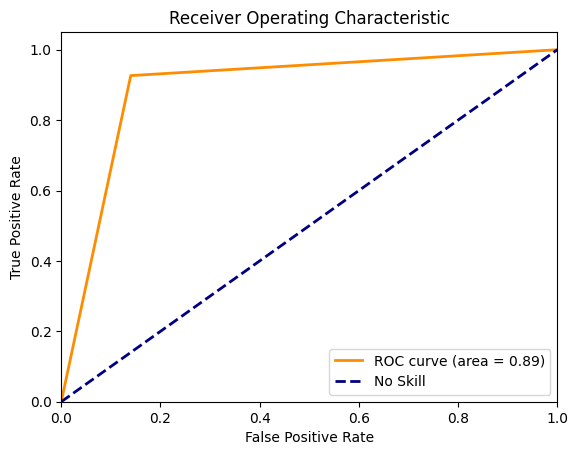

In [ ]:
# Plot ROC curve
plt.figure()

# Plot the ROC curve with a label displaying the ROC AUC score
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label='ROC curve (area = %0.2f)' % roc_auc)

# Plot a dashed diagonal line for reference
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='No Skill')

# Set the x and y-axis limits
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Label the x and y-axes
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Set the title of the plot
plt.title('Receiver Operating Characteristic')

# Add a legend to the plot
plt.legend(loc='lower right')

# Display the ROC curve plot
plt.show()

In [ ]:
# PRC Curve and AUC
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
prc_auc = average_precision_score(y_test, y_pred)
print("PRC AUC:", prc_auc)

PRC AUC: 0.7877832951362364


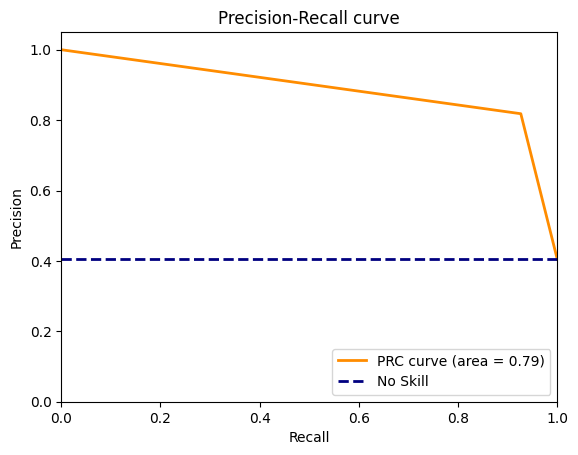

In [ ]:
# Plot PRC curve
plt.figure()

# Plot the PRC curve with a label displaying the PRC AUC score
plt.plot(recall, precision, color='darkorange', lw=2,
         label='PRC curve (area = %0.2f)' % prc_auc)

# Plot a dashed no-skill line for reference
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], color='navy', lw=2, linestyle='--', label='No Skill')

# Set the x and y-axis limits
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Label the x and y-axes
plt.xlabel('Recall')
plt.ylabel('Precision')

# Set the title of the plot
plt.title('Precision-Recall curve')

# Add a legend to the plot
plt.legend(loc='lower right')

# Display the ROC curve plot
plt.show()

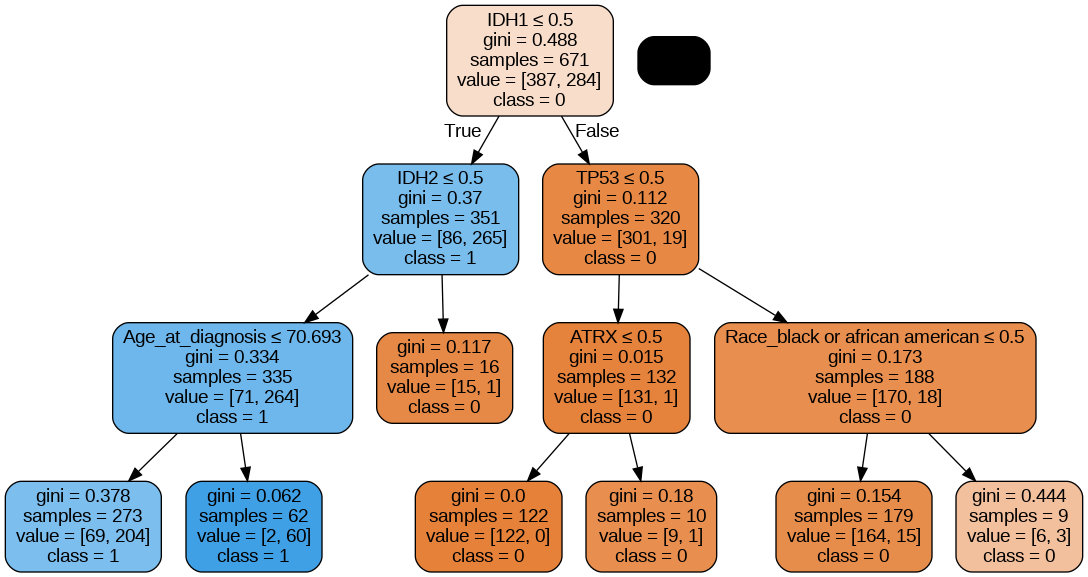

In [ ]:
# Tree visualization
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(best_dt, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = X_train.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

##### Nested cross-validation

In [ ]:
# Evaluation from the nested cross validation (No data scaling)

# Declare the inner and outer cross-validation strategies
inner_cv = KFold(n_splits=5, shuffle=True, random_state=0)
outer_cv = KFold(n_splits=3, shuffle=True, random_state=0)

# Nested cross-validation
outer_acc, outer_params = [], []
round = 0

for train_index, test_index in outer_cv.split(X,y):
    round += 1

    # Split train and test datasets according to the outer_cv
    Xn_train = X.iloc[train_index,:]
    Xn_test = X.iloc[test_index,:]
    yn_train = y.iloc[train_index]
    yn_test = y.iloc[test_index]

    # Create a decision tree classifier
    dt = DecisionTreeClassifier()

    # Hyperparameter tuning
    hyperparams = {'max_depth': randint(1,100),
                   'min_samples_split':randint(2,100),
                   'min_samples_leaf':randint(1,100)
                   }

    # Use random search to find the best hyperparameters
    rand_search = RandomizedSearchCV(dt,
                                     param_distributions = hyperparams,
                                     n_iter=200,
                                     cv=inner_cv,
                                     random_state=0
                                    )

    # Fit the random search object to the data
    rand_search.fit(Xn_train, yn_train)

    # Model prediction based on the best hyperparams
    best_dt = rand_search.best_estimator_
    yn_pred = best_dt.predict(Xn_test)

    # Accuracy score from the validation dataset
    acc = metrics.accuracy_score(yn_test, yn_pred)

    # Store the result
    outer_acc.append(acc)
    outer_params.append(rand_search.best_params_)

    # Report progress
    print(f'Round {round}: test_score= {acc:.3f}, validation_score= {rand_search.best_score_:.3f}')

# Summarize the estimated performance of the model
print(
    '\nThe mean score using nested cross-validation is: '
    f'{np.mean(outer_acc):.3f} ± {np.std(outer_acc):.3f}'
)

Round 1: test_score= 0.861, validation_score= 0.871
Round 2: test_score= 0.818, validation_score= 0.857
Round 3: test_score= 0.842, validation_score= 0.861

The mean score using nested cross-validation is: 0.840 ± 0.018


##### Effect of data standardization on the model performance

In [ ]:
# Evaluation from the nested cross validation (standardize only Age_at_diagnosis feature)

# Declare the inner and outer cross-validation strategies
inner_cv = KFold(n_splits=5, shuffle=True, random_state=0)
outer_cv = KFold(n_splits=3, shuffle=True, random_state=0)

# Nested cross-validation
outer_acc, outer_params = [], []
round = 0

for train_index, test_index in outer_cv.split(X,y):
    round += 1

    # Split train and test datasets according to the outer_cv
    Xn_train = X.iloc[train_index,:]
    Xn_test = X.iloc[test_index,:]
    yn_train = y.iloc[train_index]
    yn_test = y.iloc[test_index]

    # Data standardization (Age_at_diagnosis feature)
    sc = StandardScaler()
    Age_train_stdn = sc.fit_transform(np.array(Xn_train.Age_at_diagnosis).reshape(-1, 1))
    Age_test_stdn = sc.transform(np.array(Xn_test.Age_at_diagnosis).reshape(-1, 1))
    Xn_train_std, Xn_test_std = Xn_train.copy(), Xn_test.copy()
    Xn_train_std.Age_at_diagnosis = Age_train_stdn
    Xn_test_std.Age_at_diagnosis = Age_test_stdn

    # Create a decision tree classifier
    dt = DecisionTreeClassifier()

    # Hyperparameter tuning
    hyperparams = {'max_depth': randint(1,100),
                   'min_samples_split':randint(2,100),
                   'min_samples_leaf':randint(1,100)
                   }

    # Use random search to find the best hyperparameters
    rand_search = RandomizedSearchCV(dt,
                                     param_distributions = hyperparams,
                                     n_iter=200,
                                     cv=inner_cv,
                                     random_state=0
                                    )

    # Fit the random search object to the data
    rand_search.fit(Xn_train_std, yn_train)

    # Model prediction based on the best hyperparams
    best_dt = rand_search.best_estimator_
    yn_pred = best_dt.predict(Xn_test_std)

    # Accuracy score from the validation dataset
    acc = metrics.accuracy_score(yn_test, yn_pred)

    # Store the result
    outer_acc.append(acc)
    outer_params.append(rand_search.best_params_)

    # Report progress
    print(f'Round {round}: test_score= {acc:.3f}, validation_score= {rand_search.best_score_:.3f}')

# Summarize the estimated performance of the model
print(
    '\nThe mean score using nested cross-validation is: '
    f'{np.mean(outer_acc):.3f} ± {np.std(outer_acc):.3f}'
)

Round 1: test_score= 0.861, validation_score= 0.871
Round 2: test_score= 0.818, validation_score= 0.857
Round 3: test_score= 0.842, validation_score= 0.861

The mean score using nested cross-validation is: 0.840 ± 0.018


In [ ]:
# Evaluation from the nested cross validation (standardize all features)

# Declare the inner and outer cross-validation strategies
inner_cv = KFold(n_splits=5, shuffle=True, random_state=0)
outer_cv = KFold(n_splits=3, shuffle=True, random_state=0)

# Nested cross-validation
outer_acc, outer_params = [], []
round = 0

for train_index, test_index in outer_cv.split(X,y):
    round += 1

    # Split train and test datasets according to the outer_cv
    Xn_train = X.iloc[train_index,:]
    Xn_test = X.iloc[test_index,:]
    yn_train = y.iloc[train_index]
    yn_test = y.iloc[test_index]

    # Data standardization (all features)
    Xn_train = pd.DataFrame(sc.fit_transform(Xn_train), columns=Xn_train.columns)
    Xn_test = pd.DataFrame(sc.transform(Xn_test), columns=Xn_train.columns)

    # Create a decision tree classifier
    dt = DecisionTreeClassifier()

    # Hyperparameter tuning
    hyperparams = {'max_depth': randint(1,100),
                   'min_samples_split':randint(2,100),
                   'min_samples_leaf':randint(1,100)
                   }

    # Use random search to find the best hyperparameters
    rand_search = RandomizedSearchCV(dt,
                                     param_distributions = hyperparams,
                                     n_iter=200,
                                     cv=inner_cv,
                                     random_state=0
                                    )

    # Fit the random search object to the data
    rand_search.fit(Xn_train, yn_train)

    # Model prediction based on the best hyperparams
    best_dt = rand_search.best_estimator_
    yn_pred = best_dt.predict(Xn_test)

    # Accuracy score from the validation dataset
    acc = metrics.accuracy_score(yn_test, yn_pred)

    # Store the result
    outer_acc.append(acc)
    outer_params.append(rand_search.best_params_)

    # Report progress
    print(f'Round {round}: test_score= {acc:.3f}, validation_score= {rand_search.best_score_:.3f}')

# Summarize the estimated performance of the model
print(
    '\nThe mean score using nested cross-validation is: '
    f'{np.mean(outer_acc):.3f} ± {np.std(outer_acc):.3f}'
)

Round 1: test_score= 0.861, validation_score= 0.871
Round 2: test_score= 0.818, validation_score= 0.857
Round 3: test_score= 0.842, validation_score= 0.861

The mean score using nested cross-validation is: 0.840 ± 0.018


##### Effect of PCA on the performance

In [ ]:
# Evaluation from the nested cross validation (PCA)

# Declare the inner and outer cross-validation strategies
inner_cv = KFold(n_splits=5, shuffle=True, random_state=0)
outer_cv = KFold(n_splits=3, shuffle=True, random_state=0)

# Nested cross-validation
outer_acc, outer_params = [], []
round = 0

for train_index, test_index in outer_cv.split(X,y):
    round += 1

    # Split train and test datasets according to the outer_cv
    Xn_train = X.iloc[train_index,:]
    Xn_test = X.iloc[test_index,:]
    yn_train = y.iloc[train_index]
    yn_test = y.iloc[test_index]

    # Data standardization (all features)
    Xn_train = pd.DataFrame(sc.fit_transform(Xn_train), columns=Xn_train.columns)
    Xn_test = pd.DataFrame(sc.transform(Xn_test), columns=Xn_train.columns)

    # PCA
    pca = PCA(n_components=20)
    train_pcan = pca.fit_transform(Xn_train)
    test_pcan = pca.transform(Xn_test)
    columns = ['pca_comp_%i' % i for i in range(1,21)]
    Xn_train_pca = pd.DataFrame(train_pcan, columns=columns, index=Xn_train.index)
    Xn_test_pca = pd.DataFrame(test_pcan, columns=columns, index=Xn_test.index)

    # Create a decision tree classifier
    dt = DecisionTreeClassifier()

    # Hyperparameter tuning
    hyperparams = {'max_depth': randint(1,100),
                   'min_samples_split':randint(2,100),
                   'min_samples_leaf':randint(1,100)
                   }

    # Use random search to find the best hyperparameters
    rand_search = RandomizedSearchCV(dt,
                                     param_distributions = hyperparams,
                                     n_iter=200,
                                     cv=inner_cv,
                                     random_state=0
                                    )

    # Fit the random search object to the data
    rand_search.fit(Xn_train_pca, yn_train)

    # Model prediction based on the best hyperparams
    best_dt = rand_search.best_estimator_
    yn_pred = best_dt.predict(Xn_test_pca)

    # Accuracy score from the validation dataset
    acc = metrics.accuracy_score(yn_test, yn_pred)

    # Store the result
    outer_acc.append(acc)
    outer_params.append(rand_search.best_params_)

    # Report progress
    print(f'Round {round}: test_score= {acc:.3f}, validation_score= {rand_search.best_score_:.3f}')

# Summarize the estimated performance of the model
print(
    '\nThe mean score using nested cross-validation is: '
    f'{np.mean(outer_acc):.3f} ± {np.std(outer_acc):.3f}'
)

Round 1: test_score= 0.839, validation_score= 0.835
Round 2: test_score= 0.779, validation_score= 0.844
Round 3: test_score= 0.849, validation_score= 0.848

The mean score using nested cross-validation is: 0.822 ± 0.031


##### Effect of the feature engineering on the performance

In [ ]:
# Evaluation from the nested cross validation (featuer engineering)

# Declare the inner and outer cross-validation strategies
inner_cv = KFold(n_splits=5, shuffle=True, random_state=0)
outer_cv = KFold(n_splits=3, shuffle=True, random_state=0)

# Nested cross-validation
outer_acc, outer_params = [], []
round = 0

for train_index, test_index in outer_cv.split(X,y):
    round += 1

    # Split train and test datasets according to the outer_cv
    Xn_train = X.iloc[train_index,:]
    Xn_test = X.iloc[test_index,:]
    yn_train = y.iloc[train_index]
    yn_test = y.iloc[test_index]

    # Data standardization (all features)
    Xn_train = pd.DataFrame(sc.fit_transform(Xn_train), columns=Xn_train.columns)
    Xn_test = pd.DataFrame(sc.transform(Xn_test), columns=Xn_train.columns)

    # PCA
    pca = PCA(n_components=20)
    train_pcan = pca.fit_transform(Xn_train)
    test_pcan = pca.transform(Xn_test)
    columns = ['pca_comp_%i' % i for i in range(1,21)]
    Xn_train_pca = pd.DataFrame(train_pcan, columns=columns, index=Xn_train.index)
    Xn_test_pca = pd.DataFrame(test_pcan, columns=columns, index=Xn_test.index)

    # Feature engineering
    Xn_train_eng = pd.concat([Xn_train, Xn_train_pca], axis=1)
    Xn_test_eng = pd.concat([Xn_test, Xn_test_pca], axis=1)

    # Create a decision tree classifier
    dt = DecisionTreeClassifier()

    # Hyperparameter tuning
    hyperparams = {'max_depth': randint(1,100),
                   'min_samples_split':randint(2,100),
                   'min_samples_leaf':randint(1,100)
                   }

    # Use random search to find the best hyperparameters
    rand_search = RandomizedSearchCV(dt,
                                     param_distributions = hyperparams,
                                     n_iter=200,
                                     cv=inner_cv,
                                     random_state=0
                                    )

    # Fit the random search object to the data
    rand_search.fit(Xn_train_eng, yn_train)

    # Model prediction based on the best hyperparams
    best_dt = rand_search.best_estimator_
    yn_pred = best_dt.predict(Xn_test_eng)

    # Accuracy score from the validation dataset
    acc = metrics.accuracy_score(yn_test, yn_pred)

    # Store the result
    outer_acc.append(acc)
    outer_params.append(rand_search.best_params_)

    # Report progress
    print(f'Round {round}: test_score= {acc:.3f}, validation_score= {rand_search.best_score_:.3f}')

# Summarize the estimated performance of the model
print(
    '\nThe mean score using nested cross-validation is: '
    f'{np.mean(outer_acc):.3f} ± {np.std(outer_acc):.3f}'
)

Round 1: test_score= 0.818, validation_score= 0.862
Round 2: test_score= 0.793, validation_score= 0.857
Round 3: test_score= 0.849, validation_score= 0.854

The mean score using nested cross-validation is: 0.820 ± 0.023


#### Random Forest (RF) classifier

##### General model learning and evaluation

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Hyperparameter tuning
hyperparams = {'n_estimators': randint(50,500),
              'max_depth': randint(1,100),
              'min_samples_split':randint(2,100),
              'min_samples_leaf':randint(1,100)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = hyperparams,
                                 n_iter=10,
                                 cv=5,
                                 random_state=0
                                 )

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ef925befc70>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ef925beffd0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ef925befd90>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ef925c42b60>},
                   random_state=0)

In [ ]:
# The average score of the 5-fold cross validation from the best result
print('Average accuracy score (across experiments):')
print(rand_search.best_score_)

Average accuracy score (across experiments):
0.852482034273079


In [ ]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 68, 'min_samples_leaf': 10, 'min_samples_split': 85, 'n_estimators': 327}


In [ ]:
# Accuracy score from the validation dataset
y_pred = best_rf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8928571428571429


In [ ]:
# Print classfication evaluation scores
print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.946     0.870     0.906       100
           1      0.829     0.926     0.875        68

    accuracy                          0.893       168
   macro avg      0.887     0.898     0.891       168
weighted avg      0.898     0.893     0.894       168



In [ ]:
# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print("ROC AUC:", roc_auc)

ROC AUC: 0.898235294117647


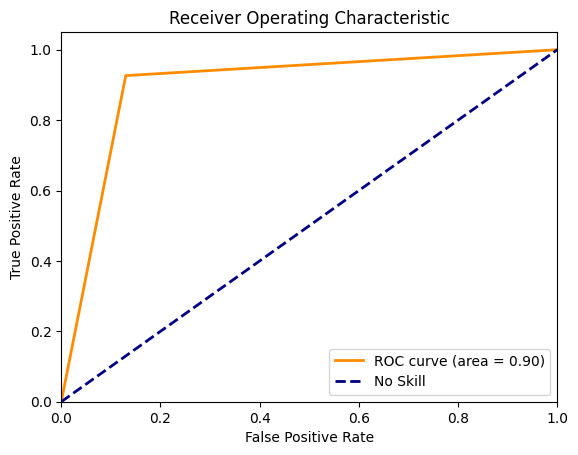

In [ ]:
# Plot ROC curve
plt.figure()

# Plot the ROC curve with a label displaying the ROC AUC score
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label='ROC curve (area = %0.2f)' % roc_auc)

# Plot a dashed diagonal line for reference
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='No Skill')

# Set the x and y-axis limits
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Label the x and y-axes
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Set the title of the plot
plt.title('Receiver Operating Characteristic')

# Add a legend to the plot
plt.legend(loc='lower right')

# Display the ROC curve plot
plt.show()

In [ ]:
# PRC Curve and AUC
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
prc_auc = average_precision_score(y_test, y_pred)
print("PRC AUC:", prc_auc)

PRC AUC: 0.7977572607990565


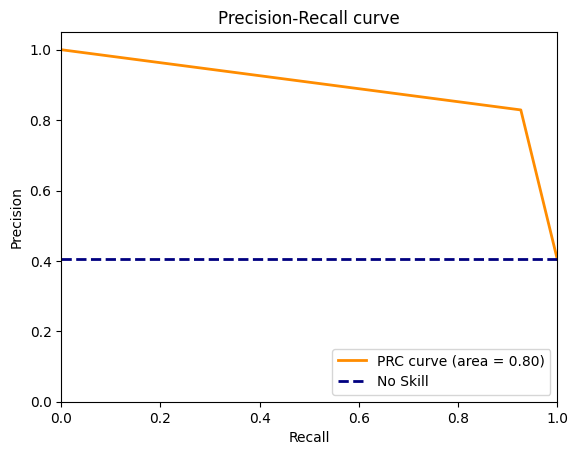

In [ ]:
# Plot PRC curve
plt.figure()

# Plot the PRC curve with a label displaying the PRC AUC score
plt.plot(recall, precision, color='darkorange', lw=2,
         label='PRC curve (area = %0.2f)' % prc_auc)

# Plot a dashed no-skill line for reference
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], color='navy', lw=2, linestyle='--', label='No Skill')

# Set the x and y-axis limits
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Label the x and y-axes
plt.xlabel('Recall')
plt.ylabel('Precision')

# Set the title of the plot
plt.title('Precision-Recall curve')

# Add a legend to the plot
plt.legend(loc='lower right')

# Display the ROC curve plot
plt.show()

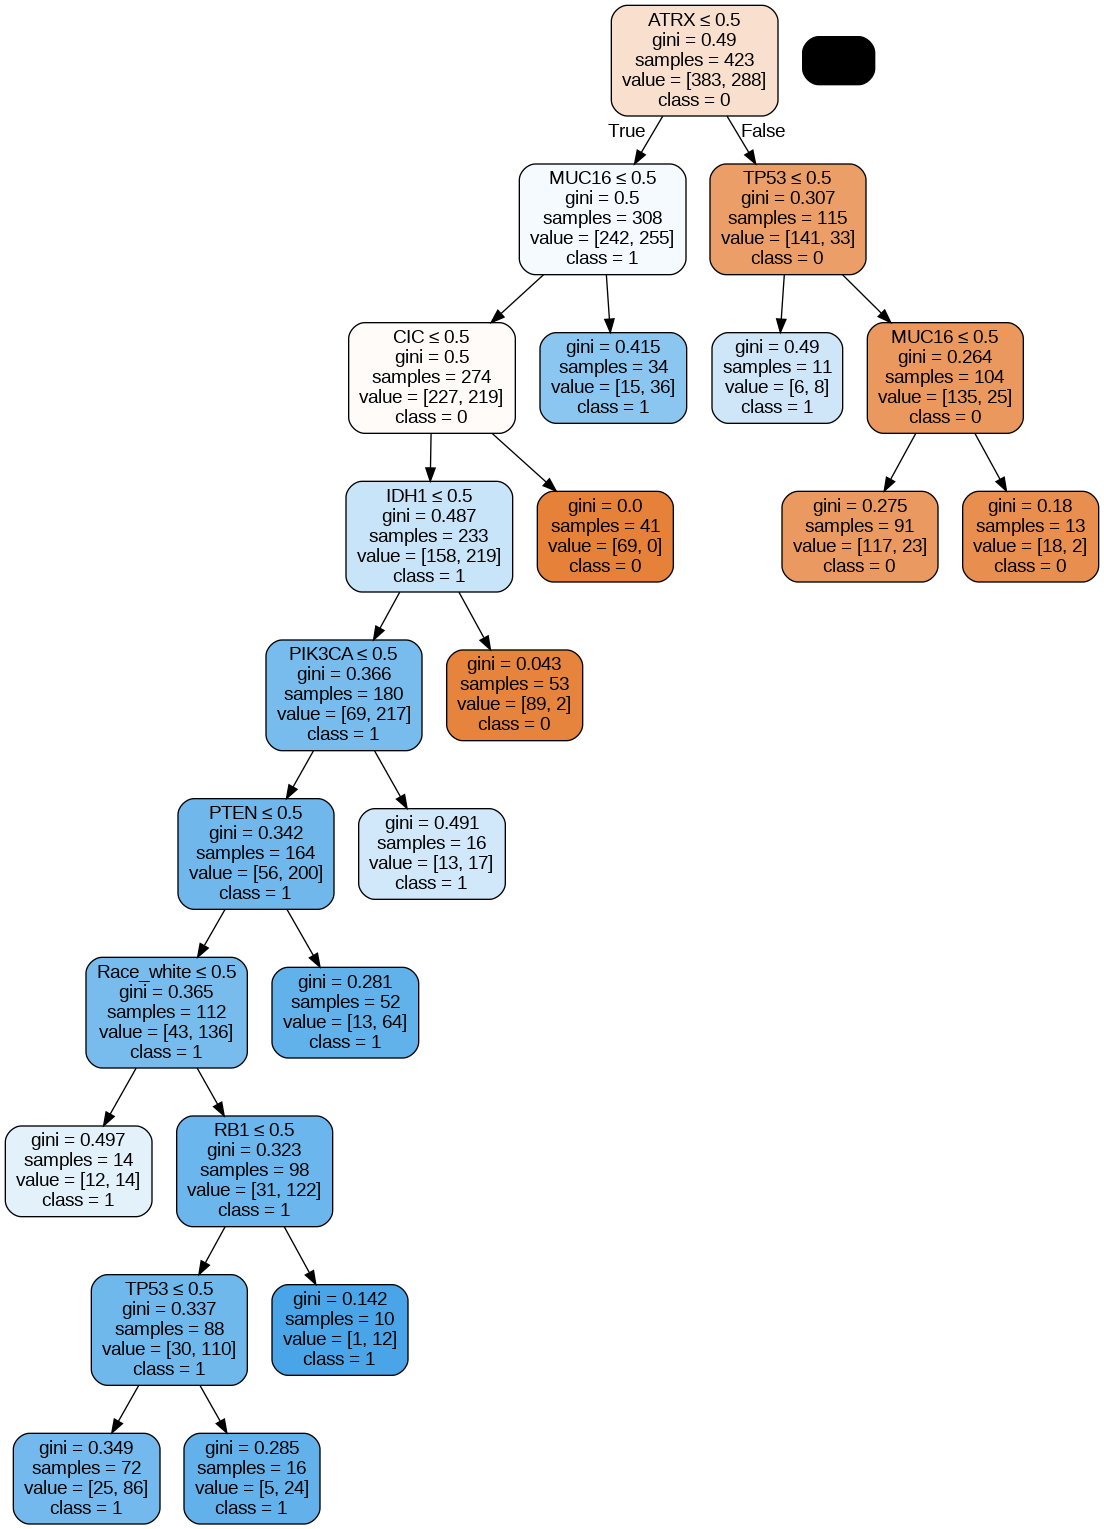

In [ ]:
# Tree visualization
dot_data = StringIO()
export_graphviz(best_rf.estimators_[0], out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = X_train.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

##### Analysis of important features
We can use the RF classifier to identify important features by calculating the feature scores according to the code below

In [ ]:
# Identify important features by calculating feature scores
feature_scores = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

IDH1                                     0.486370
Age_at_diagnosis                         0.200355
CIC                                      0.082122
PTEN                                     0.074093
ATRX                                     0.062915
EGFR                                     0.020597
TP53                                     0.016750
NOTCH1                                   0.009178
FUBP1                                    0.008955
RB1                                      0.007550
MUC16                                    0.006811
IDH2                                     0.006475
Race_white                               0.003895
NF1                                      0.003577
Gender                                   0.002954
Race_black or african american           0.002678
GRIN2A                                   0.001273
PDGFRA                                   0.001193
PIK3CA                                   0.000917
PIK3R1                                   0.000822


<ipython-input-93-88ad06cddaf1>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(feature_scores.index)


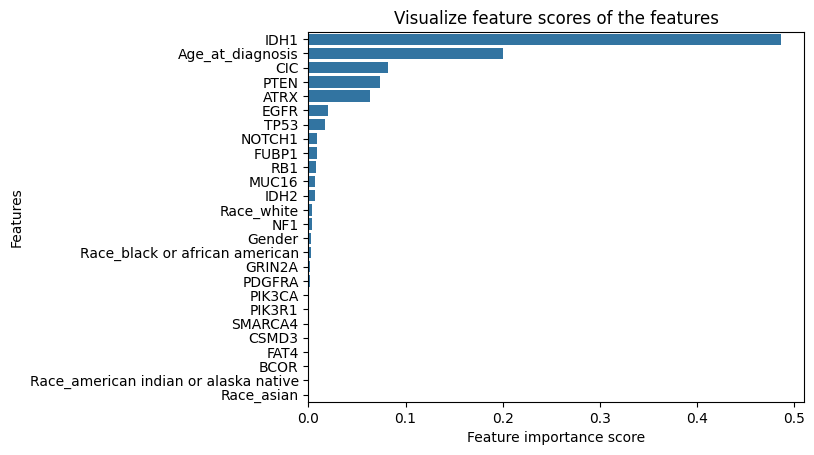

In [ ]:
# Visualize the feature score
#f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

From the feature score, we can see that clinical features like age at diagnosis as well as gene features such as IDH1, CIC, PTEN, and ATRX are considered as high important features.

In [ ]:
# Collect names of the features having the low score
low_feature_scores = feature_scores[feature_scores<0.01]
droped_features = list(low_feature_scores.index)
droped_features

['NOTCH1',
 'FUBP1',
 'RB1',
 'MUC16',
 'IDH2',
 'Race_white',
 'NF1',
 'Gender',
 'Race_black or african american',
 'GRIN2A',
 'PDGFRA',
 'PIK3CA',
 'PIK3R1',
 'SMARCA4',
 'CSMD3',
 'FAT4',
 'BCOR',
 'Race_american indian or alaska native',
 'Race_asian']

We would like to identify the effect of the important features on the model performance, then we will drop the less important features from the X_train and X_valid dataset.

In [ ]:
# Drop the less important feature from X_train and X_test
X_train_drop = X_train.drop(droped_features, axis=1)
X_test_drop = X_test.drop(droped_features, axis=1)

In [ ]:
# Hyperparameter tuning
hyperparams = {'n_estimators': randint(50,500),
              'max_depth': randint(1,100),
              'min_samples_split':randint(2,100),
              'min_samples_leaf':randint(1,100)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = hyperparams,
                                 n_iter=10,
                                 cv=5,
                                 random_state=0
                                 )

# Fit the random search object to the data
rand_search.fit(X_train_drop, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fa180db3e50>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fa180db34f0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fa180db3370>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fa180db2ec0>},
                   random_state=0)

In [ ]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Accuracy score from the validation dataset
y_pred = best_rf.predict(X_test_drop)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8928571428571429


##### Nested cross-validation

In [ ]:
# Evaluation from the nested cross validation (No data scaling)

# Declare the inner and outer cross-validation strategies
inner_cv = KFold(n_splits=5, shuffle=True, random_state=0)
outer_cv = KFold(n_splits=3, shuffle=True, random_state=0)

# Nested cross-validation
outer_acc, outer_params = [], []
round = 0

for train_index, test_index in outer_cv.split(X,y):
    round += 1

    # Split train and test datasets according to the outer_cv
    Xn_train = X.iloc[train_index,:]
    Xn_test = X.iloc[test_index,:]
    yn_train = y.iloc[train_index]
    yn_test = y.iloc[test_index]

    # Create a random forest classifier
    rf = RandomForestClassifier()

    # Hyperparameter tuning
    hyperparams = {'n_estimators': randint(50,500),
                   'max_depth': randint(1,100),
                   'min_samples_split':randint(2,100),
                   'min_samples_leaf':randint(1,100)
                  }

    # Use random search to find the best hyperparameters
    rand_search = RandomizedSearchCV(rf,
                                     param_distributions = hyperparams,
                                     n_iter=10,
                                     cv=inner_cv,
                                     random_state=0
                                    )

    # Fit the random search object to the data
    rand_search.fit(Xn_train, yn_train)

    # Model prediction based on the best hyperparams
    best_rf = rand_search.best_estimator_
    yn_pred = best_rf.predict(Xn_test)

    # Accuracy score from the validation dataset
    acc = metrics.accuracy_score(yn_test, yn_pred)

    # Store the result
    outer_acc.append(acc)
    outer_params.append(rand_search.best_params_)

    # Report progress
    print(f'Round {round}: test_score= {acc:.3f}, validation_score= {rand_search.best_score_:.3f}')

# Summarize the estimated performance of the model
print(
    '\nThe mean score using nested cross-validation is: '
    f'{np.mean(outer_acc):.3f} ± {np.std(outer_acc):.3f}'
)

Round 1: test_score= 0.864, validation_score= 0.862
Round 2: test_score= 0.861, validation_score= 0.859
Round 3: test_score= 0.846, validation_score= 0.866

The mean score using nested cross-validation is: 0.857 ± 0.008


##### Effect of data standardization on the model performance

In [ ]:
# Evaluation from the nested cross validation (standardize only Age_at_diagnosis feature)

# Declare the inner and outer cross-validation strategies
inner_cv = KFold(n_splits=5, shuffle=True, random_state=0)
outer_cv = KFold(n_splits=3, shuffle=True, random_state=0)

# Nested cross-validation
outer_acc, outer_params = [], []
round = 0

for train_index, test_index in outer_cv.split(X,y):
    round += 1

    # Split train and test datasets according to the outer_cv
    Xn_train = X.iloc[train_index,:]
    Xn_test = X.iloc[test_index,:]
    yn_train = y.iloc[train_index]
    yn_test = y.iloc[test_index]

    # Data standardization (Age_at_diagnosis feature)
    sc = StandardScaler()
    Age_train_stdn = sc.fit_transform(np.array(Xn_train.Age_at_diagnosis).reshape(-1, 1))
    Age_test_stdn = sc.transform(np.array(Xn_test.Age_at_diagnosis).reshape(-1, 1))
    Xn_train_std, Xn_test_std = Xn_train.copy(), Xn_test.copy()
    Xn_train_std.Age_at_diagnosis = Age_train_stdn
    Xn_test_std.Age_at_diagnosis = Age_test_stdn

    # Create a random forest classifier
    rf = RandomForestClassifier()

    # Hyperparameter tuning
    hyperparams = {'n_estimators': randint(50,500),
                   'max_depth': randint(1,100),
                   'min_samples_split':randint(2,100),
                   'min_samples_leaf':randint(1,100)
                  }

    # Use random search to find the best hyperparameters
    rand_search = RandomizedSearchCV(rf,
                                     param_distributions = hyperparams,
                                     n_iter=10,
                                     cv=inner_cv,
                                     random_state=0
                                    )

    # Fit the random search object to the data
    rand_search.fit(Xn_train_std, yn_train)

    # Model prediction based on the best hyperparams
    best_rf = rand_search.best_estimator_
    yn_pred = best_rf.predict(Xn_test_std)

    # Accuracy score from the validation dataset
    acc = metrics.accuracy_score(yn_test, yn_pred)

    # Store the result
    outer_acc.append(acc)
    outer_params.append(rand_search.best_params_)

    # Report progress
    print(f'Round {round}: test_score= {acc:.3f}, validation_score= {rand_search.best_score_:.3f}')

# Summarize the estimated performance of the model
print(
    '\nThe mean score using nested cross-validation is: '
    f'{np.mean(outer_acc):.3f} ± {np.std(outer_acc):.3f}'
)

Round 1: test_score= 0.861, validation_score= 0.859
Round 2: test_score= 0.861, validation_score= 0.864
Round 3: test_score= 0.849, validation_score= 0.868

The mean score using nested cross-validation is: 0.857 ± 0.005


In [ ]:
# Evaluation from the nested cross validation (standardize all features)

# Declare the inner and outer cross-validation strategies
inner_cv = KFold(n_splits=5, shuffle=True, random_state=0)
outer_cv = KFold(n_splits=3, shuffle=True, random_state=0)

# Nested cross-validation
outer_acc, outer_params = [], []
round = 0

for train_index, test_index in outer_cv.split(X,y):
    round += 1

    # Split train and test datasets according to the outer_cv
    Xn_train = X.iloc[train_index,:]
    Xn_test = X.iloc[test_index,:]
    yn_train = y.iloc[train_index]
    yn_test = y.iloc[test_index]

    # Data standardization (all features)
    Xn_train = pd.DataFrame(sc.fit_transform(Xn_train), columns=Xn_train.columns)
    Xn_test = pd.DataFrame(sc.transform(Xn_test), columns=Xn_train.columns)

    # Create a random forest classifier
    rf = RandomForestClassifier()

    # Hyperparameter tuning
    hyperparams = {'n_estimators': randint(50,500),
                   'max_depth': randint(1,100),
                   'min_samples_split':randint(2,100),
                   'min_samples_leaf':randint(1,100)
                  }

    # Use random search to find the best hyperparameters
    rand_search = RandomizedSearchCV(rf,
                                     param_distributions = hyperparams,
                                     n_iter=10,
                                     cv=inner_cv,
                                     random_state=0
                                    )

    # Fit the random search object to the data
    rand_search.fit(Xn_train, yn_train)

    # Model prediction based on the best hyperparams
    best_rf = rand_search.best_estimator_
    yn_pred = best_rf.predict(Xn_test)

    # Accuracy score from the validation dataset
    acc = metrics.accuracy_score(yn_test, yn_pred)

    # Store the result
    outer_acc.append(acc)
    outer_params.append(rand_search.best_params_)

    # Report progress
    print(f'Round {round}: test_score= {acc:.3f}, validation_score= {rand_search.best_score_:.3f}')

# Summarize the estimated performance of the model
print(
    '\nThe mean score using nested cross-validation is: '
    f'{np.mean(outer_acc):.3f} ± {np.std(outer_acc):.3f}'
)

Round 1: test_score= 0.864, validation_score= 0.864
Round 2: test_score= 0.854, validation_score= 0.857
Round 3: test_score= 0.853, validation_score= 0.868

The mean score using nested cross-validation is: 0.857 ± 0.005


##### Effect of PCA on the performance

In [ ]:
# Evaluation from the nested cross validation (PCA)

# Declare the inner and outer cross-validation strategies
inner_cv = KFold(n_splits=5, shuffle=True, random_state=0)
outer_cv = KFold(n_splits=3, shuffle=True, random_state=0)

# Nested cross-validation
outer_acc, outer_params = [], []
round = 0

for train_index, test_index in outer_cv.split(X,y):
    round += 1

    # Split train and test datasets according to the outer_cv
    Xn_train = X.iloc[train_index,:]
    Xn_test = X.iloc[test_index,:]
    yn_train = y.iloc[train_index]
    yn_test = y.iloc[test_index]

    # Data standardization (all features)
    Xn_train = pd.DataFrame(sc.fit_transform(Xn_train), columns=Xn_train.columns)
    Xn_test = pd.DataFrame(sc.transform(Xn_test), columns=Xn_train.columns)

    # PCA
    pca = PCA(n_components=20)
    train_pcan = pca.fit_transform(Xn_train)
    test_pcan = pca.transform(Xn_test)
    columns = ['pca_comp_%i' % i for i in range(1,21)]
    Xn_train_pca = pd.DataFrame(train_pcan, columns=columns, index=Xn_train.index)
    Xn_test_pca = pd.DataFrame(test_pcan, columns=columns, index=Xn_test.index)

    # Create a random forest classifier
    rf = RandomForestClassifier()

    # Hyperparameter tuning
    hyperparams = {'n_estimators': randint(50,500),
                   'max_depth': randint(1,100),
                   'min_samples_split':randint(2,100),
                   'min_samples_leaf':randint(1,100)
                  }

    # Use random search to find the best hyperparameters
    rand_search = RandomizedSearchCV(rf,
                                     param_distributions = hyperparams,
                                     n_iter=10,
                                     cv=inner_cv,
                                     random_state=0
                                    )

    # Fit the random search object to the data
    rand_search.fit(Xn_train_pca, yn_train)

    # Model prediction based on the best hyperparams
    best_rf = rand_search.best_estimator_
    yn_pred = best_rf.predict(Xn_test_pca)

    # Accuracy score from the validation dataset
    acc = metrics.accuracy_score(yn_test, yn_pred)

    # Store the result
    outer_acc.append(acc)
    outer_params.append(rand_search.best_params_)

    # Report progress
    print(f'Round {round}: test_score= {acc:.3f}, validation_score= {rand_search.best_score_:.3f}')

# Summarize the estimated performance of the model
print(
    '\nThe mean score using nested cross-validation is: '
    f'{np.mean(outer_acc):.3f} ± {np.std(outer_acc):.3f}'
)

Round 1: test_score= 0.857, validation_score= 0.853
Round 2: test_score= 0.825, validation_score= 0.861
Round 3: test_score= 0.857, validation_score= 0.855

The mean score using nested cross-validation is: 0.846 ± 0.015


##### Effect of the feature engineering on the performance

In [ ]:
# Evaluation from the nested cross validation (featuer engineering)

# Declare the inner and outer cross-validation strategies
inner_cv = KFold(n_splits=5, shuffle=True, random_state=0)
outer_cv = KFold(n_splits=3, shuffle=True, random_state=0)

# Nested cross-validation
outer_acc, outer_params = [], []
round = 0

for train_index, test_index in outer_cv.split(X,y):
    round += 1

    # Split train and test datasets according to the outer_cv
    Xn_train = X.iloc[train_index,:]
    Xn_test = X.iloc[test_index,:]
    yn_train = y.iloc[train_index]
    yn_test = y.iloc[test_index]

    # Data standardization (all features)
    Xn_train = pd.DataFrame(sc.fit_transform(Xn_train), columns=Xn_train.columns)
    Xn_test = pd.DataFrame(sc.transform(Xn_test), columns=Xn_train.columns)

    # PCA
    pca = PCA(n_components=20)
    train_pcan = pca.fit_transform(Xn_train)
    test_pcan = pca.transform(Xn_test)
    columns = ['pca_comp_%i' % i for i in range(1,21)]
    Xn_train_pca = pd.DataFrame(train_pcan, columns=columns, index=Xn_train.index)
    Xn_test_pca = pd.DataFrame(test_pcan, columns=columns, index=Xn_test.index)

    # Feature engineering
    Xn_train_eng = pd.concat([Xn_train, Xn_train_pca], axis=1)
    Xn_test_eng = pd.concat([Xn_test, Xn_test_pca], axis=1)

    # Create a random forest classifier
    rf = RandomForestClassifier()

    # Hyperparameter tuning
    hyperparams = {'n_estimators': randint(50,500),
                   'max_depth': randint(1,100),
                   'min_samples_split':randint(2,100),
                   'min_samples_leaf':randint(1,100)
                  }

    # Use random search to find the best hyperparameters
    rand_search = RandomizedSearchCV(rf,
                                     param_distributions = hyperparams,
                                     n_iter=10,
                                     cv=inner_cv,
                                     random_state=0
                                    )

    # Fit the random search object to the data
    rand_search.fit(Xn_train_eng, yn_train)

    # Model prediction based on the best hyperparams
    best_rf = rand_search.best_estimator_
    yn_pred = best_rf.predict(Xn_test_eng)

    # Accuracy score from the validation dataset
    acc = metrics.accuracy_score(yn_test, yn_pred)

    # Store the result
    outer_acc.append(acc)
    outer_params.append(rand_search.best_params_)

    # Report progress
    print(f'Round {round}: test_score= {acc:.3f}, validation_score= {rand_search.best_score_:.3f}')

# Summarize the estimated performance of the model
print(
    '\nThe mean score using nested cross-validation is: '
    f'{np.mean(outer_acc):.3f} ± {np.std(outer_acc):.3f}'
)

Round 1: test_score= 0.857, validation_score= 0.862
Round 2: test_score= 0.868, validation_score= 0.862
Round 3: test_score= 0.853, validation_score= 0.864

The mean score using nested cross-validation is: 0.859 ± 0.006


#### XGBoost classifier

##### General model learning and evaluation

In [ ]:
import xgboost as xgb
# Hyperparameter tuning
hyperparams = {'n_estimators': randint(1,100),
              'max_depth': randint(1,100),
              'max_leaves':randint(0,100),
              'learning_rate':uniform(0,1)
              }

# Create an XGBoost classifier
XGBclf = xgb.XGBClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(XGBclf,
                                 param_distributions = hyperparams,
                                 n_iter=100,
                                 cv=5,
                                 random_state=0
                                 )

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7ef925a70bb0>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ef925a703a0>,
                                        'max_leaves': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ef925a73b50>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ef92595b340>},
                   random_state=0)

In [ ]:
# The average score of the 5-fold cross validation from the best result
print('Average accuracy score (across experiments):')
print(rand_search.best_score_)

Average accuracy score (across experiments):
0.8599226091763406


In [ ]:
# Create a variable for the best model
best_XGBclf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'learning_rate': 0.8209932298479351, 'max_depth': 1, 'max_leaves': 50, 'n_estimators': 37}


In [ ]:
# Accuracy score from the validation dataset
y_pred = best_XGBclf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8809523809523809


In [ ]:
# Print classfication evaluation scores
print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.926     0.870     0.897       100
           1      0.824     0.897     0.859        68

    accuracy                          0.881       168
   macro avg      0.875     0.884     0.878       168
weighted avg      0.885     0.881     0.882       168



In [ ]:
# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print("ROC AUC:", roc_auc)

ROC AUC: 0.8835294117647059


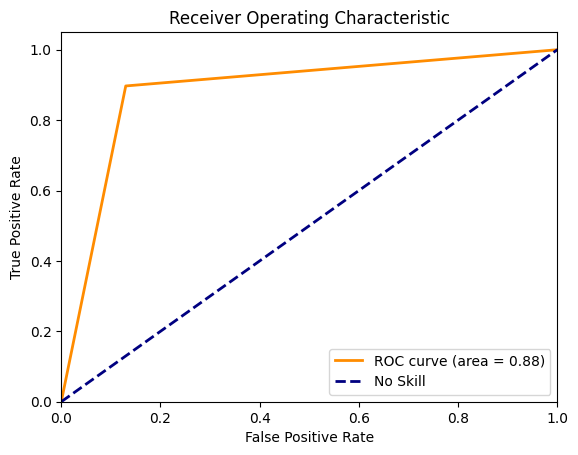

In [ ]:
# Plot ROC curve
plt.figure()

# Plot the ROC curve with a label displaying the ROC AUC score
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label='ROC curve (area = %0.2f)' % roc_auc)

# Plot a dashed diagonal line for reference
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='No Skill')

# Set the x and y-axis limits
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Label the x and y-axes
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Set the title of the plot
plt.title('Receiver Operating Characteristic')

# Add a legend to the plot
plt.legend(loc='lower right')

# Display the ROC curve plot
plt.show()

In [ ]:
# PRC Curve and AUC
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
prc_auc = average_precision_score(y_test, y_pred)
print("PRC AUC:", prc_auc)

PRC AUC: 0.7811340752517223


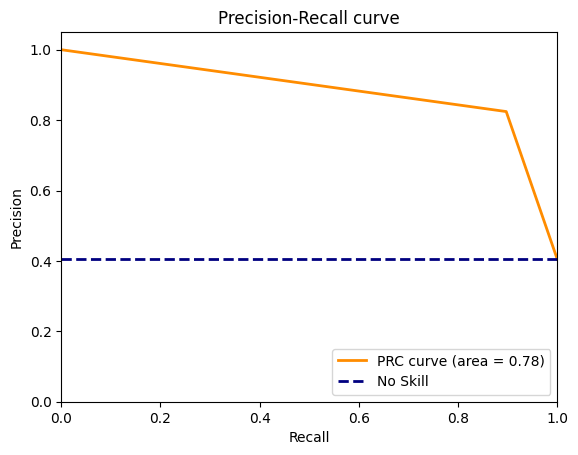

In [ ]:
# Plot PRC curve
plt.figure()

# Plot the PRC curve with a label displaying the PRC AUC score
plt.plot(recall, precision, color='darkorange', lw=2,
         label='PRC curve (area = %0.2f)' % prc_auc)

# Plot a dashed no-skill line for reference
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], color='navy', lw=2, linestyle='--', label='No Skill')

# Set the x and y-axis limits
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Label the x and y-axes
plt.xlabel('Recall')
plt.ylabel('Precision')

# Set the title of the plot
plt.title('Precision-Recall curve')

# Add a legend to the plot
plt.legend(loc='lower right')

# Display the ROC curve plot
plt.show()

##### Nested cross-validation

In [ ]:
# Evaluation from the nested cross validation (No data scaling)

# Declare the inner and outer cross-validation strategies
inner_cv = KFold(n_splits=5, shuffle=True, random_state=0)
outer_cv = KFold(n_splits=3, shuffle=True, random_state=0)

# Nested cross-validation
outer_acc, outer_params = [], []
round = 0

for train_index, test_index in outer_cv.split(X,y):
    round += 1

    # Split train and test datasets according to the outer_cv
    Xn_train = X.iloc[train_index,:]
    Xn_test = X.iloc[test_index,:]
    yn_train = y.iloc[train_index]
    yn_test = y.iloc[test_index]

    # Create an XGBoost classifier
    XGBclf = xgb.XGBClassifier()

    # Hyperparameter tuning
    hyperparams = {'n_estimators': randint(1,100),
                   'max_depth': randint(1,100),
                   'max_leaves':randint(0,100),
                   'learning_rate':uniform(0,1)
                  }

    # Use random search to find the best hyperparameters
    rand_search = RandomizedSearchCV(XGBclf,
                                     param_distributions = hyperparams,
                                     n_iter=100,
                                     cv=inner_cv,
                                     random_state=0
                                    )

    # Fit the random search object to the data
    rand_search.fit(Xn_train, yn_train)

    # Model prediction based on the best hyperparams
    best_XGBclf = rand_search.best_estimator_
    yn_pred = best_XGBclf.predict(Xn_test)

    # Accuracy score from the validation dataset
    acc = metrics.accuracy_score(yn_test, yn_pred)

    # Store the result
    outer_acc.append(acc)
    outer_params.append(rand_search.best_params_)

    # Report progress
    print(f'Round {round}: test_score= {acc:.3f}, validation_score= {rand_search.best_score_:.3f}')

# Summarize the estimated performance of the model
print(
    '\nThe mean score using nested cross-validation is: '
    f'{np.mean(outer_acc):.3f} ± {np.std(outer_acc):.3f}'
)

Round 1: test_score= 0.861, validation_score= 0.875
Round 2: test_score= 0.857, validation_score= 0.864
Round 3: test_score= 0.846, validation_score= 0.868

The mean score using nested cross-validation is: 0.855 ± 0.006


##### Effect of data standardization on the model performance

In [ ]:
# Evaluation from the nested cross validation (standardize only Age_at_diagnosis feature)

# Declare the inner and outer cross-validation strategies
inner_cv = KFold(n_splits=5, shuffle=True, random_state=0)
outer_cv = KFold(n_splits=3, shuffle=True, random_state=0)

# Nested cross-validation
outer_acc, outer_params = [], []
round = 0

for train_index, test_index in outer_cv.split(X,y):
    round += 1

    # Split train and test datasets according to the outer_cv
    Xn_train = X.iloc[train_index,:]
    Xn_test = X.iloc[test_index,:]
    yn_train = y.iloc[train_index]
    yn_test = y.iloc[test_index]

    # Data standardization (Age_at_diagnosis feature)
    sc = StandardScaler()
    Age_train_stdn = sc.fit_transform(np.array(Xn_train.Age_at_diagnosis).reshape(-1, 1))
    Age_test_stdn = sc.transform(np.array(Xn_test.Age_at_diagnosis).reshape(-1, 1))
    Xn_train_std, Xn_test_std = Xn_train.copy(), Xn_test.copy()
    Xn_train_std.Age_at_diagnosis = Age_train_stdn
    Xn_test_std.Age_at_diagnosis = Age_test_stdn

    # Create an XGBoost classifier
    XGBclf = xgb.XGBClassifier()

    # Hyperparameter tuning
    hyperparams = {'n_estimators': randint(1,100),
                   'max_depth': randint(1,100),
                   'max_leaves':randint(0,100),
                   'learning_rate':uniform(0,1)
                  }

    # Use random search to find the best hyperparameters
    rand_search = RandomizedSearchCV(XGBclf,
                                     param_distributions = hyperparams,
                                     n_iter=100,
                                     cv=inner_cv,
                                     random_state=0
                                    )

    # Fit the random search object to the data
    rand_search.fit(Xn_train_std, yn_train)

    # Model prediction based on the best hyperparams
    best_XGBclf = rand_search.best_estimator_
    yn_pred = best_XGBclf.predict(Xn_test_std)

    # Accuracy score from the validation dataset
    acc = metrics.accuracy_score(yn_test, yn_pred)

    # Store the result
    outer_acc.append(acc)
    outer_params.append(rand_search.best_params_)

    # Report progress
    print(f'Round {round}: test_score= {acc:.3f}, validation_score= {rand_search.best_score_:.3f}')

# Summarize the estimated performance of the model
print(
    '\nThe mean score using nested cross-validation is: '
    f'{np.mean(outer_acc):.3f} ± {np.std(outer_acc):.3f}'
)

Round 1: test_score= 0.861, validation_score= 0.875
Round 2: test_score= 0.857, validation_score= 0.864
Round 3: test_score= 0.846, validation_score= 0.868

The mean score using nested cross-validation is: 0.855 ± 0.006


In [ ]:
# Evaluation from the nested cross validation (standardize all features)

# Declare the inner and outer cross-validation strategies
inner_cv = KFold(n_splits=5, shuffle=True, random_state=0)
outer_cv = KFold(n_splits=3, shuffle=True, random_state=0)

# Nested cross-validation
outer_acc, outer_params = [], []
round = 0

for train_index, test_index in outer_cv.split(X,y):
    round += 1

    # Split train and test datasets according to the outer_cv
    Xn_train = X.iloc[train_index,:]
    Xn_test = X.iloc[test_index,:]
    yn_train = y.iloc[train_index]
    yn_test = y.iloc[test_index]

    # Data standardization (all features)
    Xn_train = pd.DataFrame(sc.fit_transform(Xn_train), columns=Xn_train.columns)
    Xn_test = pd.DataFrame(sc.transform(Xn_test), columns=Xn_train.columns)

    # Create an XGBoost classifier
    XGBclf = xgb.XGBClassifier()

    # Hyperparameter tuning
    hyperparams = {'n_estimators': randint(1,100),
                   'max_depth': randint(1,100),
                   'max_leaves':randint(0,100),
                   'learning_rate':uniform(0,1)
                  }

    # Use random search to find the best hyperparameters
    rand_search = RandomizedSearchCV(XGBclf,
                                     param_distributions = hyperparams,
                                     n_iter=100,
                                     cv=inner_cv,
                                     random_state=0
                                    )

    # Fit the random search object to the data
    rand_search.fit(Xn_train, yn_train)

    # Model prediction based on the best hyperparams
    best_XGBclf = rand_search.best_estimator_
    yn_pred = best_XGBclf.predict(Xn_test)

    # Accuracy score from the validation dataset
    acc = metrics.accuracy_score(yn_test, yn_pred)

    # Store the result
    outer_acc.append(acc)
    outer_params.append(rand_search.best_params_)

    # Report progress
    print(f'Round {round}: test_score= {acc:.3f}, validation_score= {rand_search.best_score_:.3f}')

# Summarize the estimated performance of the model
print(
    '\nThe mean score using nested cross-validation is: '
    f'{np.mean(outer_acc):.3f} ± {np.std(outer_acc):.3f}'
)

Round 1: test_score= 0.861, validation_score= 0.875
Round 2: test_score= 0.857, validation_score= 0.864
Round 3: test_score= 0.846, validation_score= 0.868

The mean score using nested cross-validation is: 0.855 ± 0.006


##### Effect of PCA on the performance

In [ ]:
# Evaluation from the nested cross validation (PCA)

# Declare the inner and outer cross-validation strategies
inner_cv = KFold(n_splits=5, shuffle=True, random_state=0)
outer_cv = KFold(n_splits=3, shuffle=True, random_state=0)

# Nested cross-validation
outer_acc, outer_params = [], []
round = 0

for train_index, test_index in outer_cv.split(X,y):
    round += 1

    # Split train and test datasets according to the outer_cv
    Xn_train = X.iloc[train_index,:]
    Xn_test = X.iloc[test_index,:]
    yn_train = y.iloc[train_index]
    yn_test = y.iloc[test_index]

    # Data standardization (all features)
    Xn_train = pd.DataFrame(sc.fit_transform(Xn_train), columns=Xn_train.columns)
    Xn_test = pd.DataFrame(sc.transform(Xn_test), columns=Xn_train.columns)

    # PCA
    pca = PCA(n_components=20)
    train_pcan = pca.fit_transform(Xn_train)
    test_pcan = pca.transform(Xn_test)
    columns = ['pca_comp_%i' % i for i in range(1,21)]
    Xn_train_pca = pd.DataFrame(train_pcan, columns=columns, index=Xn_train.index)
    Xn_test_pca = pd.DataFrame(test_pcan, columns=columns, index=Xn_test.index)

    # Create an XGBoost classifier
    XGBclf = xgb.XGBClassifier()

    # Hyperparameter tuning
    hyperparams = {'n_estimators': randint(1,100),
                   'max_depth': randint(1,100),
                   'max_leaves':randint(0,100),
                   'learning_rate':uniform(0,1)
                  }

    # Use random search to find the best hyperparameters
    rand_search = RandomizedSearchCV(XGBclf,
                                     param_distributions = hyperparams,
                                     n_iter=100,
                                     cv=inner_cv,
                                     random_state=0
                                    )

    # Fit the random search object to the data
    rand_search.fit(Xn_train_pca, yn_train)

    # Model prediction based on the best hyperparams
    best_XGBclf = rand_search.best_estimator_
    yn_pred = best_XGBclf.predict(Xn_test_pca)

    # Accuracy score from the validation dataset
    acc = metrics.accuracy_score(yn_test, yn_pred)

    # Store the result
    outer_acc.append(acc)
    outer_params.append(rand_search.best_params_)

    # Report progress
    print(f'Round {round}: test_score= {acc:.3f}, validation_score= {rand_search.best_score_:.3f}')

# Summarize the estimated performance of the model
print(
    '\nThe mean score using nested cross-validation is: '
    f'{np.mean(outer_acc):.3f} ± {np.std(outer_acc):.3f}'
)

Round 1: test_score= 0.843, validation_score= 0.860
Round 2: test_score= 0.818, validation_score= 0.864
Round 3: test_score= 0.860, validation_score= 0.852

The mean score using nested cross-validation is: 0.840 ± 0.017


##### Effect of the feature engineering on the performance

In [ ]:
# Evaluation from the nested cross validation (featuer engineering)

# Declare the inner and outer cross-validation strategies
inner_cv = KFold(n_splits=5, shuffle=True, random_state=0)
outer_cv = KFold(n_splits=3, shuffle=True, random_state=0)

# Nested cross-validation
outer_acc, outer_params = [], []
round = 0

for train_index, test_index in outer_cv.split(X,y):
    round += 1

    # Split train and test datasets according to the outer_cv
    Xn_train = X.iloc[train_index,:]
    Xn_test = X.iloc[test_index,:]
    yn_train = y.iloc[train_index]
    yn_test = y.iloc[test_index]

    # Data standardization (all features)
    Xn_train = pd.DataFrame(sc.fit_transform(Xn_train), columns=Xn_train.columns)
    Xn_test = pd.DataFrame(sc.transform(Xn_test), columns=Xn_train.columns)

    # PCA
    pca = PCA(n_components=20)
    train_pcan = pca.fit_transform(Xn_train)
    test_pcan = pca.transform(Xn_test)
    columns = ['pca_comp_%i' % i for i in range(1,21)]
    Xn_train_pca = pd.DataFrame(train_pcan, columns=columns, index=Xn_train.index)
    Xn_test_pca = pd.DataFrame(test_pcan, columns=columns, index=Xn_test.index)

    # Feature engineering
    Xn_train_eng = pd.concat([Xn_train, Xn_train_pca], axis=1)
    Xn_test_eng = pd.concat([Xn_test, Xn_test_pca], axis=1)

    # Create an XGBoost classifier
    XGBclf = xgb.XGBClassifier()

    # Hyperparameter tuning
    hyperparams = {'n_estimators': randint(1,100),
                   'max_depth': randint(1,100),
                   'max_leaves':randint(0,100),
                   'learning_rate':uniform(0,1)
                  }

    # Use random search to find the best hyperparameters
    rand_search = RandomizedSearchCV(XGBclf,
                                     param_distributions = hyperparams,
                                     n_iter=100,
                                     cv=inner_cv,
                                     random_state=0
                                    )

    # Fit the random search object to the data
    rand_search.fit(Xn_train_eng, yn_train)

    # Model prediction based on the best hyperparams
    best_XGBclf = rand_search.best_estimator_
    yn_pred = best_XGBclf.predict(Xn_test_eng)

    # Accuracy score from the validation dataset
    acc = metrics.accuracy_score(yn_test, yn_pred)

    # Store the result
    outer_acc.append(acc)
    outer_params.append(rand_search.best_params_)

    # Report progress
    print(f'Round {round}: test_score= {acc:.3f}, validation_score= {rand_search.best_score_:.3f}')

# Summarize the estimated performance of the model
print(
    '\nThe mean score using nested cross-validation is: '
    f'{np.mean(outer_acc):.3f} ± {np.std(outer_acc):.3f}'
)

Round 1: test_score= 0.829, validation_score= 0.868
Round 2: test_score= 0.811, validation_score= 0.864
Round 3: test_score= 0.871, validation_score= 0.861

The mean score using nested cross-validation is: 0.837 ± 0.025


### 4.4 Support Vector Machine (SVM)

#### Linear SVM

##### General model learning and evaluation

In [ ]:
# Close warning messages from the SVM running
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

In [ ]:
from sklearn import svm
# Hyperparameter tuning
hyperparams = {
              'C': uniform(1,300)
              }

# Create a linear SVM classifier
linSVC = svm.SVC(kernel='linear', max_iter=10000)

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(linSVC,
                                 param_distributions = hyperparams,
                                 n_iter=50,
                                 cv=5,
                                 random_state=0
                                )

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(kernel='linear', max_iter=10000),
                   n_iter=50,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7ef925883190>},
                   random_state=0)

In [ ]:
# The average score of the 5-fold cross validation from the best result
print('Average accuracy score (across experiments):')
print(rand_search.best_score_)

Average accuracy score (across experiments):
0.8644112769485904


In [ ]:
# Create a variable for the best model
best_linSVC = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'C': 7.065519232097715}


In [ ]:
# Accuracy score from the validation dataset
y_pred = best_linSVC.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8869047619047619


In [ ]:
# Print classfication evaluation scores
print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.945     0.860     0.901       100
           1      0.818     0.926     0.869        68

    accuracy                          0.887       168
   macro avg      0.882     0.893     0.885       168
weighted avg      0.894     0.887     0.888       168



In [ ]:
# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print("ROC AUC:", roc_auc)

ROC AUC: 0.893235294117647


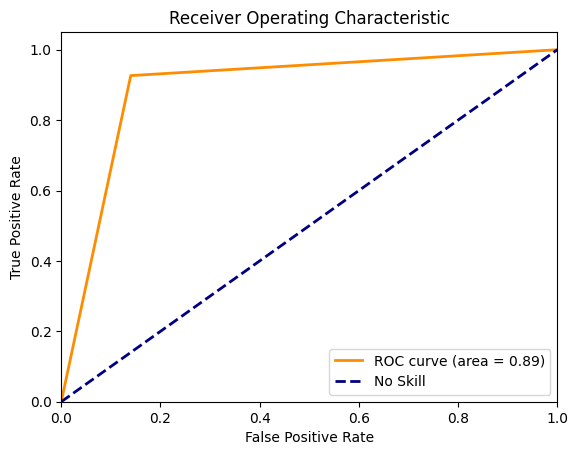

In [ ]:
# Plot ROC curve
plt.figure()

# Plot the ROC curve with a label displaying the ROC AUC score
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label='ROC curve (area = %0.2f)' % roc_auc)

# Plot a dashed diagonal line for reference
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='No Skill')

# Set the x and y-axis limits
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Label the x and y-axes
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Set the title of the plot
plt.title('Receiver Operating Characteristic')

# Add a legend to the plot
plt.legend(loc='lower right')

# Display the ROC curve plot
plt.show()

In [ ]:
# PRC Curve and AUC
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
prc_auc = average_precision_score(y_test, y_pred)
print("PRC AUC:", prc_auc)

PRC AUC: 0.7877832951362364


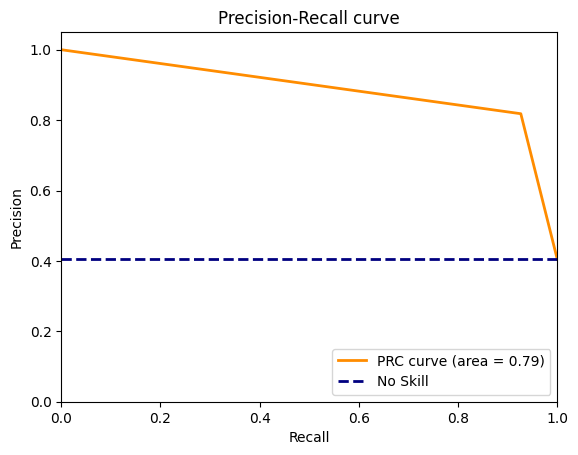

In [ ]:
# Plot PRC curve
plt.figure()

# Plot the PRC curve with a label displaying the PRC AUC score
plt.plot(recall, precision, color='darkorange', lw=2,
         label='PRC curve (area = %0.2f)' % prc_auc)

# Plot a dashed no-skill line for reference
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], color='navy', lw=2, linestyle='--', label='No Skill')

# Set the x and y-axis limits
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Label the x and y-axes
plt.xlabel('Recall')
plt.ylabel('Precision')

# Set the title of the plot
plt.title('Precision-Recall curve')

# Add a legend to the plot
plt.legend(loc='lower right')

# Display the ROC curve plot
plt.show()

##### Nested cross-validation

In [ ]:
# Evaluation from the nested cross validation (No data scaling)

# Declare the inner and outer cross-validation strategies
inner_cv = KFold(n_splits=5, shuffle=True, random_state=0)
outer_cv = KFold(n_splits=3, shuffle=True, random_state=0)

# Nested cross-validation
outer_acc, outer_params = [], []
round = 0

for train_index, test_index in outer_cv.split(X,y):
    round += 1

    # Split train and test datasets according to the outer_cv
    Xn_train = X.iloc[train_index,:]
    Xn_test = X.iloc[test_index,:]
    yn_train = y.iloc[train_index]
    yn_test = y.iloc[test_index]

    # Create a linear SVM classifier
    linSVC = svm.SVC(kernel='linear', max_iter=10000)

    # Hyperparameter tuning
    hyperparams = {
                  'C': uniform(1,300)
                  }

    # Use random search to find the best hyperparameters
    rand_search = RandomizedSearchCV(linSVC,
                                     param_distributions = hyperparams,
                                     n_iter=50,
                                     cv=inner_cv,
                                     random_state=0
                                    )

    # Fit the random search object to the data
    rand_search.fit(Xn_train, yn_train)

    # Model prediction based on the best hyperparams
    best_linSVC = rand_search.best_estimator_
    yn_pred = best_linSVC.predict(Xn_test)

    # Accuracy score from the validation dataset
    acc = metrics.accuracy_score(yn_test, yn_pred)

    # Store the result
    outer_acc.append(acc)
    outer_params.append(rand_search.best_params_)

    # Report progress
    print(f'Round {round}: test_score= {acc:.3f}, validation_score= {rand_search.best_score_:.3f}')

# Summarize the estimated performance of the model
print(
    '\nThe mean score using nested cross-validation is: '
    f'{np.mean(outer_acc):.3f} ± {np.std(outer_acc):.3f}'
)

Round 1: test_score= 0.861, validation_score= 0.877
Round 2: test_score= 0.871, validation_score= 0.871
Round 3: test_score= 0.875, validation_score= 0.868

The mean score using nested cross-validation is: 0.869 ± 0.006


##### Effect of data standardization on the model performance

In [ ]:
# Evaluation from the nested cross validation (standardize only Age_at_diagnosis feature)

# Declare the inner and outer cross-validation strategies
inner_cv = KFold(n_splits=5, shuffle=True, random_state=0)
outer_cv = KFold(n_splits=3, shuffle=True, random_state=0)

# Nested cross-validation
outer_acc, outer_params = [], []
round = 0

for train_index, test_index in outer_cv.split(X,y):
    round += 1

    # Split train and test datasets according to the outer_cv
    Xn_train = X.iloc[train_index,:]
    Xn_test = X.iloc[test_index,:]
    yn_train = y.iloc[train_index]
    yn_test = y.iloc[test_index]

    # Data standardization (Age_at_diagnosis feature)
    sc = StandardScaler()
    Age_train_stdn = sc.fit_transform(np.array(Xn_train.Age_at_diagnosis).reshape(-1, 1))
    Age_test_stdn = sc.transform(np.array(Xn_test.Age_at_diagnosis).reshape(-1, 1))
    Xn_train_std, Xn_test_std = Xn_train.copy(), Xn_test.copy()
    Xn_train_std.Age_at_diagnosis = Age_train_stdn
    Xn_test_std.Age_at_diagnosis = Age_test_stdn

    # Create a linear SVM classifier
    linSVC = svm.SVC(kernel='linear', max_iter=10000)

    # Hyperparameter tuning
    hyperparams = {
                  'C': uniform(1,300)
                  }

    # Use random search to find the best hyperparameters
    rand_search = RandomizedSearchCV(linSVC,
                                     param_distributions = hyperparams,
                                     n_iter=50,
                                     cv=inner_cv,
                                     random_state=0
                                    )

    # Fit the random search object to the data
    rand_search.fit(Xn_train_std, yn_train)

    # Model prediction based on the best hyperparams
    best_linSVC = rand_search.best_estimator_
    yn_pred = best_linSVC.predict(Xn_test_std)

    # Accuracy score from the validation dataset
    acc = metrics.accuracy_score(yn_test, yn_pred)

    # Store the result
    outer_acc.append(acc)
    outer_params.append(rand_search.best_params_)

    # Report progress
    print(f'Round {round}: test_score= {acc:.3f}, validation_score= {rand_search.best_score_:.3f}')

# Summarize the estimated performance of the model
print(
    '\nThe mean score using nested cross-validation is: '
    f'{np.mean(outer_acc):.3f} ± {np.std(outer_acc):.3f}'
)

Round 1: test_score= 0.861, validation_score= 0.877
Round 2: test_score= 0.871, validation_score= 0.877
Round 3: test_score= 0.875, validation_score= 0.868

The mean score using nested cross-validation is: 0.869 ± 0.006


In [ ]:
# Evaluation from the nested cross validation (standardize all features)

# Declare the inner and outer cross-validation strategies
inner_cv = KFold(n_splits=5, shuffle=True, random_state=0)
outer_cv = KFold(n_splits=3, shuffle=True, random_state=0)

# Nested cross-validation
outer_acc, outer_params = [], []
round = 0

for train_index, test_index in outer_cv.split(X,y):
    round += 1

    # Split train and test datasets according to the outer_cv
    Xn_train = X.iloc[train_index,:]
    Xn_test = X.iloc[test_index,:]
    yn_train = y.iloc[train_index]
    yn_test = y.iloc[test_index]

    # Data standardization (all features)
    Xn_train = pd.DataFrame(sc.fit_transform(Xn_train), columns=Xn_train.columns)
    Xn_test = pd.DataFrame(sc.transform(Xn_test), columns=Xn_train.columns)

    # Create a linear SVM classifier
    linSVC = svm.SVC(kernel='linear', max_iter=10000)

    # Hyperparameter tuning
    hyperparams = {
              'C': uniform(1,300)
              }

    # Use random search to find the best hyperparameters
    rand_search = RandomizedSearchCV(linSVC,
                                     param_distributions = hyperparams,
                                     n_iter=50,
                                     cv=inner_cv,
                                     random_state=0
                                    )

    # Fit the random search object to the data
    rand_search.fit(Xn_train, yn_train)

    # Model prediction based on the best hyperparams
    best_linSVC = rand_search.best_estimator_
    yn_pred = best_linSVC.predict(Xn_test)

    # Accuracy score from the validation dataset
    acc = metrics.accuracy_score(yn_test, yn_pred)

    # Store the result
    outer_acc.append(acc)
    outer_params.append(rand_search.best_params_)

    # Report progress
    print(f'Round {round}: test_score= {acc:.3f}, validation_score= {rand_search.best_score_:.3f}')

# Summarize the estimated performance of the model
print(
    '\nThe mean score using nested cross-validation is: '
    f'{np.mean(outer_acc):.3f} ± {np.std(outer_acc):.3f}'
)

Round 1: test_score= 0.861, validation_score= 0.877
Round 2: test_score= 0.871, validation_score= 0.873
Round 3: test_score= 0.875, validation_score= 0.866

The mean score using nested cross-validation is: 0.869 ± 0.006


##### Effect of PCA on the performance

In [ ]:
# Evaluation from the nested cross validation (PCA)

# Declare the inner and outer cross-validation strategies
inner_cv = KFold(n_splits=5, shuffle=True, random_state=0)
outer_cv = KFold(n_splits=3, shuffle=True, random_state=0)

# Nested cross-validation
outer_acc, outer_params = [], []
round = 0

for train_index, test_index in outer_cv.split(X,y):
    round += 1

    # Split train and test datasets according to the outer_cv
    Xn_train = X.iloc[train_index,:]
    Xn_test = X.iloc[test_index,:]
    yn_train = y.iloc[train_index]
    yn_test = y.iloc[test_index]

    # Data standardization (all features)
    Xn_train = pd.DataFrame(sc.fit_transform(Xn_train), columns=Xn_train.columns)
    Xn_test = pd.DataFrame(sc.transform(Xn_test), columns=Xn_train.columns)

    # PCA
    pca = PCA(n_components=20)
    train_pcan = pca.fit_transform(Xn_train)
    test_pcan = pca.transform(Xn_test)
    columns = ['pca_comp_%i' % i for i in range(1,21)]
    Xn_train_pca = pd.DataFrame(train_pcan, columns=columns, index=Xn_train.index)
    Xn_test_pca = pd.DataFrame(test_pcan, columns=columns, index=Xn_test.index)

    # Create a linear SVM classifier
    linSVC = svm.SVC(kernel='linear', max_iter=10000)

    # Hyperparameter tuning
    hyperparams = {
                  'C': uniform(1,300)
                  }

    # Use random search to find the best hyperparameters
    rand_search = RandomizedSearchCV(linSVC,
                                     param_distributions = hyperparams,
                                     n_iter=50,
                                     cv=inner_cv,
                                     random_state=0
                                    )

    # Fit the random search object to the data
    rand_search.fit(Xn_train_pca, yn_train)

    # Model prediction based on the best hyperparams
    best_linSVC = rand_search.best_estimator_
    yn_pred = best_linSVC.predict(Xn_test_pca)

    # Accuracy score from the validation dataset
    acc = metrics.accuracy_score(yn_test, yn_pred)

    # Store the result
    outer_acc.append(acc)
    outer_params.append(rand_search.best_params_)

    # Report progress
    print(f'Round {round}: test_score= {acc:.3f}, validation_score= {rand_search.best_score_:.3f}')

# Summarize the estimated performance of the model
print(
    '\nThe mean score using nested cross-validation is: '
    f'{np.mean(outer_acc):.3f} ± {np.std(outer_acc):.3f}'
)

Round 1: test_score= 0.850, validation_score= 0.871
Round 2: test_score= 0.868, validation_score= 0.868
Round 3: test_score= 0.878, validation_score= 0.863

The mean score using nested cross-validation is: 0.865 ± 0.012


##### Effect of the feature engineering on the performance

In [ ]:
# Evaluation from the nested cross validation (featuer engineering)

# Declare the inner and outer cross-validation strategies
inner_cv = KFold(n_splits=5, shuffle=True, random_state=0)
outer_cv = KFold(n_splits=3, shuffle=True, random_state=0)

# Nested cross-validation
outer_acc, outer_params = [], []
round = 0

for train_index, test_index in outer_cv.split(X,y):
    round += 1

    # Split train and test datasets according to the outer_cv
    Xn_train = X.iloc[train_index,:]
    Xn_test = X.iloc[test_index,:]
    yn_train = y.iloc[train_index]
    yn_test = y.iloc[test_index]

    # Data standardization (all features)
    Xn_train = pd.DataFrame(sc.fit_transform(Xn_train), columns=Xn_train.columns)
    Xn_test = pd.DataFrame(sc.transform(Xn_test), columns=Xn_train.columns)

    # PCA
    pca = PCA(n_components=20)
    train_pcan = pca.fit_transform(Xn_train)
    test_pcan = pca.transform(Xn_test)
    columns = ['pca_comp_%i' % i for i in range(1,21)]
    Xn_train_pca = pd.DataFrame(train_pcan, columns=columns, index=Xn_train.index)
    Xn_test_pca = pd.DataFrame(test_pcan, columns=columns, index=Xn_test.index)

    # Feature engineering
    Xn_train_eng = pd.concat([Xn_train, Xn_train_pca], axis=1)
    Xn_test_eng = pd.concat([Xn_test, Xn_test_pca], axis=1)

    # Create a linear SVM classifier
    linSVC = svm.SVC(kernel='linear', max_iter=10000)

    # Hyperparameter tuning
    hyperparams = {
                  'C': uniform(1,300)
                  }

    # Use random search to find the best hyperparameters
    rand_search = RandomizedSearchCV(linSVC,
                                     param_distributions = hyperparams,
                                     n_iter=50,
                                     cv=inner_cv,
                                     random_state=0
                                    )

    # Fit the random search object to the data
    rand_search.fit(Xn_train_eng, yn_train)

    # Model prediction based on the best hyperparams
    best_linSVC = rand_search.best_estimator_
    yn_pred = best_linSVC.predict(Xn_test_eng)

    # Accuracy score from the validation dataset
    acc = metrics.accuracy_score(yn_test, yn_pred)

    # Store the result
    outer_acc.append(acc)
    outer_params.append(rand_search.best_params_)

    # Report progress
    print(f'Round {round}: test_score= {acc:.3f}, validation_score= {rand_search.best_score_:.3f}')

# Summarize the estimated performance of the model
print(
    '\nThe mean score using nested cross-validation is: '
    f'{np.mean(outer_acc):.3f} ± {np.std(outer_acc):.3f}'
)

Round 1: test_score= 0.861, validation_score= 0.877
Round 2: test_score= 0.871, validation_score= 0.873
Round 3: test_score= 0.875, validation_score= 0.866

The mean score using nested cross-validation is: 0.869 ± 0.006


#### Kernel SVM

##### General model learning and evaluation

In [ ]:
# Hyperparameter tuning
hyperparams = {
              'C': uniform(1,300),
              'gamma': uniform(0,10),
              'degree': randint(2,5)
              }

# Create a kernel SVM classifier
krnlSVC = svm.SVC(kernel='rbf', max_iter=10000)

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(krnlSVC,
                                 param_distributions = hyperparams,
                                 n_iter=100,
                                 cv=5,
                                 random_state=0
                                )

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(max_iter=10000), n_iter=100,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7ef925caa320>,
                                        'degree': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ef925deda20>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7ef925b627d0>},
                   random_state=0)

In [ ]:
# The average score of the 5-fold cross validation from the best result
print('Average accuracy score (across experiments):')
print(rand_search.best_score_)

Average accuracy score (across experiments):
0.7735102266445549


In [ ]:
# Create a variable for the best model
best_krnlSVC = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'C': 225.7763251189719, 'degree': 2, 'gamma': 0.4561463715088643}


In [ ]:
# Accuracy score from the validation dataset
y_pred = best_krnlSVC.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7976190476190477


In [ ]:
# Print classfication evaluation scores
print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.824     0.840     0.832       100
           1      0.758     0.735     0.746        68

    accuracy                          0.798       168
   macro avg      0.791     0.788     0.789       168
weighted avg      0.797     0.798     0.797       168



In [ ]:
# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print("ROC AUC:", roc_auc)

ROC AUC: 0.7876470588235294


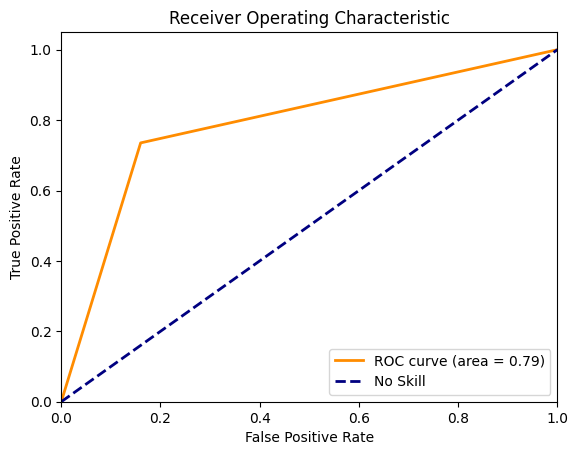

In [ ]:
# Plot ROC curve
plt.figure()

# Plot the ROC curve with a label displaying the ROC AUC score
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label='ROC curve (area = %0.2f)' % roc_auc)

# Plot a dashed diagonal line for reference
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='No Skill')

# Set the x and y-axis limits
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Label the x and y-axes
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Set the title of the plot
plt.title('Receiver Operating Characteristic')

# Add a legend to the plot
plt.legend(loc='lower right')

# Display the ROC curve plot
plt.show()

In [ ]:
# PRC Curve and AUC
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
prc_auc = average_precision_score(y_test, y_pred)
print("PRC AUC:", prc_auc)

PRC AUC: 0.664183855360326


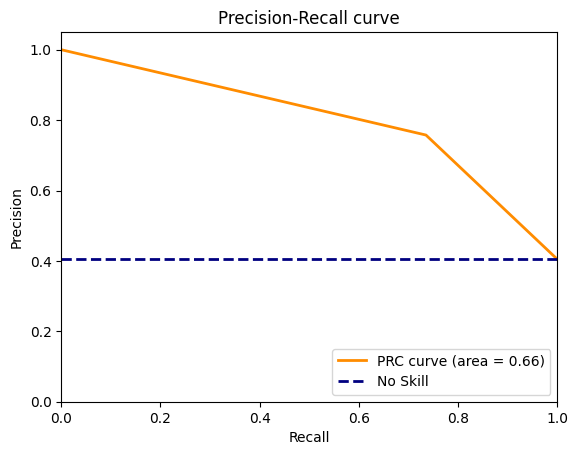

In [ ]:
# Plot PRC curve
plt.figure()

# Plot the PRC curve with a label displaying the PRC AUC score
plt.plot(recall, precision, color='darkorange', lw=2,
         label='PRC curve (area = %0.2f)' % prc_auc)

# Plot a dashed no-skill line for reference
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], color='navy', lw=2, linestyle='--', label='No Skill')

# Set the x and y-axis limits
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Label the x and y-axes
plt.xlabel('Recall')
plt.ylabel('Precision')

# Set the title of the plot
plt.title('Precision-Recall curve')

# Add a legend to the plot
plt.legend(loc='lower right')

# Display the ROC curve plot
plt.show()

##### Nested cross-validation

In [ ]:
# Evaluation from the nested cross validation (No data scaling)

# Declare the inner and outer cross-validation strategies
inner_cv = KFold(n_splits=5, shuffle=True, random_state=0)
outer_cv = KFold(n_splits=3, shuffle=True, random_state=0)

# Nested cross-validation
outer_acc, outer_params = [], []
round = 0

for train_index, test_index in outer_cv.split(X,y):
    round += 1

    # Split train and test datasets according to the outer_cv
    Xn_train = X.iloc[train_index,:]
    Xn_test = X.iloc[test_index,:]
    yn_train = y.iloc[train_index]
    yn_test = y.iloc[test_index]

    # Create a kernel SVM classifier
    krnlSVC = svm.SVC(kernel='rbf', max_iter=10000)

    # Hyperparameter tuning
    hyperparams = {
                  'C': uniform(1,300),
                  'gamma': uniform(0,10),
                  'degree': randint(2,5)
                  }

    # Use random search to find the best hyperparameters
    rand_search = RandomizedSearchCV(krnlSVC,
                                     param_distributions = hyperparams,
                                     n_iter=100,
                                     cv=inner_cv,
                                     random_state=0
                                    )

    # Fit the random search object to the data
    rand_search.fit(Xn_train, yn_train)

    # Model prediction based on the best hyperparams
    best_krnlSVC = rand_search.best_estimator_
    yn_pred = best_krnlSVC.predict(Xn_test)

    # Accuracy score from the validation dataset
    acc = metrics.accuracy_score(yn_test, yn_pred)

    # Store the result
    outer_acc.append(acc)
    outer_params.append(rand_search.best_params_)

    # Report progress
    print(f'Round {round}: test_score= {acc:.3f}, validation_score= {rand_search.best_score_:.3f}')

# Summarize the estimated performance of the model
print(
    '\nThe mean score using nested cross-validation is: '
    f'{np.mean(outer_acc):.3f} ± {np.std(outer_acc):.3f}'
)

Round 1: test_score= 0.782, validation_score= 0.760
Round 2: test_score= 0.750, validation_score= 0.784
Round 3: test_score= 0.781, validation_score= 0.771

The mean score using nested cross-validation is: 0.771 ± 0.015


##### Effect of data standardization on the model performance

In [ ]:
# Evaluation from the nested cross validation (standardize only Age_at_diagnosis feature)

# Declare the inner and outer cross-validation strategies
inner_cv = KFold(n_splits=5, shuffle=True, random_state=0)
outer_cv = KFold(n_splits=3, shuffle=True, random_state=0)

# Nested cross-validation
outer_acc, outer_params = [], []
round = 0

for train_index, test_index in outer_cv.split(X,y):
    round += 1

    # Split train and test datasets according to the outer_cv
    Xn_train = X.iloc[train_index,:]
    Xn_test = X.iloc[test_index,:]
    yn_train = y.iloc[train_index]
    yn_test = y.iloc[test_index]

    # Data standardization (Age_at_diagnosis feature)
    sc = StandardScaler()
    Age_train_stdn = sc.fit_transform(np.array(Xn_train.Age_at_diagnosis).reshape(-1, 1))
    Age_test_stdn = sc.transform(np.array(Xn_test.Age_at_diagnosis).reshape(-1, 1))
    Xn_train_std, Xn_test_std = Xn_train.copy(), Xn_test.copy()
    Xn_train_std.Age_at_diagnosis = Age_train_stdn
    Xn_test_std.Age_at_diagnosis = Age_test_stdn

    # Create a kernel SVM classifier
    krnlSVC = svm.SVC(kernel='rbf', max_iter=10000)

    # Hyperparameter tuning
    hyperparams = {
                  'C': uniform(1,300),
                  'gamma': uniform(0,10),
                  'degree': randint(2,5)
                  }

    # Use random search to find the best hyperparameters
    rand_search = RandomizedSearchCV(krnlSVC,
                                     param_distributions = hyperparams,
                                     n_iter=100,
                                     cv=inner_cv,
                                     random_state=0
                                    )

    # Fit the random search object to the data
    rand_search.fit(Xn_train_std, yn_train)

    # Model prediction based on the best hyperparams
    best_krnlSVC = rand_search.best_estimator_
    yn_pred = best_krnlSVC.predict(Xn_test_std)

    # Accuracy score from the validation dataset
    acc = metrics.accuracy_score(yn_test, yn_pred)

    # Store the result
    outer_acc.append(acc)
    outer_params.append(rand_search.best_params_)

    # Report progress
    print(f'Round {round}: test_score= {acc:.3f}, validation_score= {rand_search.best_score_:.3f}')

# Summarize the estimated performance of the model
print(
    '\nThe mean score using nested cross-validation is: '
    f'{np.mean(outer_acc):.3f} ± {np.std(outer_acc):.3f}'
)

Round 1: test_score= 0.804, validation_score= 0.826
Round 2: test_score= 0.775, validation_score= 0.830
Round 3: test_score= 0.842, validation_score= 0.805

The mean score using nested cross-validation is: 0.807 ± 0.028


In [ ]:
# Evaluation from the nested cross validation (standardize all features)

# Declare the inner and outer cross-validation strategies
inner_cv = KFold(n_splits=5, shuffle=True, random_state=0)
outer_cv = KFold(n_splits=3, shuffle=True, random_state=0)

# Nested cross-validation
outer_acc, outer_params = [], []
round = 0

for train_index, test_index in outer_cv.split(X,y):
    round += 1

    # Split train and test datasets according to the outer_cv
    Xn_train = X.iloc[train_index,:]
    Xn_test = X.iloc[test_index,:]
    yn_train = y.iloc[train_index]
    yn_test = y.iloc[test_index]

    # Data standardization (all features)
    Xn_train = pd.DataFrame(sc.fit_transform(Xn_train), columns=Xn_train.columns)
    Xn_test = pd.DataFrame(sc.transform(Xn_test), columns=Xn_train.columns)

    # Create a kernel SVM classifier
    krnlSVC = svm.SVC(kernel='rbf', max_iter=10000)

    # Hyperparameter tuning
    hyperparams = {
                  'C': uniform(1,300),
                  'gamma': uniform(0,10),
                  'degree': randint(2,5)
                  }

    # Use random search to find the best hyperparameters
    rand_search = RandomizedSearchCV(krnlSVC,
                                     param_distributions = hyperparams,
                                     n_iter=100,
                                     cv=inner_cv,
                                     random_state=0
                                    )

    # Fit the random search object to the data
    rand_search.fit(Xn_train, yn_train)

    # Model prediction based on the best hyperparams
    best_krnlSVC = rand_search.best_estimator_
    yn_pred = best_krnlSVC.predict(Xn_test)

    # Accuracy score from the validation dataset
    acc = metrics.accuracy_score(yn_test, yn_pred)

    # Store the result
    outer_acc.append(acc)
    outer_params.append(rand_search.best_params_)

    # Report progress
    print(f'Round {round}: test_score= {acc:.3f}, validation_score= {rand_search.best_score_:.3f}')

# Summarize the estimated performance of the model
print(
    '\nThe mean score using nested cross-validation is: '
    f'{np.mean(outer_acc):.3f} ± {np.std(outer_acc):.3f}'
)

Round 1: test_score= 0.782, validation_score= 0.769
Round 2: test_score= 0.725, validation_score= 0.775
Round 3: test_score= 0.738, validation_score= 0.709

The mean score using nested cross-validation is: 0.748 ± 0.024


##### Effect of PCA on the performance

In [ ]:
# Evaluation from the nested cross validation (PCA)

# Declare the inner and outer cross-validation strategies
inner_cv = KFold(n_splits=5, shuffle=True, random_state=0)
outer_cv = KFold(n_splits=3, shuffle=True, random_state=0)

# Nested cross-validation
outer_acc, outer_params = [], []
round = 0

for train_index, test_index in outer_cv.split(X,y):
    round += 1

    # Split train and test datasets according to the outer_cv
    Xn_train = X.iloc[train_index,:]
    Xn_test = X.iloc[test_index,:]
    yn_train = y.iloc[train_index]
    yn_test = y.iloc[test_index]

    # Data standardization (all features)
    Xn_train = pd.DataFrame(sc.fit_transform(Xn_train), columns=Xn_train.columns)
    Xn_test = pd.DataFrame(sc.transform(Xn_test), columns=Xn_train.columns)

    # PCA
    pca = PCA(n_components=20)
    train_pcan = pca.fit_transform(Xn_train)
    test_pcan = pca.transform(Xn_test)
    columns = ['pca_comp_%i' % i for i in range(1,21)]
    Xn_train_pca = pd.DataFrame(train_pcan, columns=columns, index=Xn_train.index)
    Xn_test_pca = pd.DataFrame(test_pcan, columns=columns, index=Xn_test.index)

    # Create a kernel SVM classifier
    krnlSVC = svm.SVC(kernel='rbf', max_iter=10000)

    # Hyperparameter tuning
    hyperparams = {
                  'C': uniform(1,300),
                  'gamma': uniform(0,10),
                  'degree': randint(2,5)
                  }

    # Use random search to find the best hyperparameters
    rand_search = RandomizedSearchCV(krnlSVC,
                                     param_distributions = hyperparams,
                                     n_iter=100,
                                     cv=inner_cv,
                                     random_state=0
                                    )

    # Fit the random search object to the data
    rand_search.fit(Xn_train_pca, yn_train)

    # Model prediction based on the best hyperparams
    best_krnlSVC = rand_search.best_estimator_
    yn_pred = best_krnlSVC.predict(Xn_test_pca)

    # Accuracy score from the validation dataset
    acc = metrics.accuracy_score(yn_test, yn_pred)

    # Store the result
    outer_acc.append(acc)
    outer_params.append(rand_search.best_params_)

    # Report progress
    print(f'Round {round}: test_score= {acc:.3f}, validation_score= {rand_search.best_score_:.3f}')

# Summarize the estimated performance of the model
print(
    '\nThe mean score using nested cross-validation is: '
    f'{np.mean(outer_acc):.3f} ± {np.std(outer_acc):.3f}'
)

Round 1: test_score= 0.754, validation_score= 0.758
Round 2: test_score= 0.754, validation_score= 0.782
Round 3: test_score= 0.756, validation_score= 0.734

The mean score using nested cross-validation is: 0.754 ± 0.001


##### Effect of the feature engineering on the performance

In [ ]:
# Evaluation from the nested cross validation (featuer engineering)

# Declare the inner and outer cross-validation strategies
inner_cv = KFold(n_splits=5, shuffle=True, random_state=0)
outer_cv = KFold(n_splits=3, shuffle=True, random_state=0)

# Nested cross-validation
outer_acc, outer_params = [], []
round = 0

for train_index, test_index in outer_cv.split(X,y):
    round += 1

    # Split train and test datasets according to the outer_cv
    Xn_train = X.iloc[train_index,:]
    Xn_test = X.iloc[test_index,:]
    yn_train = y.iloc[train_index]
    yn_test = y.iloc[test_index]

    # Data standardization (all features)
    Xn_train = pd.DataFrame(sc.fit_transform(Xn_train), columns=Xn_train.columns)
    Xn_test = pd.DataFrame(sc.transform(Xn_test), columns=Xn_train.columns)

    # PCA
    pca = PCA(n_components=20)
    train_pcan = pca.fit_transform(Xn_train)
    test_pcan = pca.transform(Xn_test)
    columns = ['pca_comp_%i' % i for i in range(1,21)]
    Xn_train_pca = pd.DataFrame(train_pcan, columns=columns, index=Xn_train.index)
    Xn_test_pca = pd.DataFrame(test_pcan, columns=columns, index=Xn_test.index)

    # Feature engineering
    Xn_train_eng = pd.concat([Xn_train, Xn_train_pca], axis=1)
    Xn_test_eng = pd.concat([Xn_test, Xn_test_pca], axis=1)

    # Create a kernel SVM classifier
    krnlSVC = svm.SVC(kernel='rbf', max_iter=10000)

    # Hyperparameter tuning
    hyperparams = {
                  'C': uniform(1,300),
                  'gamma': uniform(0,10),
                  'degree': randint(2,5)
                  }

    # Use random search to find the best hyperparameters
    rand_search = RandomizedSearchCV(krnlSVC,
                                     param_distributions = hyperparams,
                                     n_iter=100,
                                     cv=inner_cv,
                                     random_state=0
                                    )

    # Fit the random search object to the data
    rand_search.fit(Xn_train_eng, yn_train)

    # Model prediction based on the best hyperparams
    best_krnlSVC = rand_search.best_estimator_
    yn_pred = best_krnlSVC.predict(Xn_test_eng)

    # Accuracy score from the validation dataset
    acc = metrics.accuracy_score(yn_test, yn_pred)

    # Store the result
    outer_acc.append(acc)
    outer_params.append(rand_search.best_params_)

    # Report progress
    print(f'Round {round}: test_score= {acc:.3f}, validation_score= {rand_search.best_score_:.3f}')

# Summarize the estimated performance of the model
print(
    '\nThe mean score using nested cross-validation is: '
    f'{np.mean(outer_acc):.3f} ± {np.std(outer_acc):.3f}'
)

Round 1: test_score= 0.768, validation_score= 0.733
Round 2: test_score= 0.682, validation_score= 0.753
Round 3: test_score= 0.710, validation_score= 0.695

The mean score using nested cross-validation is: 0.720 ± 0.036


### 4.5 Logistic Regression

#### General model learning and evaluation

In [ ]:
from sklearn.linear_model import LogisticRegression
# Hyperparameter tuning
hyperparams = {
              'C': uniform(0,10)
              }

# Create a logstic regression classifier
lr = LogisticRegression()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(lr,
                                 param_distributions = hyperparams,
                                 n_iter=100,
                                 cv=5,
                                 random_state=0
                                )

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7ef925e81240>},
                   random_state=0)

In [ ]:
# The average score of the 5-fold cross validation from the best result
print('Average accuracy score (across experiments):')
print(rand_search.best_score_)

Average accuracy score (across experiments):
0.8659038142620232


In [ ]:
# Create a variable for the best model
best_lr = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'C': 1.1827442586893322}


In [ ]:
# Accuracy score from the validation dataset
y_pred = best_lr.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8928571428571429


In [ ]:
# Print classfication evaluation scores
print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.946     0.870     0.906       100
           1      0.829     0.926     0.875        68

    accuracy                          0.893       168
   macro avg      0.887     0.898     0.891       168
weighted avg      0.898     0.893     0.894       168



In [ ]:
# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print("ROC AUC:", roc_auc)

ROC AUC: 0.898235294117647


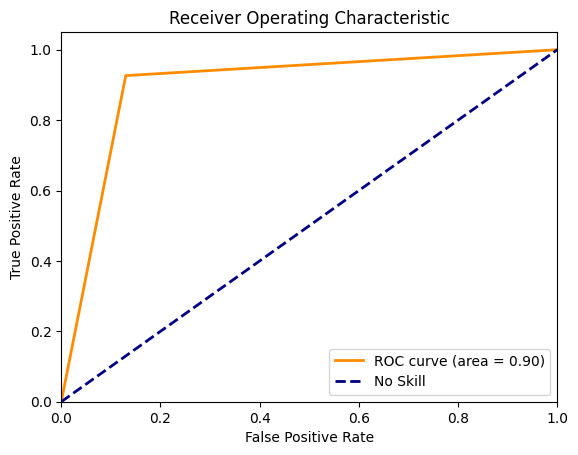

In [ ]:
# Plot ROC curve
plt.figure()

# Plot the ROC curve with a label displaying the ROC AUC score
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label='ROC curve (area = %0.2f)' % roc_auc)

# Plot a dashed diagonal line for reference
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='No Skill')

# Set the x and y-axis limits
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Label the x and y-axes
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Set the title of the plot
plt.title('Receiver Operating Characteristic')

# Add a legend to the plot
plt.legend(loc='lower right')

# Display the ROC curve plot
plt.show()

In [ ]:
# PRC Curve and AUC
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
prc_auc = average_precision_score(y_test, y_pred)
print("PRC AUC:", prc_auc)

PRC AUC: 0.7977572607990565


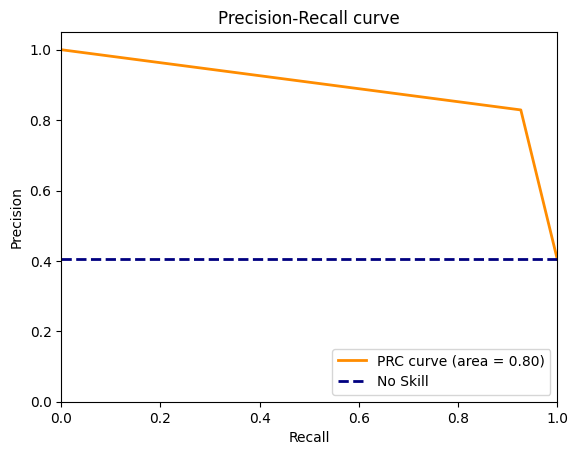

In [ ]:
# Plot PRC curve
plt.figure()

# Plot the PRC curve with a label displaying the PRC AUC score
plt.plot(recall, precision, color='darkorange', lw=2,
         label='PRC curve (area = %0.2f)' % prc_auc)

# Plot a dashed no-skill line for reference
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], color='navy', lw=2, linestyle='--', label='No Skill')

# Set the x and y-axis limits
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Label the x and y-axes
plt.xlabel('Recall')
plt.ylabel('Precision')

# Set the title of the plot
plt.title('Precision-Recall curve')

# Add a legend to the plot
plt.legend(loc='lower right')

# Display the ROC curve plot
plt.show()

#### Nested cross-validation

In [ ]:
# Evaluation from the nested cross validation (No data scaling)

# Declare the inner and outer cross-validation strategies
inner_cv = KFold(n_splits=5, shuffle=True, random_state=0)
outer_cv = KFold(n_splits=3, shuffle=True, random_state=0)

# Nested cross-validation
outer_acc, outer_params = [], []
round = 0

for train_index, test_index in outer_cv.split(X,y):
    round += 1

    # Split train and test datasets according to the outer_cv
    Xn_train = X.iloc[train_index,:]
    Xn_test = X.iloc[test_index,:]
    yn_train = y.iloc[train_index]
    yn_test = y.iloc[test_index]

    # Create a logstic regression classifier
    lr = LogisticRegression()

    # Hyperparameter tuning
    hyperparams = {
                  'C': uniform(0,10)
                  }

    # Use random search to find the best hyperparameters
    rand_search = RandomizedSearchCV(lr,
                                     param_distributions = hyperparams,
                                     n_iter=100,
                                     cv=inner_cv,
                                     random_state=0
                                    )

    # Fit the random search object to the data
    rand_search.fit(Xn_train, yn_train)

    # Model prediction based on the best hyperparams
    best_lr = rand_search.best_estimator_
    yn_pred = best_lr.predict(Xn_test)

    # Accuracy score from the validation dataset
    acc = metrics.accuracy_score(yn_test, yn_pred)

    # Store the result
    outer_acc.append(acc)
    outer_params.append(rand_search.best_params_)

    # Report progress
    print(f'Round {round}: test_score= {acc:.3f}, validation_score= {rand_search.best_score_:.3f}')

# Summarize the estimated performance of the model
print(
    '\nThe mean score using nested cross-validation is: '
    f'{np.mean(outer_acc):.3f} ± {np.std(outer_acc):.3f}'
)

Round 1: test_score= 0.864, validation_score= 0.882
Round 2: test_score= 0.829, validation_score= 0.873
Round 3: test_score= 0.871, validation_score= 0.868

The mean score using nested cross-validation is: 0.855 ± 0.019


#### Effect of data standardization on the model performance

In [ ]:
# Evaluation from the nested cross validation (standardize only Age_at_diagnosis feature)

# Declare the inner and outer cross-validation strategies
inner_cv = KFold(n_splits=5, shuffle=True, random_state=0)
outer_cv = KFold(n_splits=3, shuffle=True, random_state=0)

# Nested cross-validation
outer_acc, outer_params = [], []
round = 0

for train_index, test_index in outer_cv.split(X,y):
    round += 1

    # Split train and test datasets according to the outer_cv
    Xn_train = X.iloc[train_index,:]
    Xn_test = X.iloc[test_index,:]
    yn_train = y.iloc[train_index]
    yn_test = y.iloc[test_index]

    # Data standardization (Age_at_diagnosis feature)
    sc = StandardScaler()
    Age_train_stdn = sc.fit_transform(np.array(Xn_train.Age_at_diagnosis).reshape(-1, 1))
    Age_test_stdn = sc.transform(np.array(Xn_test.Age_at_diagnosis).reshape(-1, 1))
    Xn_train_std, Xn_test_std = Xn_train.copy(), Xn_test.copy()
    Xn_train_std.Age_at_diagnosis = Age_train_stdn
    Xn_test_std.Age_at_diagnosis = Age_test_stdn

    # Create a logstic regression classifier
    lr = LogisticRegression()

    # Hyperparameter tuning
    hyperparams = {
                  'C': uniform(0,10)
                  }

    # Use random search to find the best hyperparameters
    rand_search = RandomizedSearchCV(lr,
                                     param_distributions = hyperparams,
                                     n_iter=100,
                                     cv=inner_cv,
                                     random_state=0
                                    )

    # Fit the random search object to the data
    rand_search.fit(Xn_train_std, yn_train)

    # Model prediction based on the best hyperparams
    best_lr = rand_search.best_estimator_
    yn_pred = best_lr.predict(Xn_test_std)

    # Accuracy score from the validation dataset
    acc = metrics.accuracy_score(yn_test, yn_pred)

    # Store the result
    outer_acc.append(acc)
    outer_params.append(rand_search.best_params_)

    # Report progress
    print(f'Round {round}: test_score= {acc:.3f}, validation_score= {rand_search.best_score_:.3f}')

# Summarize the estimated performance of the model
print(
    '\nThe mean score using nested cross-validation is: '
    f'{np.mean(outer_acc):.3f} ± {np.std(outer_acc):.3f}'
)

Round 1: test_score= 0.864, validation_score= 0.882
Round 2: test_score= 0.832, validation_score= 0.873
Round 3: test_score= 0.871, validation_score= 0.868

The mean score using nested cross-validation is: 0.856 ± 0.017


In [ ]:
# Evaluation from the nested cross validation (standardize all features)

# Declare the inner and outer cross-validation strategies
inner_cv = KFold(n_splits=5, shuffle=True, random_state=0)
outer_cv = KFold(n_splits=3, shuffle=True, random_state=0)

# Nested cross-validation
outer_acc, outer_params = [], []
round = 0

for train_index, test_index in outer_cv.split(X,y):
    round += 1

    # Split train and test datasets according to the outer_cv
    Xn_train = X.iloc[train_index,:]
    Xn_test = X.iloc[test_index,:]
    yn_train = y.iloc[train_index]
    yn_test = y.iloc[test_index]

    # Data standardization (all features)
    Xn_train = pd.DataFrame(sc.fit_transform(Xn_train), columns=Xn_train.columns)
    Xn_test = pd.DataFrame(sc.transform(Xn_test), columns=Xn_train.columns)

    # Create a logstic regression classifier
    lr = LogisticRegression()

    # Hyperparameter tuning
    hyperparams = {
                  'C': uniform(0,10)
                  }

    # Use random search to find the best hyperparameters
    rand_search = RandomizedSearchCV(lr,
                                     param_distributions = hyperparams,
                                     n_iter=100,
                                     cv=inner_cv,
                                     random_state=0
                                    )

    # Fit the random search object to the data
    rand_search.fit(Xn_train, yn_train)

    # Model prediction based on the best hyperparams
    best_lr = rand_search.best_estimator_
    yn_pred = best_lr.predict(Xn_test)

    # Accuracy score from the validation dataset
    acc = metrics.accuracy_score(yn_test, yn_pred)

    # Store the result
    outer_acc.append(acc)
    outer_params.append(rand_search.best_params_)

    # Report progress
    print(f'Round {round}: test_score= {acc:.3f}, validation_score= {rand_search.best_score_:.3f}')

# Summarize the estimated performance of the model
print(
    '\nThe mean score using nested cross-validation is: '
    f'{np.mean(outer_acc):.3f} ± {np.std(outer_acc):.3f}'
)

Round 1: test_score= 0.868, validation_score= 0.878
Round 2: test_score= 0.836, validation_score= 0.873
Round 3: test_score= 0.871, validation_score= 0.868

The mean score using nested cross-validation is: 0.858 ± 0.016


#### Effect of PCA on the performance

In [ ]:
# Evaluation from the nested cross validation (PCA)

# Declare the inner and outer cross-validation strategies
inner_cv = KFold(n_splits=5, shuffle=True, random_state=0)
outer_cv = KFold(n_splits=3, shuffle=True, random_state=0)

# Nested cross-validation
outer_acc, outer_params = [], []
round = 0

for train_index, test_index in outer_cv.split(X,y):
    round += 1

    # Split train and test datasets according to the outer_cv
    Xn_train = X.iloc[train_index,:]
    Xn_test = X.iloc[test_index,:]
    yn_train = y.iloc[train_index]
    yn_test = y.iloc[test_index]

    # Data standardization (all features)
    Xn_train = pd.DataFrame(sc.fit_transform(Xn_train), columns=Xn_train.columns)
    Xn_test = pd.DataFrame(sc.transform(Xn_test), columns=Xn_train.columns)

    # PCA
    pca = PCA(n_components=20)
    train_pcan = pca.fit_transform(Xn_train)
    test_pcan = pca.transform(Xn_test)
    columns = ['pca_comp_%i' % i for i in range(1,21)]
    Xn_train_pca = pd.DataFrame(train_pcan, columns=columns, index=Xn_train.index)
    Xn_test_pca = pd.DataFrame(test_pcan, columns=columns, index=Xn_test.index)

    # Create a logstic regression classifier
    lr = LogisticRegression()

    # Hyperparameter tuning
    hyperparams = {
                  'C': uniform(0,10)
                  }

    # Use random search to find the best hyperparameters
    rand_search = RandomizedSearchCV(lr,
                                     param_distributions = hyperparams,
                                     n_iter=100,
                                     cv=inner_cv,
                                     random_state=0
                                    )

    # Fit the random search object to the data
    rand_search.fit(Xn_train_pca, yn_train)

    # Model prediction based on the best hyperparams
    best_lr = rand_search.best_estimator_
    yn_pred = best_lr.predict(Xn_test_pca)

    # Accuracy score from the validation dataset
    acc = metrics.accuracy_score(yn_test, yn_pred)

    # Store the result
    outer_acc.append(acc)
    outer_params.append(rand_search.best_params_)

    # Report progress
    print(f'Round {round}: test_score= {acc:.3f}, validation_score= {rand_search.best_score_:.3f}')

# Summarize the estimated performance of the model
print(
    '\nThe mean score using nested cross-validation is: '
    f'{np.mean(outer_acc):.3f} ± {np.std(outer_acc):.3f}'
)

Round 1: test_score= 0.864, validation_score= 0.862
Round 2: test_score= 0.832, validation_score= 0.871
Round 3: test_score= 0.853, validation_score= 0.857

The mean score using nested cross-validation is: 0.850 ± 0.013


#### Effect of the feature engineering on the performance

In [ ]:
# Evaluation from the nested cross validation (featuer engineering)

# Declare the inner and outer cross-validation strategies
inner_cv = KFold(n_splits=5, shuffle=True, random_state=0)
outer_cv = KFold(n_splits=3, shuffle=True, random_state=0)

# Nested cross-validation
outer_acc, outer_params = [], []
round = 0

for train_index, test_index in outer_cv.split(X,y):
    round += 1

    # Split train and test datasets according to the outer_cv
    Xn_train = X.iloc[train_index,:]
    Xn_test = X.iloc[test_index,:]
    yn_train = y.iloc[train_index]
    yn_test = y.iloc[test_index]

    # Data standardization (all features)
    Xn_train = pd.DataFrame(sc.fit_transform(Xn_train), columns=Xn_train.columns)
    Xn_test = pd.DataFrame(sc.transform(Xn_test), columns=Xn_train.columns)

    # PCA
    pca = PCA(n_components=20)
    train_pcan = pca.fit_transform(Xn_train)
    test_pcan = pca.transform(Xn_test)
    columns = ['pca_comp_%i' % i for i in range(1,21)]
    Xn_train_pca = pd.DataFrame(train_pcan, columns=columns, index=Xn_train.index)
    Xn_test_pca = pd.DataFrame(test_pcan, columns=columns, index=Xn_test.index)

    # Feature engineering
    Xn_train_eng = pd.concat([Xn_train, Xn_train_pca], axis=1)
    Xn_test_eng = pd.concat([Xn_test, Xn_test_pca], axis=1)

    # Create a logstic regression classifier
    lr = LogisticRegression()

    # Hyperparameter tuning
    hyperparams = {
                  'C': uniform(0,10)
                  }

    # Use random search to find the best hyperparameters
    rand_search = RandomizedSearchCV(lr,
                                     param_distributions = hyperparams,
                                     n_iter=100,
                                     cv=inner_cv,
                                     random_state=0
                                    )

    # Fit the random search object to the data
    rand_search.fit(Xn_train_eng, yn_train)

    # Model prediction based on the best hyperparams
    best_lr = rand_search.best_estimator_
    yn_pred = best_lr.predict(Xn_test_eng)

    # Accuracy score from the validation dataset
    acc = metrics.accuracy_score(yn_test, yn_pred)

    # Store the result
    outer_acc.append(acc)
    outer_params.append(rand_search.best_params_)

    # Report progress
    print(f'Round {round}: test_score= {acc:.3f}, validation_score= {rand_search.best_score_:.3f}')

# Summarize the estimated performance of the model
print(
    '\nThe mean score using nested cross-validation is: '
    f'{np.mean(outer_acc):.3f} ± {np.std(outer_acc):.3f}'
)

Round 1: test_score= 0.864, validation_score= 0.877
Round 2: test_score= 0.832, validation_score= 0.873
Round 3: test_score= 0.878, validation_score= 0.866

The mean score using nested cross-validation is: 0.858 ± 0.019


### 4.6 Multilayer Perceptron (MLP)

#### General model learning and evaluation

In [ ]:
from sklearn.neural_network import MLPClassifier
# Hyperparameter tuning
hyperparams = {
              'solver': ['sgd', 'adam'],
              'learning_rate_init': uniform(0,3)
              }

# Create a MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(32, 16), activation='logistic', batch_size=100)

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(mlp,
                                 param_distributions = hyperparams,
                                 n_iter=100,
                                 cv=5,
                                 random_state=0
                                )

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=MLPClassifier(activation='logistic',
                                           batch_size=100,
                                           hidden_layer_sizes=(32, 16)),
                   n_iter=100,
                   param_distributions={'learning_rate_init': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7ef9260bac80>,
                                        'solver': ['sgd', 'adam']},
                   random_state=0)

In [ ]:
# The average score of the 5-fold cross validation from the best result
print('Average accuracy score (across experiments):')
print(rand_search.best_score_)

Average accuracy score (across experiments):
0.8554671088999447


In [ ]:
# Create a variable for the best model
best_mlp = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'learning_rate_init': 0.05757959492800058, 'solver': 'adam'}


In [ ]:
# Accuracy score from the validation dataset
y_pred = best_mlp.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8630952380952381


In [ ]:
# Print classfication evaluation scores
print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.943     0.820     0.877       100
           1      0.778     0.926     0.846        68

    accuracy                          0.863       168
   macro avg      0.860     0.873     0.861       168
weighted avg      0.876     0.863     0.864       168



In [ ]:
# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print("ROC AUC:", roc_auc)

ROC AUC: 0.8732352941176471


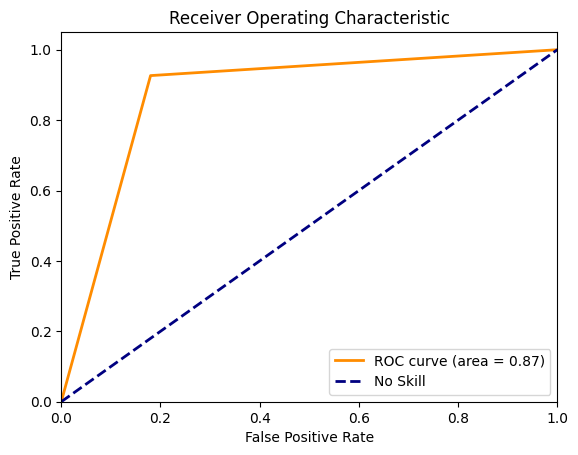

In [ ]:
# Plot ROC curve
plt.figure()

# Plot the ROC curve with a label displaying the ROC AUC score
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label='ROC curve (area = %0.2f)' % roc_auc)

# Plot a dashed diagonal line for reference
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='No Skill')

# Set the x and y-axis limits
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Label the x and y-axes
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Set the title of the plot
plt.title('Receiver Operating Characteristic')

# Add a legend to the plot
plt.legend(loc='lower right')

# Display the ROC curve plot
plt.show()

In [ ]:
# PRC Curve and AUC
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
prc_auc = average_precision_score(y_test, y_pred)
print("PRC AUC:", prc_auc)

PRC AUC: 0.7503501400560224


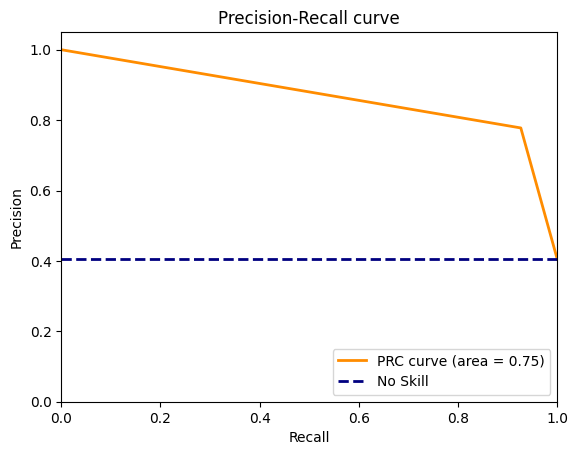

In [ ]:
# Plot PRC curve
plt.figure()

# Plot the PRC curve with a label displaying the PRC AUC score
plt.plot(recall, precision, color='darkorange', lw=2,
         label='PRC curve (area = %0.2f)' % prc_auc)

# Plot a dashed no-skill line for reference
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], color='navy', lw=2, linestyle='--', label='No Skill')

# Set the x and y-axis limits
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Label the x and y-axes
plt.xlabel('Recall')
plt.ylabel('Precision')

# Set the title of the plot
plt.title('Precision-Recall curve')

# Add a legend to the plot
plt.legend(loc='lower right')

# Display the ROC curve plot
plt.show()

#### Nested cross-validation

In [ ]:
# Evaluation from the nested cross validation (No data scaling)

# Declare the inner and outer cross-validation strategies
inner_cv = KFold(n_splits=5, shuffle=True, random_state=0)
outer_cv = KFold(n_splits=3, shuffle=True, random_state=0)

# Nested cross-validation
outer_acc, outer_params = [], []
round = 0

for train_index, test_index in outer_cv.split(X,y):
    round += 1

    # Split train and test datasets according to the outer_cv
    Xn_train = X.iloc[train_index,:]
    Xn_test = X.iloc[test_index,:]
    yn_train = y.iloc[train_index]
    yn_test = y.iloc[test_index]

    # Create a MLP classifier
    mlp = MLPClassifier(hidden_layer_sizes=(32, 16), activation='logistic', batch_size=100)

    # Hyperparameter tuning
    hyperparams = {
                  'solver': ['sgd', 'adam'],
                  'learning_rate_init': uniform(0,3)
                  }

    # Use random search to find the best hyperparameters
    rand_search = RandomizedSearchCV(mlp,
                                     param_distributions = hyperparams,
                                     n_iter=100,
                                     cv=inner_cv,
                                     random_state=0
                                    )

    # Fit the random search object to the data
    rand_search.fit(Xn_train, yn_train)

    # Model prediction based on the best hyperparams
    best_mlp = rand_search.best_estimator_
    yn_pred = best_mlp.predict(Xn_test)

    # Accuracy score from the validation dataset
    acc = metrics.accuracy_score(yn_test, yn_pred)

    # Store the result
    outer_acc.append(acc)
    outer_params.append(rand_search.best_params_)

    # Report progress
    print(f'Round {round}: test_score= {acc:.3f}, validation_score= {rand_search.best_score_:.3f}')

# Summarize the estimated performance of the model
print(
    '\nThe mean score using nested cross-validation is: '
    f'{np.mean(outer_acc):.3f} ± {np.std(outer_acc):.3f}'
)

Round 1: test_score= 0.857, validation_score= 0.864
Round 2: test_score= 0.829, validation_score= 0.859
Round 3: test_score= 0.875, validation_score= 0.857

The mean score using nested cross-validation is: 0.853 ± 0.019


#### Effect of data standardization on the model performance

In [ ]:
# Evaluation from the nested cross validation (standardize only Age_at_diagnosis feature)

# Declare the inner and outer cross-validation strategies
inner_cv = KFold(n_splits=5, shuffle=True, random_state=0)
outer_cv = KFold(n_splits=3, shuffle=True, random_state=0)

# Nested cross-validation
outer_acc, outer_params = [], []
round = 0

for train_index, test_index in outer_cv.split(X,y):
    round += 1

    # Split train and test datasets according to the outer_cv
    Xn_train = X.iloc[train_index,:]
    Xn_test = X.iloc[test_index,:]
    yn_train = y.iloc[train_index]
    yn_test = y.iloc[test_index]

    # Data standardization (Age_at_diagnosis feature)
    sc = StandardScaler()
    Age_train_stdn = sc.fit_transform(np.array(Xn_train.Age_at_diagnosis).reshape(-1, 1))
    Age_test_stdn = sc.transform(np.array(Xn_test.Age_at_diagnosis).reshape(-1, 1))
    Xn_train_std, Xn_test_std = Xn_train.copy(), Xn_test.copy()
    Xn_train_std.Age_at_diagnosis = Age_train_stdn
    Xn_test_std.Age_at_diagnosis = Age_test_stdn

    # Create a MLP classifier
    mlp = MLPClassifier(hidden_layer_sizes=(32, 16), activation='logistic', batch_size=100)

    # Hyperparameter tuning
    hyperparams = {
                  'solver': ['sgd', 'adam'],
                  'learning_rate_init': uniform(0,3)
                  }

    # Use random search to find the best hyperparameters
    rand_search = RandomizedSearchCV(mlp,
                                     param_distributions = hyperparams,
                                     n_iter=100,
                                     cv=inner_cv,
                                     random_state=0
                                    )

    # Fit the random search object to the data
    rand_search.fit(Xn_train_std, yn_train)

    # Model prediction based on the best hyperparams
    best_mlp = rand_search.best_estimator_
    yn_pred = best_mlp.predict(Xn_test_std)

    # Accuracy score from the validation dataset
    acc = metrics.accuracy_score(yn_test, yn_pred)

    # Store the result
    outer_acc.append(acc)
    outer_params.append(rand_search.best_params_)

    # Report progress
    print(f'Round {round}: test_score= {acc:.3f}, validation_score= {rand_search.best_score_:.3f}')

# Summarize the estimated performance of the model
print(
    '\nThe mean score using nested cross-validation is: '
    f'{np.mean(outer_acc):.3f} ± {np.std(outer_acc):.3f}'
)

Round 1: test_score= 0.861, validation_score= 0.873
Round 2: test_score= 0.821, validation_score= 0.877
Round 3: test_score= 0.882, validation_score= 0.861

The mean score using nested cross-validation is: 0.855 ± 0.025


In [ ]:
# Evaluation from the nested cross validation (standardize all features)

# Declare the inner and outer cross-validation strategies
inner_cv = KFold(n_splits=5, shuffle=True, random_state=0)
outer_cv = KFold(n_splits=3, shuffle=True, random_state=0)

# Nested cross-validation
outer_acc, outer_params = [], []
round = 0

for train_index, test_index in outer_cv.split(X,y):
    round += 1

    # Split train and test datasets according to the outer_cv
    Xn_train = X.iloc[train_index,:]
    Xn_test = X.iloc[test_index,:]
    yn_train = y.iloc[train_index]
    yn_test = y.iloc[test_index]

    # Data standardization (all features)
    Xn_train = pd.DataFrame(sc.fit_transform(Xn_train), columns=Xn_train.columns)
    Xn_test = pd.DataFrame(sc.transform(Xn_test), columns=Xn_train.columns)

    # Create a MLP classifier
    mlp = MLPClassifier(hidden_layer_sizes=(32, 16), activation='logistic', batch_size=100)

    # Hyperparameter tuning
    hyperparams = {
                  'solver': ['sgd', 'adam'],
                  'learning_rate_init': uniform(0,3)
                  }

    # Use random search to find the best hyperparameters
    rand_search = RandomizedSearchCV(mlp,
                                     param_distributions = hyperparams,
                                     n_iter=100,
                                     cv=inner_cv,
                                     random_state=0
                                    )

    # Fit the random search object to the data
    rand_search.fit(Xn_train, yn_train)

    # Model prediction based on the best hyperparams
    best_mlp = rand_search.best_estimator_
    yn_pred = best_mlp.predict(Xn_test)

    # Accuracy score from the validation dataset
    acc = metrics.accuracy_score(yn_test, yn_pred)

    # Store the result
    outer_acc.append(acc)
    outer_params.append(rand_search.best_params_)

    # Report progress
    print(f'Round {round}: test_score= {acc:.3f}, validation_score= {rand_search.best_score_:.3f}')

# Summarize the estimated performance of the model
print(
    '\nThe mean score using nested cross-validation is: '
    f'{np.mean(outer_acc):.3f} ± {np.std(outer_acc):.3f}'
)

Round 1: test_score= 0.836, validation_score= 0.864
Round 2: test_score= 0.800, validation_score= 0.862
Round 3: test_score= 0.885, validation_score= 0.863

The mean score using nested cross-validation is: 0.840 ± 0.035


#### Effect of PCA on the performance

In [ ]:
# Evaluation from the nested cross validation (PCA)

# Declare the inner and outer cross-validation strategies
inner_cv = KFold(n_splits=5, shuffle=True, random_state=0)
outer_cv = KFold(n_splits=3, shuffle=True, random_state=0)

# Nested cross-validation
outer_acc, outer_params = [], []
round = 0

for train_index, test_index in outer_cv.split(X,y):
    round += 1

    # Split train and test datasets according to the outer_cv
    Xn_train = X.iloc[train_index,:]
    Xn_test = X.iloc[test_index,:]
    yn_train = y.iloc[train_index]
    yn_test = y.iloc[test_index]

    # Data standardization (all features)
    Xn_train = pd.DataFrame(sc.fit_transform(Xn_train), columns=Xn_train.columns)
    Xn_test = pd.DataFrame(sc.transform(Xn_test), columns=Xn_train.columns)

    # PCA
    pca = PCA(n_components=20)
    train_pcan = pca.fit_transform(Xn_train)
    test_pcan = pca.transform(Xn_test)
    columns = ['pca_comp_%i' % i for i in range(1,21)]
    Xn_train_pca = pd.DataFrame(train_pcan, columns=columns, index=Xn_train.index)
    Xn_test_pca = pd.DataFrame(test_pcan, columns=columns, index=Xn_test.index)

    # Create a MLP classifier
    mlp = MLPClassifier(hidden_layer_sizes=(32, 16), activation='logistic', batch_size=100)

    # Hyperparameter tuning
    hyperparams = {
                  'solver': ['sgd', 'adam'],
                  'learning_rate_init': uniform(0,3)
                  }

    # Use random search to find the best hyperparameters
    rand_search = RandomizedSearchCV(mlp,
                                     param_distributions = hyperparams,
                                     n_iter=100,
                                     cv=inner_cv,
                                     random_state=0
                                    )

    # Fit the random search object to the data
    rand_search.fit(Xn_train_pca, yn_train)

    # Model prediction based on the best hyperparams
    best_mlp = rand_search.best_estimator_
    yn_pred = best_mlp.predict(Xn_test_pca)

    # Accuracy score from the validation dataset
    acc = metrics.accuracy_score(yn_test, yn_pred)

    # Store the result
    outer_acc.append(acc)
    outer_params.append(rand_search.best_params_)

    # Report progress
    print(f'Round {round}: test_score= {acc:.3f}, validation_score= {rand_search.best_score_:.3f}')

# Summarize the estimated performance of the model
print(
    '\nThe mean score using nested cross-validation is: '
    f'{np.mean(outer_acc):.3f} ± {np.std(outer_acc):.3f}'
)

Round 1: test_score= 0.854, validation_score= 0.855
Round 2: test_score= 0.850, validation_score= 0.864
Round 3: test_score= 0.857, validation_score= 0.841

The mean score using nested cross-validation is: 0.853 ± 0.003


#### Effect of the feature engineering on the performance

In [ ]:
# Evaluation from the nested cross validation (featuer engineering)

# Declare the inner and outer cross-validation strategies
inner_cv = KFold(n_splits=5, shuffle=True, random_state=0)
outer_cv = KFold(n_splits=3, shuffle=True, random_state=0)

# Nested cross-validation
outer_acc, outer_params = [], []
round = 0

for train_index, test_index in outer_cv.split(X,y):
    round += 1

    # Split train and test datasets according to the outer_cv
    Xn_train = X.iloc[train_index,:]
    Xn_test = X.iloc[test_index,:]
    yn_train = y.iloc[train_index]
    yn_test = y.iloc[test_index]

    # Data standardization (all features)
    Xn_train = pd.DataFrame(sc.fit_transform(Xn_train), columns=Xn_train.columns)
    Xn_test = pd.DataFrame(sc.transform(Xn_test), columns=Xn_train.columns)

    # PCA
    pca = PCA(n_components=20)
    train_pcan = pca.fit_transform(Xn_train)
    test_pcan = pca.transform(Xn_test)
    columns = ['pca_comp_%i' % i for i in range(1,21)]
    Xn_train_pca = pd.DataFrame(train_pcan, columns=columns, index=Xn_train.index)
    Xn_test_pca = pd.DataFrame(test_pcan, columns=columns, index=Xn_test.index)

    # Feature engineering
    Xn_train_eng = pd.concat([Xn_train, Xn_train_pca], axis=1)
    Xn_test_eng = pd.concat([Xn_test, Xn_test_pca], axis=1)

    # Create a MLP classifier
    mlp = MLPClassifier(hidden_layer_sizes=(32, 16), activation='logistic', batch_size=100)

    # Hyperparameter tuning
    hyperparams = {
                  'solver': ['sgd', 'adam'],
                  'learning_rate_init': uniform(0,3)
                  }

    # Use random search to find the best hyperparameters
    rand_search = RandomizedSearchCV(mlp,
                                     param_distributions = hyperparams,
                                     n_iter=100,
                                     cv=inner_cv,
                                     random_state=0
                                    )

    # Fit the random search object to the data
    rand_search.fit(Xn_train_eng, yn_train)

    # Model prediction based on the best hyperparams
    best_mlp = rand_search.best_estimator_
    yn_pred = best_mlp.predict(Xn_test_eng)

    # Accuracy score from the validation dataset
    acc = metrics.accuracy_score(yn_test, yn_pred)

    # Store the result
    outer_acc.append(acc)
    outer_params.append(rand_search.best_params_)

    # Report progress
    print(f'Round {round}: test_score= {acc:.3f}, validation_score= {rand_search.best_score_:.3f}')

# Summarize the estimated performance of the model
print(
    '\nThe mean score using nested cross-validation is: '
    f'{np.mean(outer_acc):.3f} ± {np.std(outer_acc):.3f}'
)

Round 1: test_score= 0.600, validation_score= 0.860
Round 2: test_score= 0.864, validation_score= 0.855
Round 3: test_score= 0.875, validation_score= 0.859

The mean score using nested cross-validation is: 0.780 ± 0.127


## 5. Discussion

### 5.1 Model evaluation
In this project we performed the nine different machine learning models to classify the tumor grade of brain glioma. For Table 1 below and the bar chart for the metric score, we can see that three tree-based learning models, linear SVM, logistic regression model quite provide the best performance in the prediction in several metric evaluation. MLP has the second rank of the performance, followed by KNN, while the naive Bayes and kernel SVM give the lowest evaluation scores.

**Table 1** Summary of the evaluation metrices of all ML models   

| **Model**| **Accuracy** &nbsp; &nbsp; | **Precision** &nbsp; &nbsp; | **Recall** &nbsp; &nbsp; |**F1-score** &nbsp; &nbsp; |**AUROC** &nbsp; &nbsp; |**AUPRC** &nbsp; &nbsp;
|------------------------|-------------------|--------------------------|-------------------|-------------------|-------------------|-------------------|
| KNN  | 0.839 | 0.840  | 0.839 | 0.834 | 0.834 | 0.722 |
| Naive Bayes | 0.786 | 0.786 | 0.786 | 0.781 | 0.764 | 0.651 |
| Decision tree    | 0.887 | 0.894 | 0.887 | 0.888 | 0.893 | 0.788 |
| Random forest  | 0.893 | 0.898 | 0.893 | 0.894 | 0.898 | 0.798 |
| XGBoost | 0.881 | 0.885 | 0.881 | 0.882 | 0.884 | 0.781 |
| Linear SVM    | 0.887 | 0.894 | 0.887 | 0.888 | 0.893 | 0.788 |
| Kernel SVM   | 0.798 | 0.797 | 0.798 | 0.797 | 0.788 | 0.664 |
| Logistic regression | 0.893 | 0.898 | 0.893 | 0.894 | 0.898 | 0.798 |
| MLP | 0.863 | 0.876 | 0.863 | 0.864 | 0.873 | 0.750 |


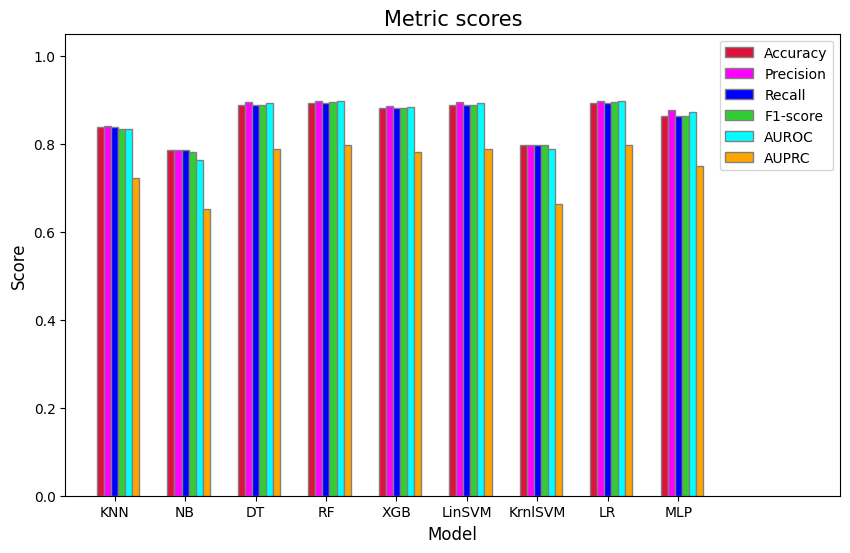

In [ ]:
# Bar plot of the evaluation metrices

# Set width of bar
barWidth = 0.1
fig = plt.subplots(figsize =(10, 6))

# Set of the metric scores
Accuracy = [0.839, 0.786, 0.887, 0.893, 0.881, 0.887, 0.798, 0.893, 0.863]
Precision = [0.840, 0.786, 0.894, 0.898, 0.885, 0.894, 0.797, 0.898, 0.876]
Recall = [0.839, 0.786, 0.887, 0.893, 0.881, 0.887, 0.798, 0.893, 0.863]
F1_score  = [0.834, 0.781, 0.888, 0.894, 0.882, 0.888, 0.797, 0.894, 0.864]
AUROC = [0.834, 0.764, 0.893, 0.898, 0.884, 0.893, 0.788, 0.898, 0.873]
AUPRC = [0.722, 0.651, 0.788, 0.798, 0.781, 0.788, 0.664, 0.798, 0.750]

# Set position of bar on X axis
br1 = np.arange(len(Accuracy))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
br6 = [x + barWidth for x in br5]

# Set axis limit
plt.ylim([0.0, 1.05])
plt.xlim([-0.5, 10.5])

# Make the plot
plt.bar(br1, Accuracy, color='crimson', width=barWidth,
        edgecolor='grey', label='Accuracy')
plt.bar(br2, Precision, color='magenta', width=barWidth,
        edgecolor='grey', label='Precision')
plt.bar(br3, Recall, color='blue', width=barWidth,
        edgecolor='grey', label='Recall')
plt.bar(br4, F1_score, color='limegreen', width=barWidth,
        edgecolor='grey', label ='F1-score')
plt.bar(br5, AUROC, color='cyan', width=barWidth,
        edgecolor='grey', label='AUROC')
plt.bar(br6, AUPRC, color='orange', width=barWidth,
        edgecolor='grey', label='AUPRC')

# Adding Xticks
plt.xlabel('Model', fontsize = 12)
plt.ylabel('Score', fontsize = 12)
plt.xticks([r + 0.2 for r in range(len(Accuracy))],
        ['KNN', 'NB', 'DT', 'RF', 'XGB', 'LinSVM', 'KrnlSVM', 'LR', 'MLP'])

plt.title('Metric scores', fontsize=15)
plt.legend()
plt.show()

### 5.2 Evaluation on the effect of data pre-processing on the model performance
When conducting the nested cross-validation, although the average performances of the original data are lower than the accuracy without the nested cross-validation, there is a slight difference, indicating that the models are robust to the several test datasets. From the bar plot below, it is clear that data scaling and feature engineering have the benefit in KNN and NB by increasing the accuracy while the performnace is the same as no data manipulation in the tree-based, linear SVM, LR, and MLP model. After the nested cross-validation and data manipulation. the accuracy of all models, except for kernel SVM, is quite the same, approximately 0.80 to 0.85. The kernel SVM provide the least accuracy score despite data scaling and feature engineering. The score of model is around 0.70 to 0.80.          

**Table 2** Summary of the mean accuracy score of all ML models   

| **Model**| **Original data** &nbsp; &nbsp; | **Data scaling only in Age_at_diagnosis** &nbsp; &nbsp; | **Data scaling in all features** &nbsp; &nbsp; |**Data using PCA value** &nbsp; &nbsp; |**Data with feature engineering** &nbsp; &nbsp;
|------------------------|-------------------|--------------------------|-------------------|-------------------|-------------------|
| KNN | 0.805 ± 0.023 | 0.855 ± 0.009 | 0.867 ± 0.009 | 0.843 ± 0.006 | 0.856 ± 0.007 |
| Naive Bayes | 0.721 ± 0.036 | 0.837 ± 0.014 | 0.841 ± 0.002 | 0.805 ± 0.034 | 0.846 ± 0.006 |
| Decision tree    | 0.840 ± 0.018 | 0.840 ± 0.018 | 0.840 ± 0.018 | 0.822 ± 0.031 | 0.820 ± 0.023 |
| Random forest  | 0.857 ± 0.008 | 0.857 ± 0.005 | 0.857 ± 0.005 | 0.846 ± 0.015 | 0.859 ± 0.006 |
| XGBoost | 0.855 ± 0.006 | 0.855 ± 0.006 | 0.855 ± 0.006 | 0.840 ± 0.017 | 0.837 ± 0.025 |
| Linear SVM    | 0.869 ± 0.006 | 0.869 ± 0.006 | 0.869 ± 0.006 | 0.865 ± 0.012 | 0.869 ± 0.006 |
| Kernel SVM   | 0.771 ± 0.015 | 0.807 ± 0.028 | 0.748 ± 0.024 | 0.754 ± 0.001 | 0.720 ± 0.036 |
| Logistic regression | 0.855 ± 0.019 | 0.856 ± 0.017 | 0.858 ± 0.016 | 0.850 ± 0.013 | 0.858 ± 0.019 |
| MLP | 0.853 ± 0.019 | 0.855 ± 0.025 | 0.855 ± 0.025 | 0.840 ± 0.035 | 0.853 ± 0.003 | 0.780 ± 0.127 |


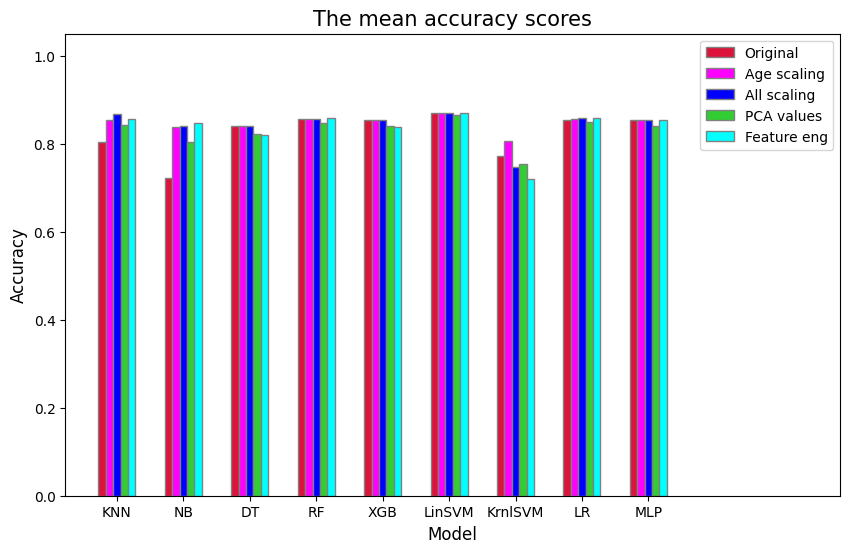

In [ ]:
# Bar plot of the mean accuracy in each condition

# Set width of bar
barWidth = 0.1
fig = plt.subplots(figsize =(10, 6))

# Set of the metric scores
No_manipulate = [0.805, 0.721, 0.840, 0.857, 0.855, 0.869, 0.771, 0.855, 0.853]
Age_scale = [0.855, 0.837, 0.840, 0.857, 0.855, 0.869, 0.807, 0.856, 0.855]
All_scale = [0.867, 0.841, 0.840, 0.857, 0.855, 0.869, 0.748, 0.858, 0.855]
PCA_value  = [0.843, 0.805, 0.822, 0.846, 0.840, 0.865, 0.754, 0.850, 0.840]
Feature_eng = [0.856, 0.846, 0.820, 0.859, 0.837, 0.869, 0.720, 0.858, 0.853]

# Set position of bar on X axis
br1 = 0.9*np.arange(len(Accuracy))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]

# Set axis limit
plt.ylim([0.0, 1.05])
plt.xlim([-0.5, 10])

# Make the plot
plt.bar(br1, No_manipulate, color='crimson', width=barWidth,
        edgecolor='grey', label='Original')
plt.bar(br2, Age_scale, color='magenta', width=barWidth,
        edgecolor='grey', label='Age scaling')
plt.bar(br3, All_scale, color='blue', width=barWidth,
        edgecolor='grey', label='All scaling')
plt.bar(br4, PCA_value, color='limegreen', width=barWidth,
        edgecolor='grey', label ='PCA values')
plt.bar(br5, Feature_eng, color='cyan', width=barWidth,
        edgecolor='grey', label='Feature eng')

# Adding Xticks
plt.xlabel('Model', fontsize = 12)
plt.ylabel('Accuracy', fontsize = 12)
plt.xticks([r+0.2 for r in 0.9*np.arange(len(Accuracy))],
        ['KNN', 'NB', 'DT', 'RF', 'XGB', 'LinSVM', 'KrnlSVM', 'LR', 'MLP'])

plt.title('The mean accuracy scores', fontsize=15)
plt.legend()
plt.show()

## 6. Conclusion and Suggestion
Machine learning models can improve brain tumor grading prediction based on the clinical and molecular information. We recommend that KNN, NB, tree-based learnings, linear SVM, logistic regression, and multilayer perceptron are the suitable model to use in this case. However, we suggest that further hyperparameter tuning should be carried out in the future work as well as additional feature collection for improving the model's performance.    

## 7. Appendix
There are other codes that are not used in this project.

In [ ]:
# # encode categorical variables with one-hot encoding
# import category_encoders as ce
# encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship',
#                                  'race', 'sex', 'native_country'])

# X_train = encoder.fit_transform(X_train)

# X_test = encoder.transform(X_test)

In [ ]:
# # 5-fold cross validation
# my_pipeline = Pipeline(steps=[('model', best_knn)
#                              ])
# scores = cross_val_score(my_pipeline, X_train, y_train,
#                               cv=5,
#                               scoring='accuracy')

# print("Accuracy scores:\n", scores)
# print("\nAverage accuracy score (across experiments):")
# print(scores.mean())

In [ ]:
# # Evaluation from the nested cross validation
# from sklearn.model_selection import cross_val_score, KFold

# # Declare the inner and outer cross-validation strategies
# inner_cv = KFold(n_splits=5, shuffle=True, random_state=0)
# outer_cv = KFold(n_splits=3, shuffle=True, random_state=0)

# # Create a knn classifier
# knn = KNeighborsClassifier()

# # Inner cross-validation for parameter search
# grid_serach = GridSearchCV(estimator=knn,
#                            param_grid=hyperparams,
#                            cv=inner_cv,
#                            refit=True,
#                            scoring = 'accuracy',
#                            n_jobs=2)

# # Outer cross-validation to compute the testing score
# test_score = cross_val_score(knn, X, y, cv=outer_cv, n_jobs=2)

# print(
#     "The mean score using nested cross-validation is: "
#     f"{test_score.mean():.3f} ± {test_score.std():.3f}"
# )